In [143]:
library(data.table)
library(plyr)
library(tidyverse)
library(doBy)
library(reshape2)
library(psych)
library(scales)
library(Metrics)

#library(ggExtra)
#library(zoo)
#library(gridExtra)


Attaching package: 'data.table'


The following objects are masked from 'package:reshape2':

    dcast, melt


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose




In [131]:
## Read in model data
model_data_002 = read.csv('002_model_data.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"),strip.white=TRUE)
colnames(model_data_002)

model_data_003 = read.csv('003_model_data.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"),strip.white=TRUE)
colnames(model_data_003)

model_data_004 = read.csv('004_model_data.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"),strip.white=TRUE)
colnames(model_data_004)

model_data_005 = read.csv('005_model_data.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"),strip.white=TRUE)
colnames(model_data_005)

model_data_006 = read.csv('006_model_data.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"),strip.white=TRUE)
colnames(model_data_006)

model_data_007 = read.csv('007_model_data.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"),strip.white=TRUE)
colnames(model_data_007)

model_data_008 = read.csv('008_model_data.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"),strip.white=TRUE)
colnames(model_data_008)

model_data_009 = read.csv('009_model_data.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"),strip.white=TRUE)
colnames(model_data_009)

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Past_1"         "Past_2"        
 [9] "Past_3"         "Past_4"         "Past_5"         "Future_1"      
[13] "Future_2"       "Future_3"       "Match_Any"      "Match_1"       
[17] "Match_2"        "Match_3"        "Past_CogLoad"   "Future_CogLoad"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Past_1"         "Past_2"        
 [9] "Past_3"         "Past_4"         "Past_5"         "Future_1"      
[13] "Future_2"       "Future_3"       "Match_Any"      "Match_1"       
[17] "Match_2"        "Match_3"        "Past_CogLoad"   "Future_CogLoad"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Past_1"         "Past_2"        
 [9] "Past_3"         "Past_4"         "Past_5"         "Future_1"      
[13] "Future_2"       "Future_3"       "Match_Any"      "Match_1"       
[17] "Match_2"        "Match_3"        "Past_CogLoad"   "Future_CogLoad"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Past_1"         "Past_2"        
 [9] "Past_3"         "Past_4"         "Past_5"         "Future_1"      
[13] "Future_2"       "Future_3"       "Match_Any"      "Match_1"       
[17] "Match_2"        "Match_3"        "Past_CogLoad"   "Future_CogLoad"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Past_1"         "Past_2"        
 [9] "Past_3"         "Past_4"         "Past_5"         "Future_1"      
[13] "Future_2"       "Future_3"       "Match_Any"      "Match_1"       
[17] "Match_2"        "Match_3"        "Past_CogLoad"   "Future_CogLoad"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Past_1"         "Past_2"        
 [9] "Past_3"         "Past_4"         "Past_5"         "Future_1"      
[13] "Future_2"       "Future_3"       "Match_Any"      "Match_1"       
[17] "Match_2"        "Match_3"        "Past_CogLoad"   "Future_CogLoad"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Past_1"         "Past_2"        
 [9] "Past_3"         "Past_4"         "Past_5"         "Future_1"      
[13] "Future_2"       "Future_3"       "Match_Any"      "Match_1"       
[17] "Match_2"        "Match_3"        "Past_CogLoad"   "Future_CogLoad"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Past_1"         "Past_2"        
 [9] "Past_3"         "Past_4"         "Past_5"         "Future_1"      
[13] "Future_2"       "Future_3"       "Match_Any"      "Match_1"       
[17] "Match_2"        "Match_3"        "Past_CogLoad"   "Future_CogLoad"

In [208]:
## Read in engagement & task load (eng_taskload) data
eng_taskload_data_002 = read.csv('002_eng_taskload.csv', header=T,colClasses=c("UserID"="factor"))
colnames(eng_taskload_data_002)

eng_taskload_data_003 = read.csv('003_eng_taskload.csv', header=T,colClasses=c("UserID"="factor"))
colnames(eng_taskload_data_003)

eng_taskload_data_004 = read.csv('004_eng_taskload.csv', header=T,colClasses=c("UserID"="factor"))
colnames(eng_taskload_data_004)

eng_taskload_data_005 = read.csv('005_eng_taskload.csv', header=T,colClasses=c("UserID"="factor"))
colnames(eng_taskload_data_005)

eng_taskload_data_006 = read.csv('006_eng_taskload.csv', header=T,colClasses=c("UserID"="factor"))
colnames(eng_taskload_data_006)

eng_taskload_data_007 = read.csv('007_eng_taskload.csv', header=T,colClasses=c("UserID"="factor"))
colnames(eng_taskload_data_007)

eng_taskload_data_008 = read.csv('008_eng_taskload.csv', header=T,colClasses=c("UserID"="factor"))
colnames(eng_taskload_data_008)

eng_taskload_data_009 = read.csv('009_eng_taskload.csv', header=T,colClasses=c("UserID"="factor"))
colnames(eng_taskload_data_009)

[1] "UserID"     "Time"       "TaskLoad"   "Engagement"

[1] "UserID"     "Time"       "TaskLoad"   "Engagement"

[1] "UserID"     "Time"       "TaskLoad"   "Engagement"

[1] "UserID"     "Time"       "TaskLoad"   "Engagement"

[1] "UserID"     "Time"       "TaskLoad"   "Engagement"

[1] "UserID"     "Time"       "TaskLoad"   "Engagement"

[1] "UserID"     "Time"       "TaskLoad"   "Engagement"

[1] "UserID"     "Time"       "TaskLoad"   "Engagement"

In [138]:
## Read in aggregate cognitive load data
cogload_data_002 = read.csv('002_cogload_data.csv', header=T)
cogload_data_002$UserID <- "002"
cogload_data_002$UserID <- factor(cogload_data_002$UserID)
colnames(cogload_data_002)

cogload_data_003 = read.csv('003_cogload_data.csv', header=T)
cogload_data_003$UserID <- "003"
cogload_data_003$UserID <- factor(cogload_data_003$UserID)
colnames(cogload_data_003)

cogload_data_004 = read.csv('004_cogload_data.csv', header=T)
cogload_data_004$UserID <- "004"
cogload_data_004$UserID <- factor(cogload_data_004$UserID)
colnames(cogload_data_004)

cogload_data_005 = read.csv('005_cogload_data.csv', header=T)
cogload_data_005$UserID <- "005"
cogload_data_005$UserID <- factor(cogload_data_005$UserID)
colnames(cogload_data_005)

cogload_data_006 = read.csv('006_cogload_data.csv', header=T)
cogload_data_006$UserID <- "006"
cogload_data_006$UserID <- factor(cogload_data_006$UserID)
colnames(cogload_data_006)

cogload_data_007 = read.csv('007_cogload_data.csv', header=T)
cogload_data_007$UserID <- "007"
cogload_data_007$UserID <- factor(cogload_data_007$UserID)
colnames(cogload_data_007)

cogload_data_008 = read.csv('008_cogload_data.csv', header=T)
cogload_data_008$UserID <- "008"
cogload_data_008$UserID <- factor(cogload_data_008$UserID)
colnames(cogload_data_008)

cogload_data_009 = read.csv('009_cogload_data.csv', header=T)
cogload_data_009$UserID <- "009"
cogload_data_009$UserID <- factor(cogload_data_009$UserID)
colnames(cogload_data_009)

[1] "Time"           "pupilDilation"  "gazeX"          "gazeY"         
 [5] "gazeVelocity"   "movingRmssd"    "deltaGSRsmooth" "Agg_stress"    
 [9] "Agg_cogLoad"    "UserID"

[1] "Time"           "pupilDilation"  "gazeX"          "gazeY"         
 [5] "gazeVelocity"   "movingRmssd"    "deltaGSRsmooth" "Agg_stress"    
 [9] "Agg_cogLoad"    "UserID"

[1] "Time"           "pupilDilation"  "gazeX"          "gazeY"         
 [5] "gazeVelocity"   "movingRmssd"    "deltaGSRsmooth" "Agg_stress"    
 [9] "Agg_cogLoad"    "UserID"

[1] "Time"           "pupilDilation"  "gazeX"          "gazeY"         
 [5] "gazeVelocity"   "movingRmssd"    "deltaGSRsmooth" "Agg_stress"    
 [9] "Agg_cogLoad"    "UserID"

[1] "Time"           "pupilDilation"  "gazeX"          "gazeY"         
 [5] "gazeVelocity"   "movingRmssd"    "deltaGSRsmooth" "Agg_stress"    
 [9] "Agg_cogLoad"    "UserID"

[1] "Time"           "pupilDilation"  "gazeX"          "gazeY"         
 [5] "gazeVelocity"   "movingRmssd"    "deltaGSRsmooth" "Agg_stress"    
 [9] "Agg_cogLoad"    "UserID"

[1] "Time"           "pupilDilation"  "gazeX"          "gazeY"         
 [5] "gazeVelocity"   "movingRmssd"    "deltaGSRsmooth" "Agg_stress"    
 [9] "Agg_cogLoad"    "UserID"

[1] "Time"           "pupilDilation"  "gazeX"          "gazeY"         
 [5] "gazeVelocity"   "movingRmssd"    "deltaGSRsmooth" "Agg_stress"    
 [9] "Agg_cogLoad"    "UserID"

# Subject 002

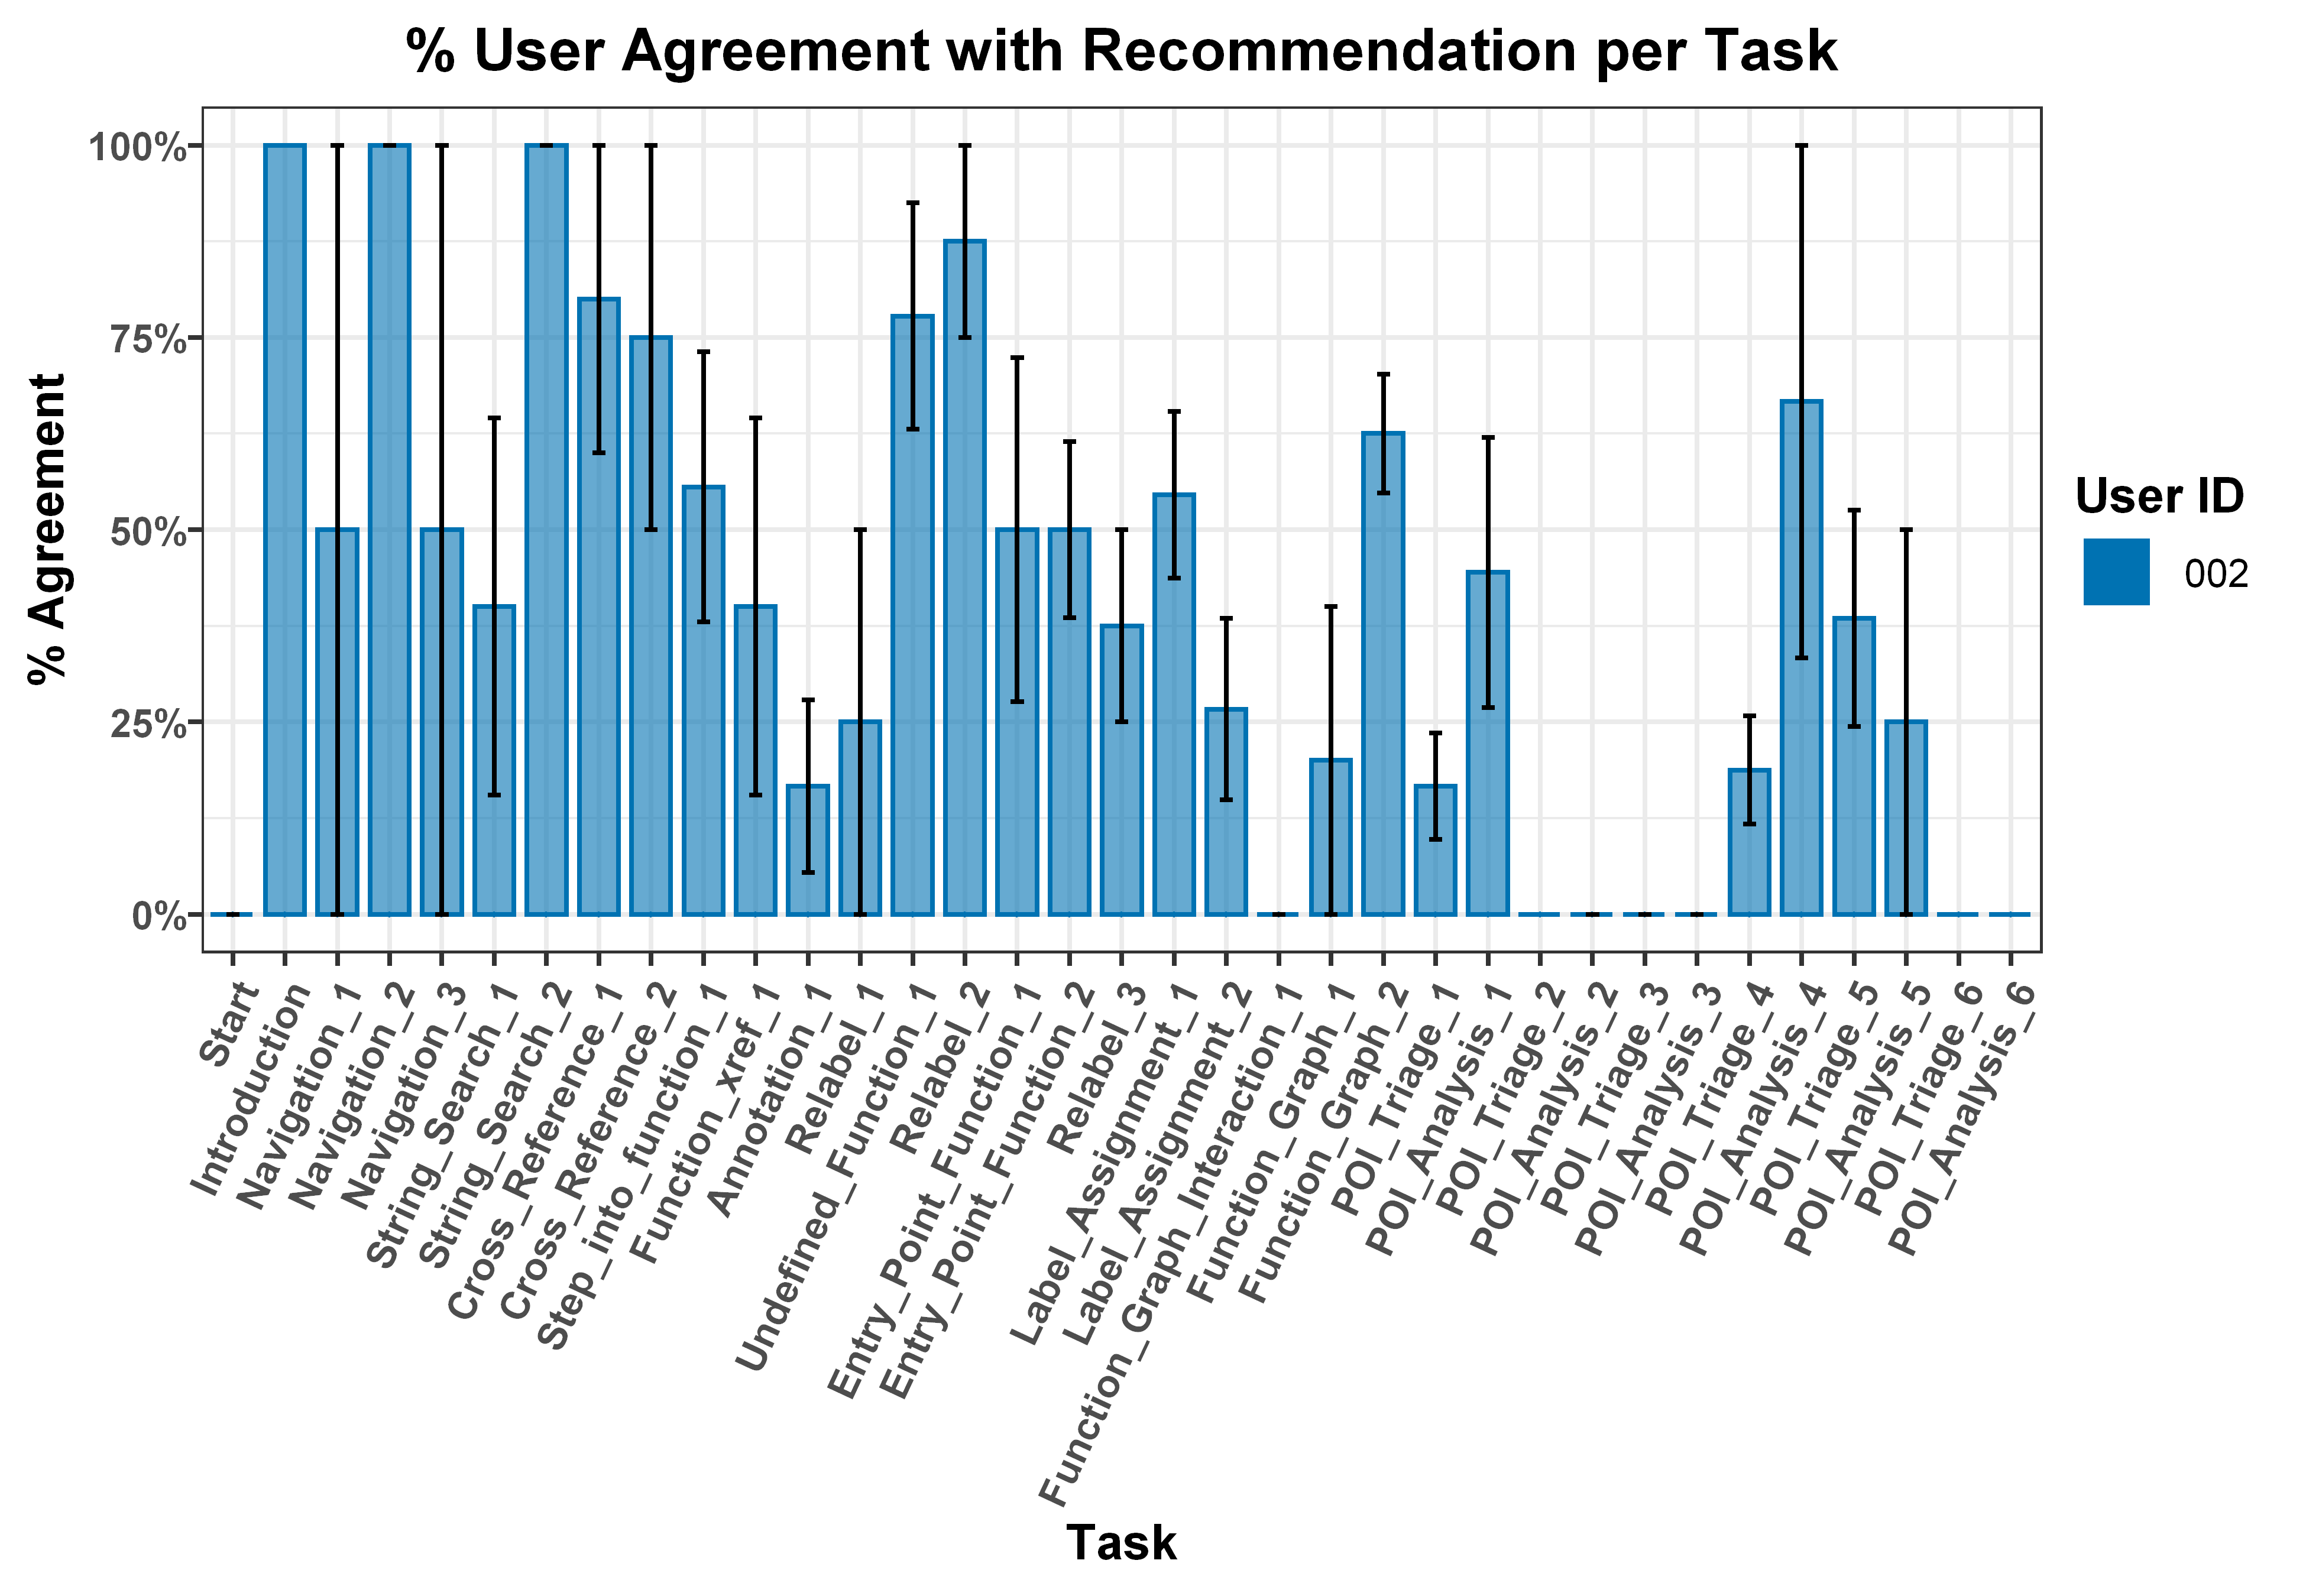

In [238]:
## Mean agreement per task (w/expert initialization)
options(repr.plot.width=6.5, repr.plot.height=4.5, repr.plot.res=600)

data <- summaryBy(Match_Any ~ UserID + Task, data=model_data_002, keep.names=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
data$Match_Any.se <- data$Match_Any.sd / sqrt(data$Match_Any.length)
data$Task <- factor(data$Task, levels = data$Task)
#levels(data$Task)
data$Task <- revalue(data$Task, c(Point_of_Interest_Triage_1="POI_Triage_1", Proof_of_Vulnerability_Analysis_1="POI_Analysis_1",
                                  Point_of_Interest_Triage_2="POI_Triage_2", Proof_of_Vulnerability_Analysis_2="POI_Analysis_2",
                                  Point_of_Interest_Triage_3="POI_Triage_3", Proof_of_Vulnerability_Analysis_3="POI_Analysis_3",
                                  Point_of_Interest_Triage_4="POI_Triage_4", Proof_of_Vulnerability_Analysis_4="POI_Analysis_4",
                                  Point_of_Interest_Triage_5="POI_Triage_5", Proof_of_Vulnerability_Analysis_5="POI_Analysis_5",
                                  Point_of_Interest_Triage_6="POI_Triage_6", Proof_of_Vulnerability_Analysis_6="POI_Analysis_6"))

agg_002 <- ggplot(data = data, aes(x=Task, y=Match_Any.mean, group=UserID, color=UserID, fill=UserID)) + labs(fill="User ID",color="User ID") +
            geom_col(position=position_dodge(), width = 0.75, show.legend=FALSE) +
            geom_point(aes(y=0,color=UserID), size=0) +
            geom_errorbar(aes(ymin = Match_Any.mean - Match_Any.se, ymax = Match_Any.mean + Match_Any.se), colour="black", size=.50, width=.25) +
            scale_fill_manual(values=alpha(c("#0072B2"),0.6)) +
            scale_color_manual(values=c("#0072B2")) +
            guides(color = guide_legend(override.aes = list(shape=15,size = 6))) +
            ylab("% Agreement") + xlab("Task") + #ylim(0.0,1.0) + #coord_fixed(1.2) +
            scale_y_continuous(limits=c(0.0,1.0), labels = scales::percent) +
            theme_bw() + ggtitle("% User Agreement with Recommendation per Task") + 
            theme(text = element_text(size=10, face="bold"),
                  axis.title.x = element_text(margin = margin(t=2)),
                  axis.title.y = element_text(margin = margin(t=0)),
                  axis.text.x = element_text(size=8, angle = 65, vjust = 1.0, hjust=1), 
                  axis.text.y = element_text(size=8, margin = margin(l=3)),
                  legend.text = element_text(size=8, face="plain"),
                  legend.spacing.y = unit(0.075, 'cm'),
                  legend.box.margin=margin(-5,0,-10,-10),
                  plot.title = element_text(size=12, hjust = 0.5))
agg_002

Warning message:
"Removed 4034 row(s) containing missing values (geom_path)."


r_Past_rolled r_Past_interp r_Future_rolled r_Future_interp
1 -0.1019622    -0.1106937    -0.09847742     -0.1120135

Warning message:
"Removed 3424 row(s) containing missing values (geom_path)."


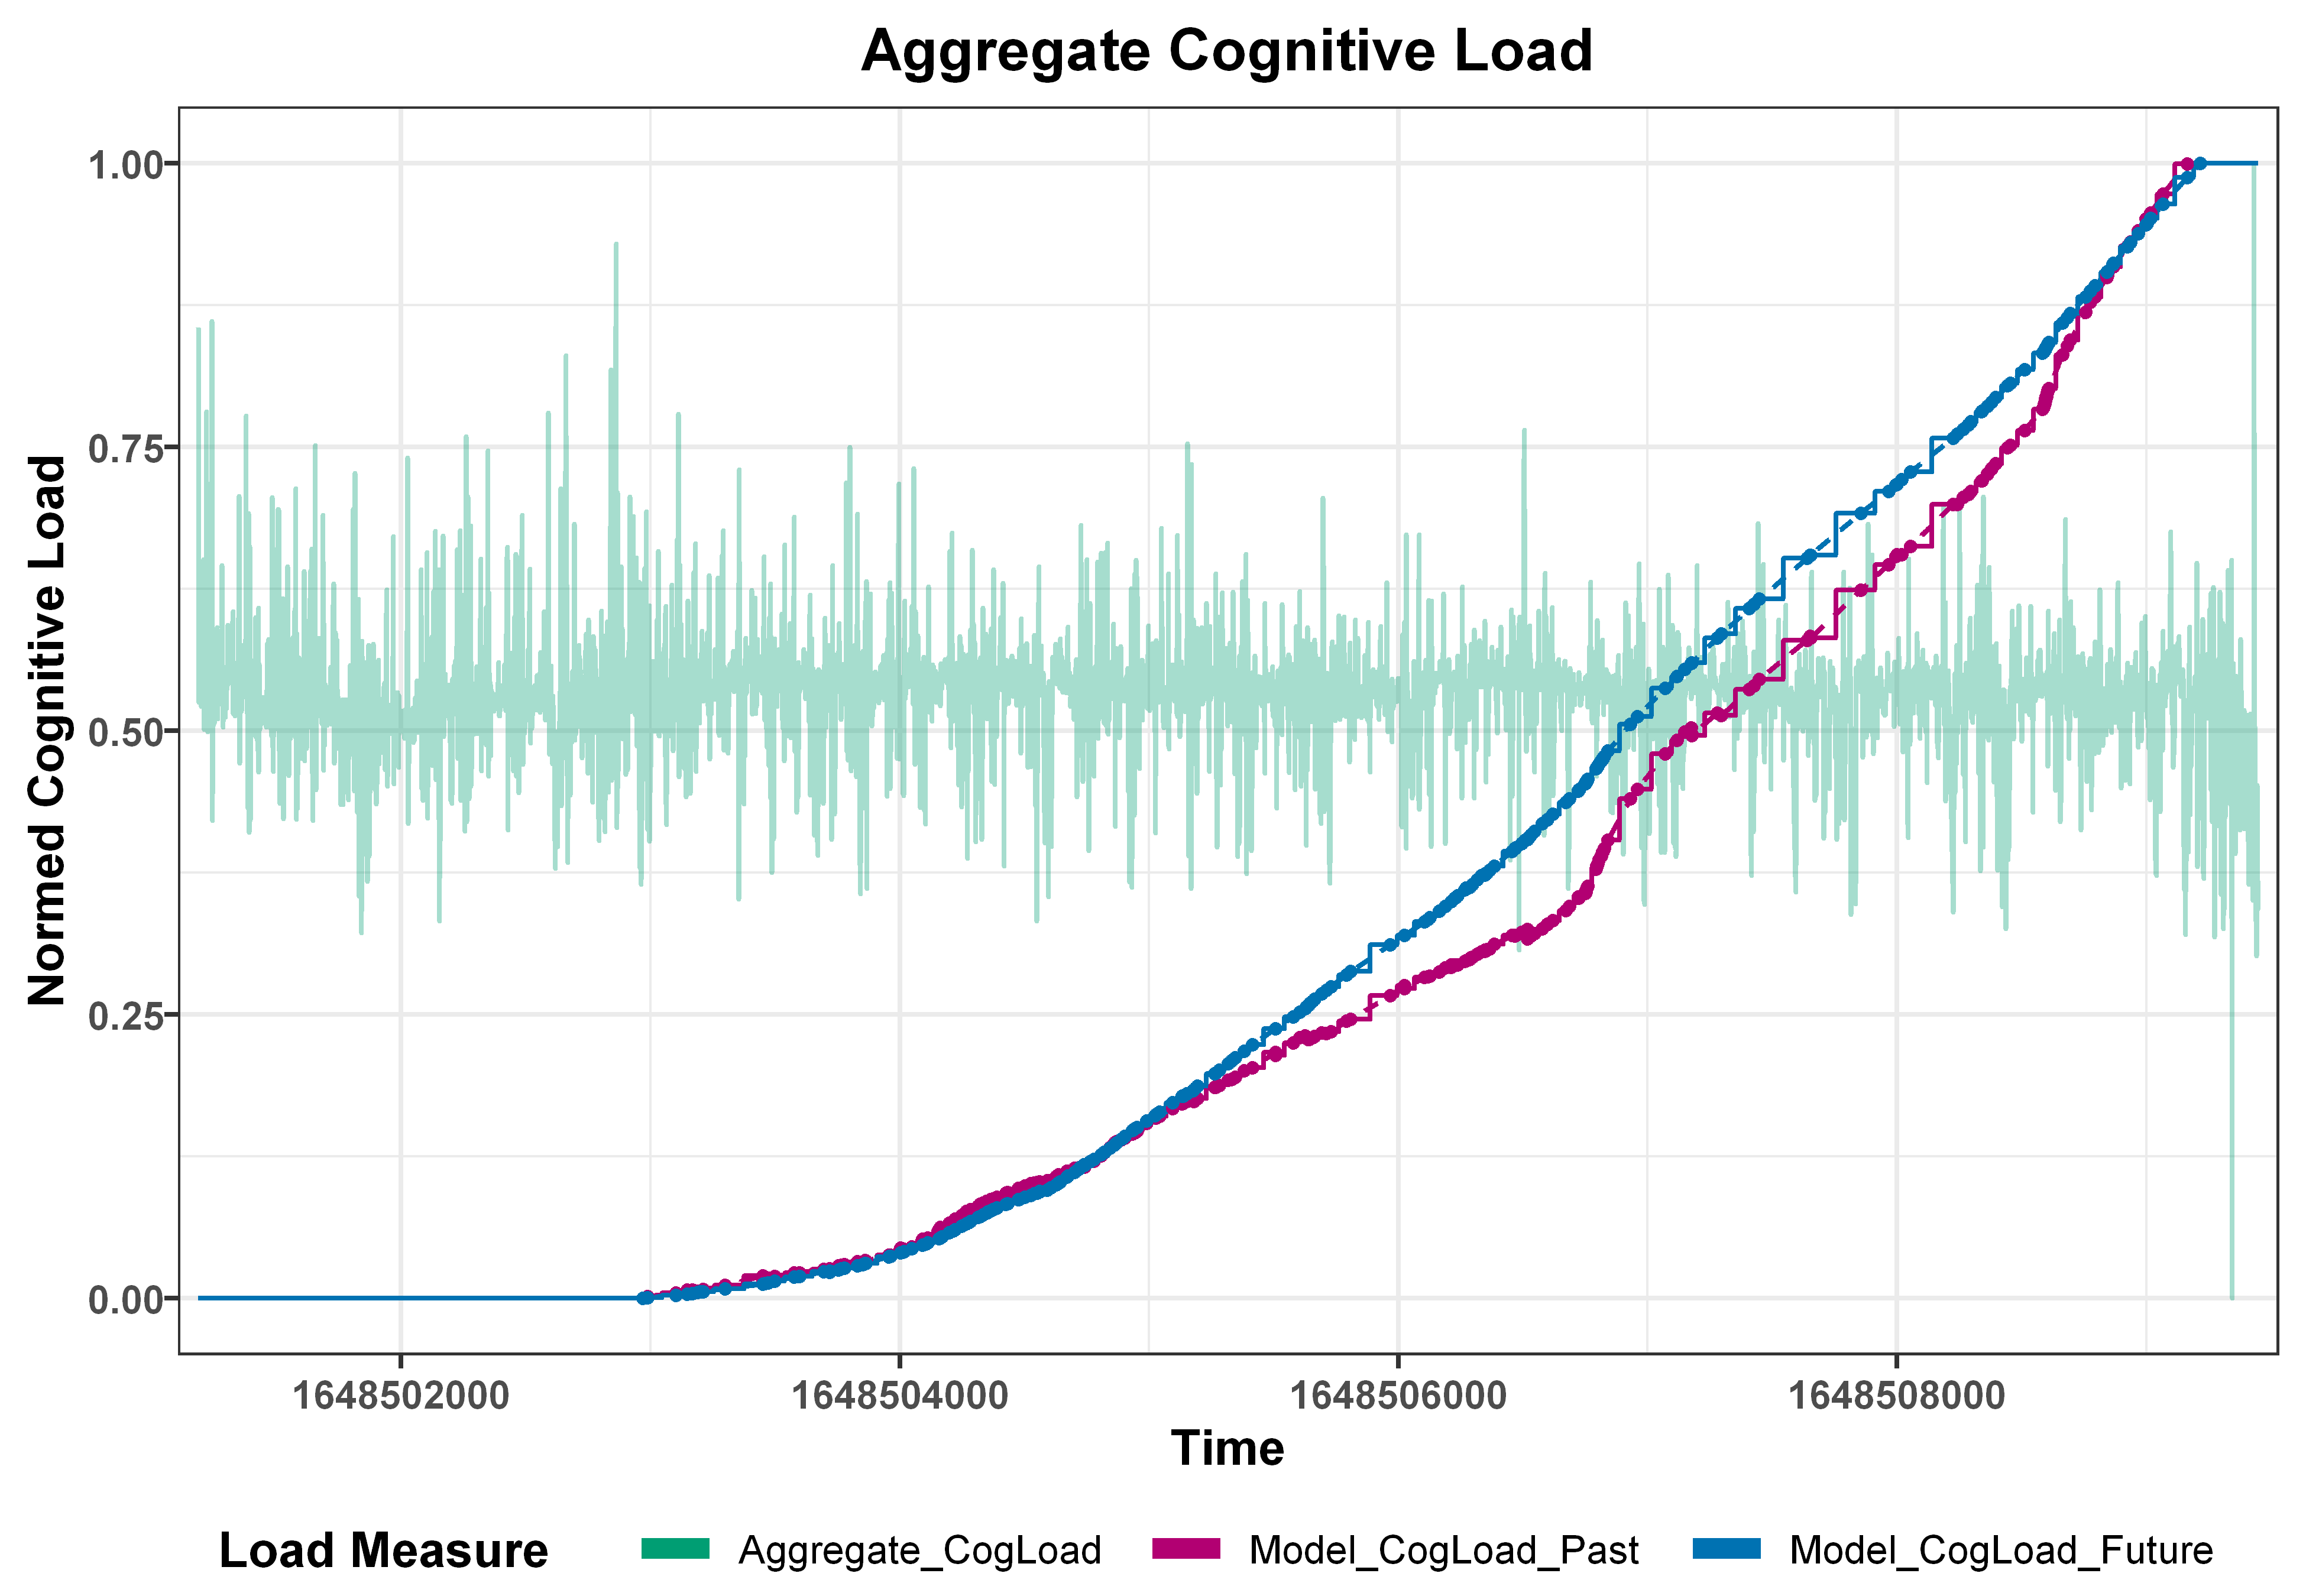

TaskLoad_r_Past_rolled TaskLoad_r_Past_interp TaskLoad_r_Future_rolled
1 -0.1109631             -0.109148              -0.1101215              
  TaskLoad_r_Future_interp Engagement_r_Past_rolled Engagement_r_Past_interp
1 -0.1086091               -0.006090664             0.03275016              
  Engagement_r_Future_rolled Engagement_r_Future_interp
1 -0.006699747               0.03407468

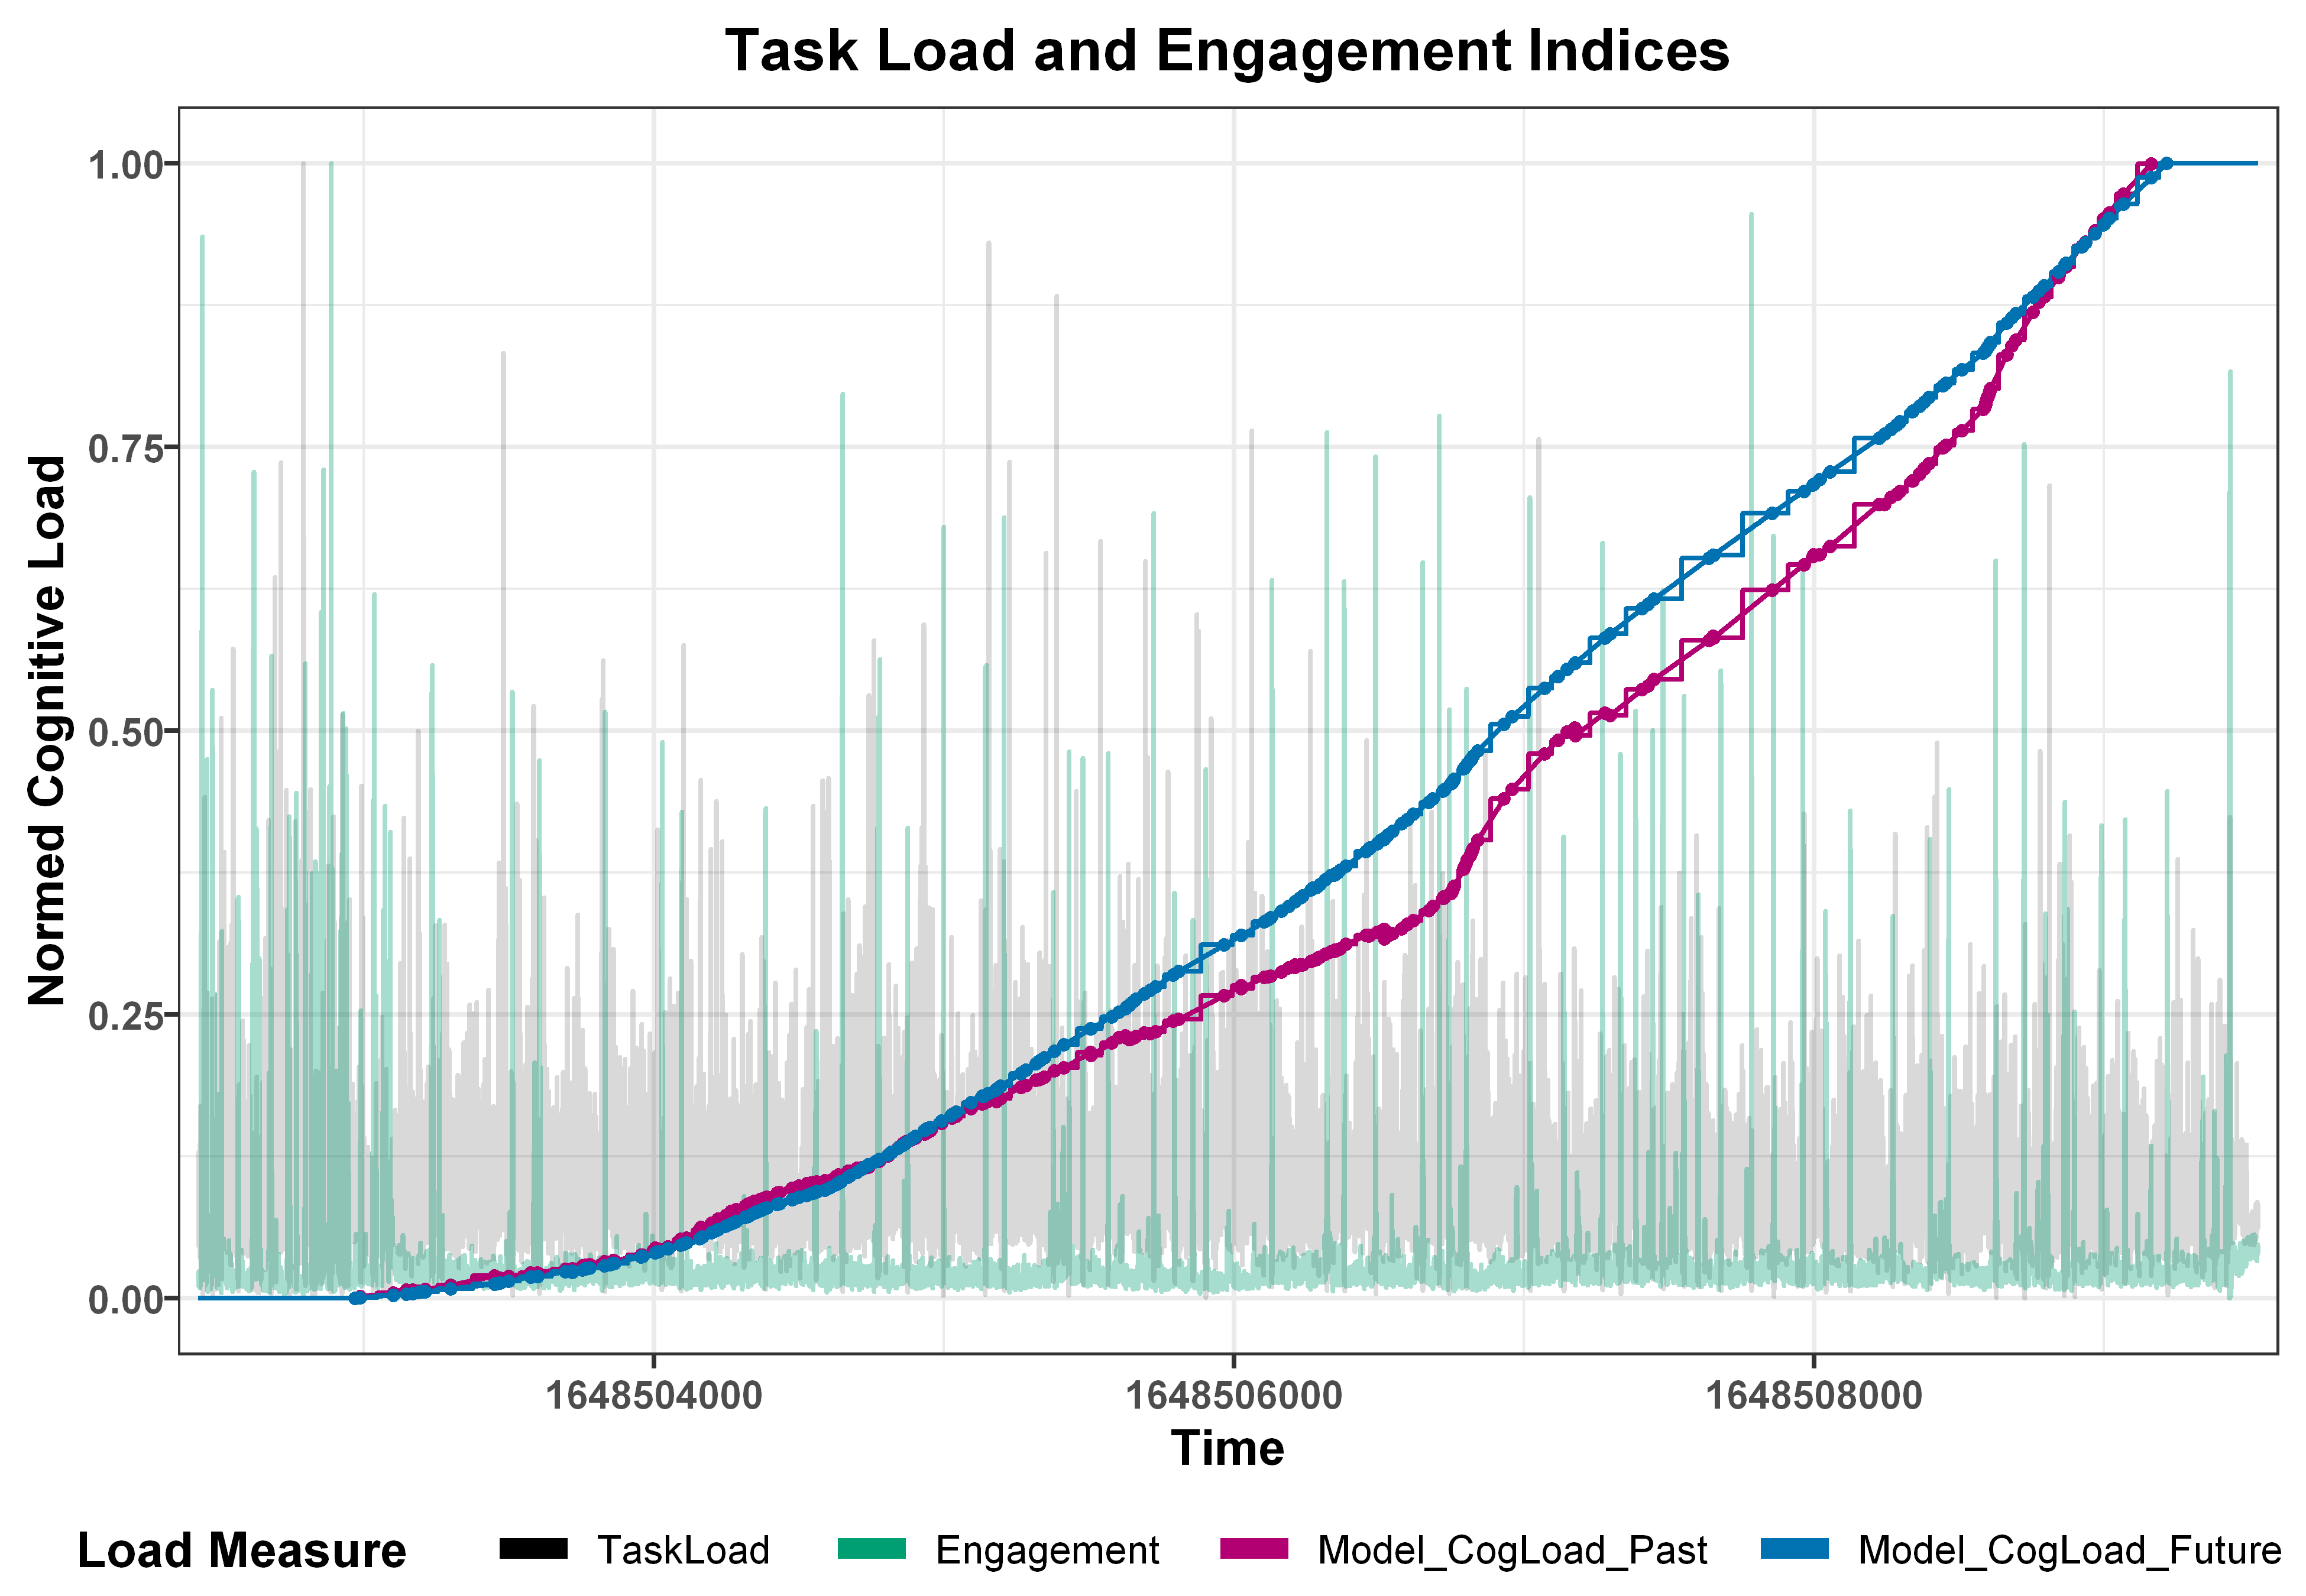

In [239]:
## Cognitive Load Correlations
model_data <- summaryBy(Past_CogLoad + Future_CogLoad ~ UserID + Time, data=model_data_002, keep.names=TRUE, order=FALSE)
model_data$Past_CogLoad_normed = (model_data$Past_CogLoad-min(model_data$Past_CogLoad))/(max(model_data$Past_CogLoad)-min(model_data$Past_CogLoad))
model_data$Future_CogLoad_normed = (model_data$Future_CogLoad-min(model_data$Future_CogLoad))/(max(model_data$Future_CogLoad)-min(model_data$Future_CogLoad))
model_data <- summaryBy(Past_CogLoad_normed + Future_CogLoad_normed ~ UserID + Time, data=model_data, keep.names=TRUE, order=FALSE)
#head(model_data)

cogload_data <- summaryBy(Agg_cogLoad ~ UserID + Time, data=cogload_data_002, keep.names=TRUE, order=FALSE)
cogload_data$Agg_cogLoad_normed = (cogload_data$Agg_cogLoad-min(cogload_data$Agg_cogLoad))/(max(cogload_data$Agg_cogLoad)-min(cogload_data$Agg_cogLoad))
cogload_data <- summaryBy(Agg_cogLoad_normed ~ UserID + Time, data=cogload_data, keep.names=TRUE, order=FALSE)
#head(cogload_data)

eng_taskload_data <- summaryBy(TaskLoad + Engagement ~ UserID + Time, data=eng_taskload_data_002, keep.names=TRUE, order=FALSE)
eng_taskload_data$Engagement[eng_taskload_data$Engagement>13] = 0
#summary(eng_taskload_data$Engagement)
eng_taskload_data$TaskLoad_normed = (eng_taskload_data$TaskLoad-min(eng_taskload_data$TaskLoad))/(max(eng_taskload_data$TaskLoad)-min(eng_taskload_data$TaskLoad))
eng_taskload_data$Engagement_normed = (eng_taskload_data$Engagement-min(eng_taskload_data$Engagement))/(max(eng_taskload_data$Engagement)-min(eng_taskload_data$Engagement))
eng_taskload_data <- summaryBy(TaskLoad_normed + Engagement_normed ~ UserID + Time, data=eng_taskload_data, keep.names=TRUE, order=FALSE)
#head(eng_taskload_data)

setDT(model_data)
setDT(cogload_data)
setDT(eng_taskload_data)

setkey(model_data, UserID, Time)
setkey(cogload_data, UserID, Time)
setkey(eng_taskload_data, UserID, Time)

###Aggregate Cognitive Load
rawdata = model_data[cogload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

rawdata$Future_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Future_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past",
                        ifelse(data$variable=="Future_CogLoad_normed"|data$variable=="Future_CogLoadInterp","Model_CogLoad_Future",
                               "Aggregate_CogLoad"))
data$type <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Future_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp"|data$variable=="Future_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("Aggregate_CogLoad", "Model_CogLoad_Past","Model_CogLoad_Future"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)

load_002 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                geom_point(data=model_data, aes(Time, Future_CogLoad_normed), colour="#0072B2", size = 0.75) +
                scale_color_manual(values=c("#009E73","#B20072","#0072B2")) +
                scale_alpha_manual(values=c(0.35,1.0,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Aggregate Cognitive Load") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-10),
                      plot.title = element_text(size=12, hjust = 0.5))
load_002

rawdata %>% group_by(UserID) %>%
  summarise(r_Past_rolled = cor(Agg_cogLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
            r_Past_interp = cor(Agg_cogLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
            r_Future_rolled = cor(Agg_cogLoad_normed, Future_CogLoad_normed, use="pairwise.complete.obs"),
            r_Future_interp = cor(Agg_cogLoad_normed, Future_CogLoadInterp, use="pairwise.complete.obs"))


###Task Load Index
rawdata = model_data[eng_taskload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

rawdata$Future_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Future_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past",
                        ifelse(data$variable=="Future_CogLoad_normed"|data$variable=="Future_CogLoadInterp","Model_CogLoad_Future",
                               ifelse(data$variable=="TaskLoad_normed","TaskLoad","Engagement")))
data$type <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Future_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp"|data$variable=="Future_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("TaskLoad","Engagement","Model_CogLoad_Past","Model_CogLoad_Future"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)

eng_002 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                geom_point(data=model_data, aes(Time, Future_CogLoad_normed), colour="#0072B2", size = 0.75) +
                scale_color_manual(values=c("black","#009E73","#B20072","#0072B2")) +
                scale_alpha_manual(values=c(0.15,0.35,1.0,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Task Load and Engagement Indices") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-25),
                      plot.title = element_text(size=12, hjust = 0.5))
eng_002

rawdata %>% group_by(UserID) %>%
  summarise(TaskLoad_r_Past_rolled = cor(TaskLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
            TaskLoad_r_Past_interp = cor(TaskLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
            TaskLoad_r_Future_rolled = cor(TaskLoad_normed, Future_CogLoad_normed, use="pairwise.complete.obs"),
            TaskLoad_r_Future_interp = cor(TaskLoad_normed, Future_CogLoadInterp, use="pairwise.complete.obs"),
            Engagement_r_Past_rolled = cor(Engagement_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
            Engagement_r_Past_interp = cor(Engagement_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
            Engagement_r_Future_rolled = cor(Engagement_normed, Future_CogLoad_normed, use="pairwise.complete.obs"),
            Engagement_r_Future_interp = cor(Engagement_normed, Future_CogLoadInterp, use="pairwise.complete.obs"))


# Subject 003

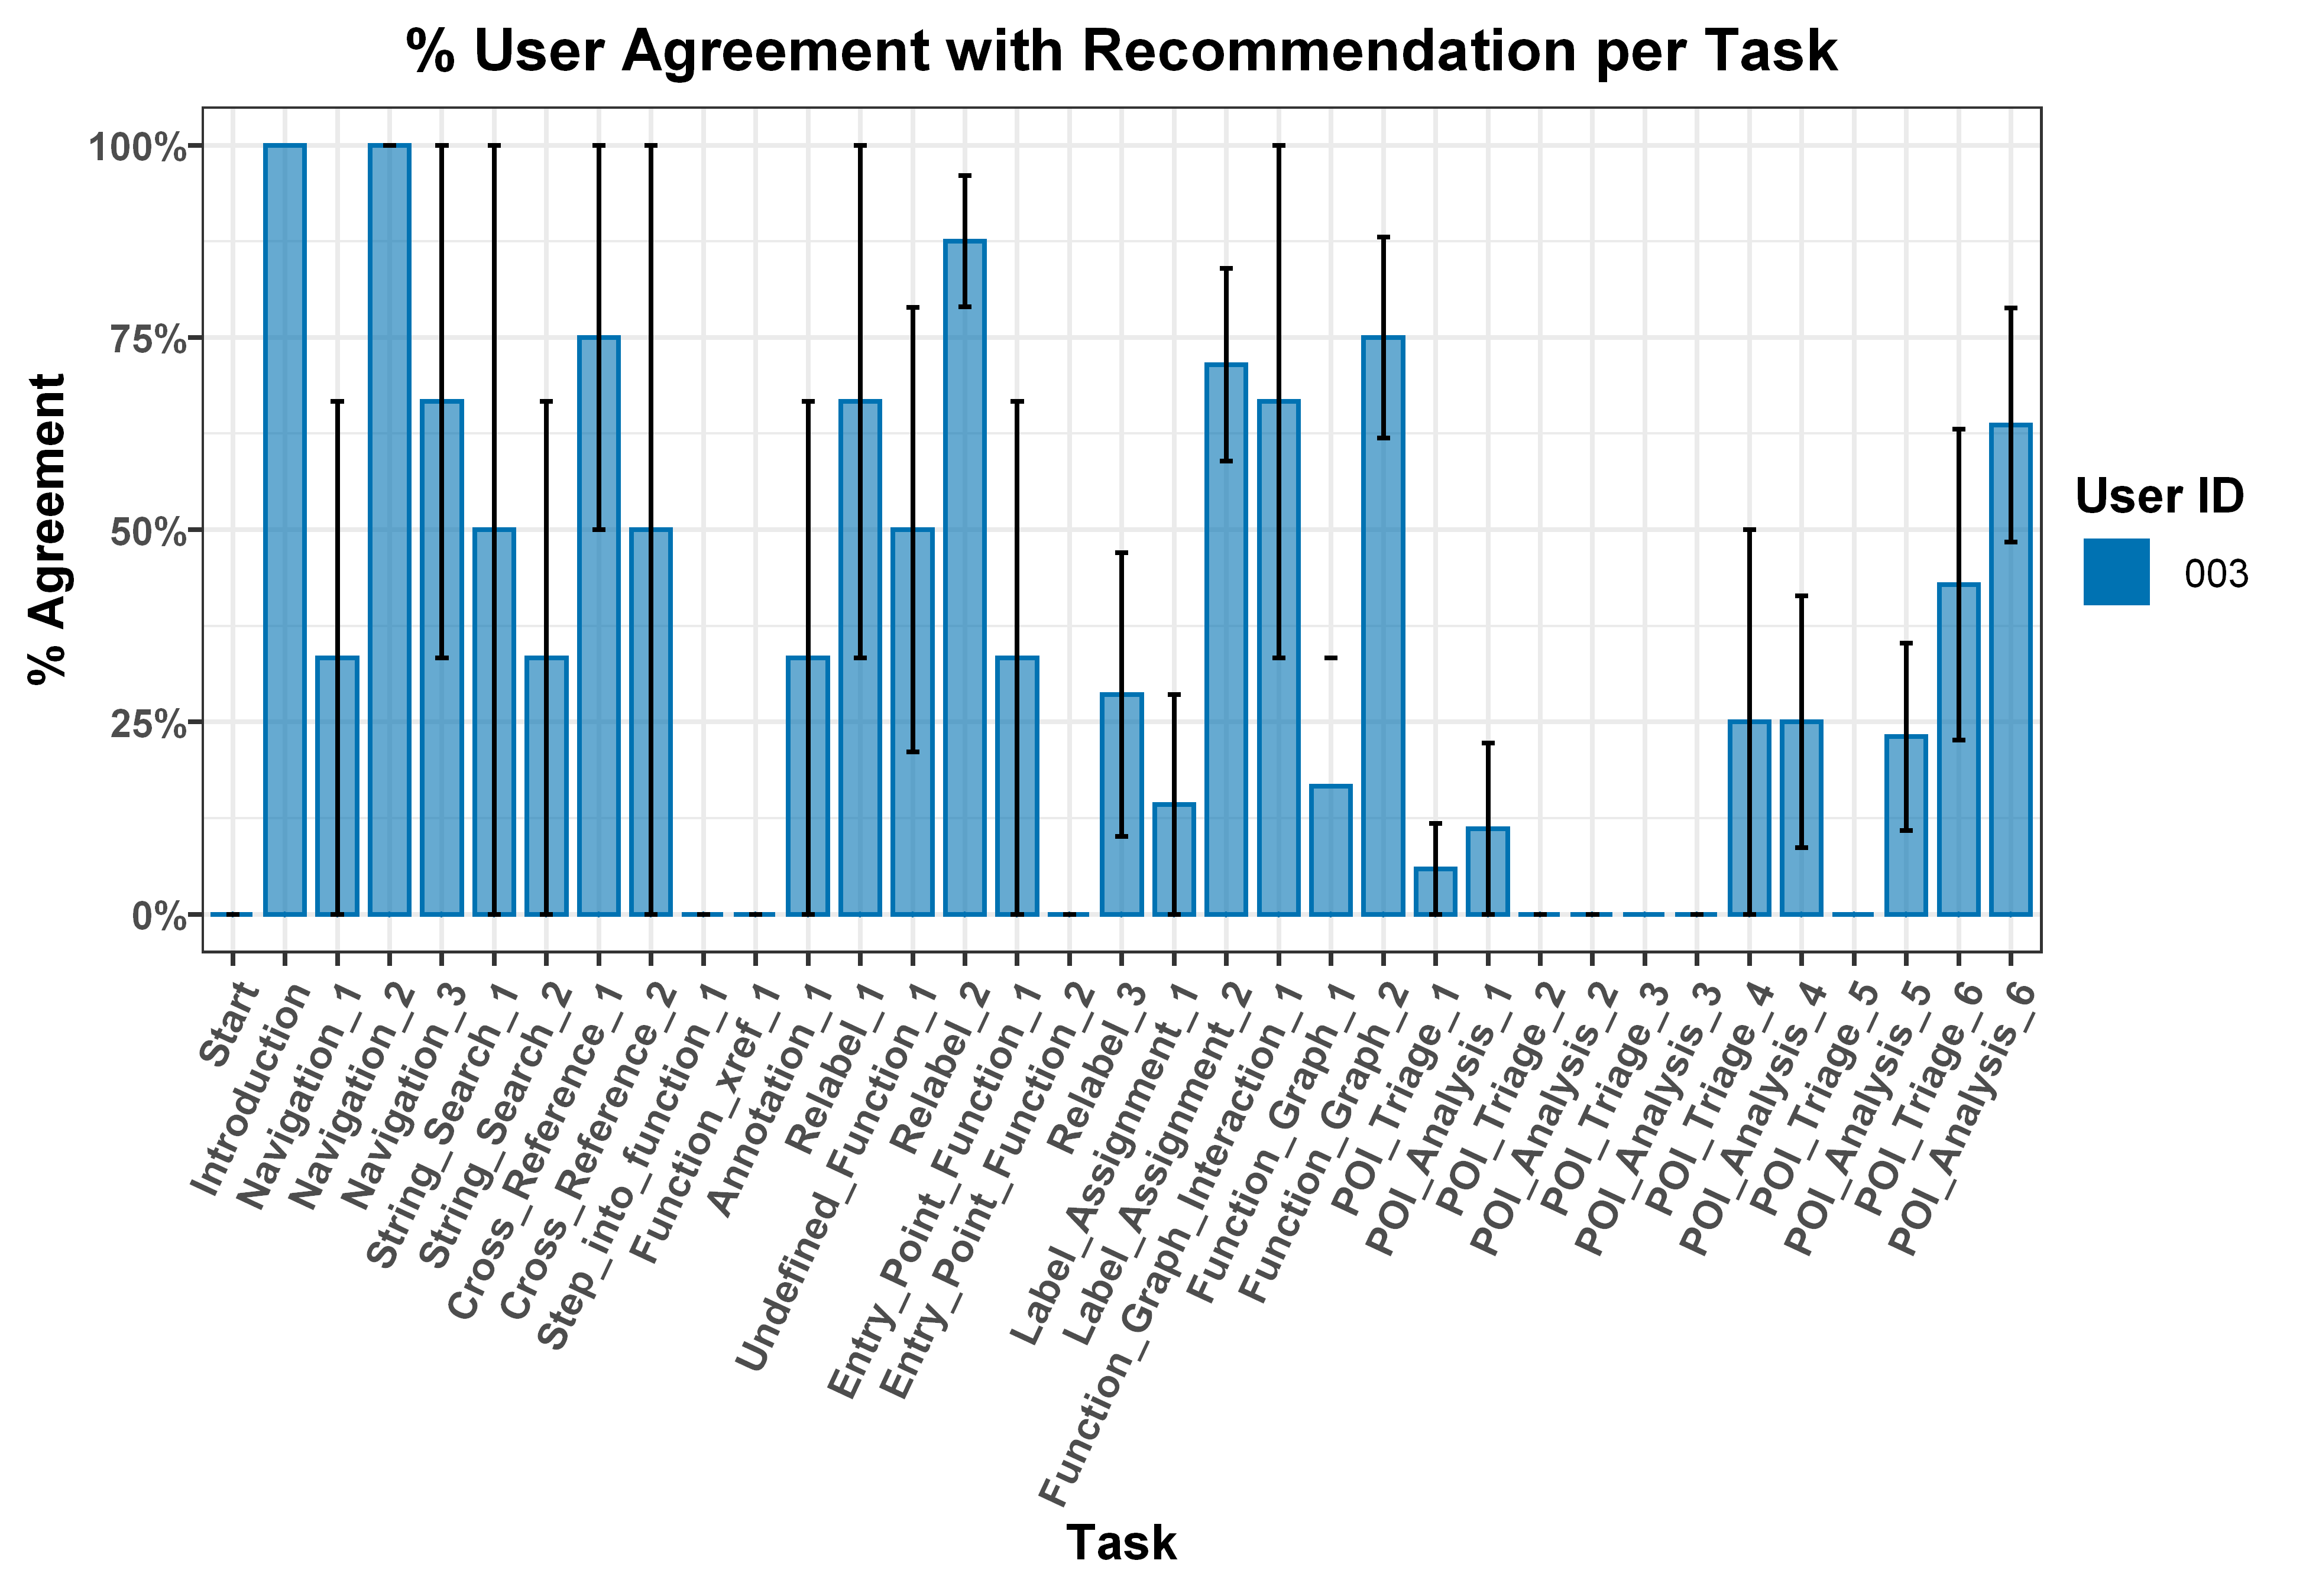

In [240]:
## Mean agreement per task (w/expert initialization)
options(repr.plot.width=6.5, repr.plot.height=4.5, repr.plot.res=600)

data <- summaryBy(Match_Any ~ UserID + Task, data=model_data_003, keep.names=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
data$Match_Any.se <- data$Match_Any.sd / sqrt(data$Match_Any.length)
data$Task <- factor(data$Task, levels = data$Task)
#levels(data$Task)
data$Task <- revalue(data$Task, c(Point_of_Interest_Triage_1="POI_Triage_1", Proof_of_Vulnerability_Analysis_1="POI_Analysis_1",
                                  Point_of_Interest_Triage_2="POI_Triage_2", Proof_of_Vulnerability_Analysis_2="POI_Analysis_2",
                                  Point_of_Interest_Triage_3="POI_Triage_3", Proof_of_Vulnerability_Analysis_3="POI_Analysis_3",
                                  Point_of_Interest_Triage_4="POI_Triage_4", Proof_of_Vulnerability_Analysis_4="POI_Analysis_4",
                                  Point_of_Interest_Triage_5="POI_Triage_5", Proof_of_Vulnerability_Analysis_5="POI_Analysis_5",
                                  Point_of_Interest_Triage_6="POI_Triage_6", Proof_of_Vulnerability_Analysis_6="POI_Analysis_6"))

agg_003 <- ggplot(data = data, aes(x=Task, y=Match_Any.mean, group=UserID, color=UserID, fill=UserID)) + labs(fill="User ID",color="User ID") +
            geom_col(position=position_dodge(), width = 0.75, show.legend=FALSE) +
            geom_point(aes(y=0,color=UserID), size=0) +
            geom_errorbar(aes(ymin = Match_Any.mean - Match_Any.se, ymax = Match_Any.mean + Match_Any.se), colour="black", size=.50, width=.25) +
            scale_fill_manual(values=alpha(c("#0072B2"),0.6)) +
            scale_color_manual(values=c("#0072B2")) +
            guides(color = guide_legend(override.aes = list(shape=15,size = 6))) +
            ylab("% Agreement") + xlab("Task") + #ylim(0.0,1.0) + #coord_fixed(1.2) +
            scale_y_continuous(limits=c(0.0,1.0), labels = scales::percent) +
            theme_bw() + ggtitle("% User Agreement with Recommendation per Task") + 
            theme(text = element_text(size=10, face="bold"),
                  axis.title.x = element_text(margin = margin(t=2)),
                  axis.title.y = element_text(margin = margin(t=0)),
                  axis.text.x = element_text(size=8, angle = 65, vjust = 1.0, hjust=1), 
                  axis.text.y = element_text(size=8, margin = margin(l=3)),
                  legend.text = element_text(size=8, face="plain"),
                  legend.spacing.y = unit(0.075, 'cm'),
                  legend.box.margin=margin(-5,0,-10,-10),
                  plot.title = element_text(size=12, hjust = 0.5))
agg_003

Warning message:
"Removed 2252 row(s) containing missing values (geom_path)."
Warning message in cor(Agg_cogLoad_normed, Past_CogLoad_normed, use = "pairwise.complete.obs"):
"the standard deviation is zero"
Warning message in cor(Agg_cogLoad_normed, Future_CogLoad_normed, use = "pairwise.complete.obs"):
"the standard deviation is zero"


r_Past_rolled r_Past_interp r_Future_rolled r_Future_interp
1 NA            NA            NA              NA

Warning message:
"Removed 1796 row(s) containing missing values (geom_path)."


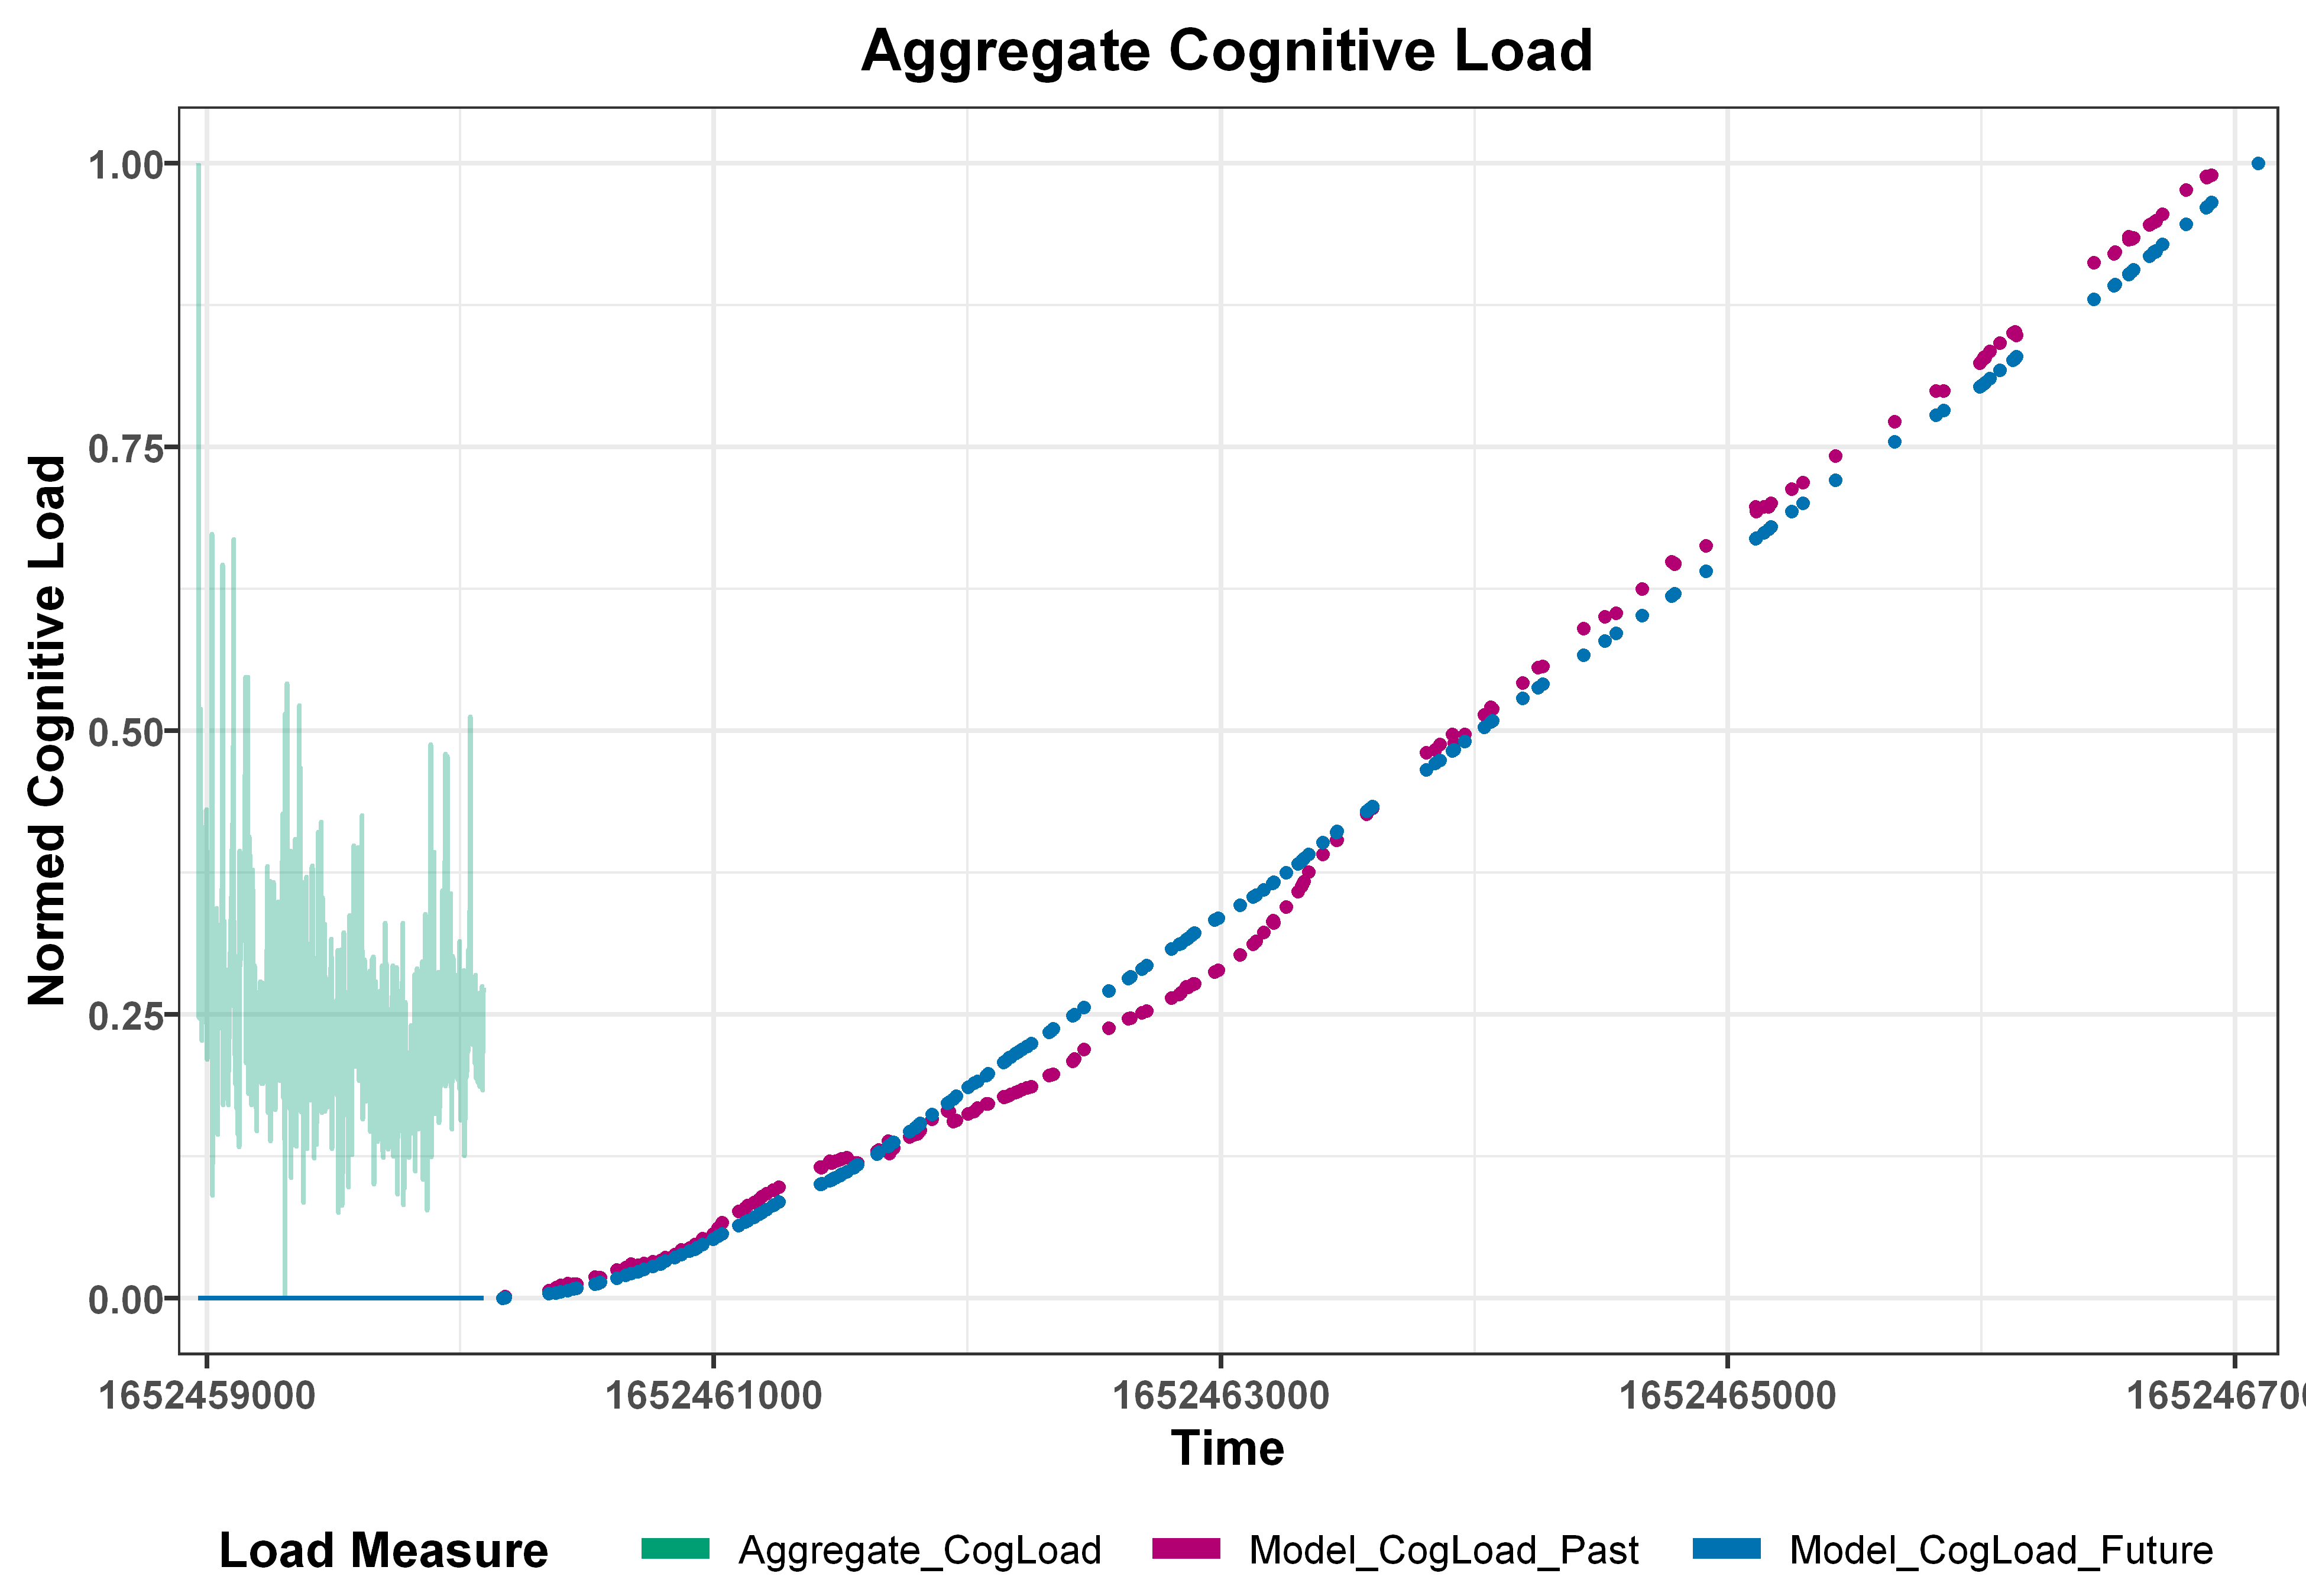

TaskLoad_r_Past_rolled TaskLoad_r_Past_interp TaskLoad_r_Future_rolled
1 0.01624002             0.02756522             0.01551187              
  TaskLoad_r_Future_interp Engagement_r_Past_rolled Engagement_r_Past_interp
1 0.02745528               0.1029334                0.1001421               
  Engagement_r_Future_rolled Engagement_r_Future_interp
1 0.1046265                  0.1024372

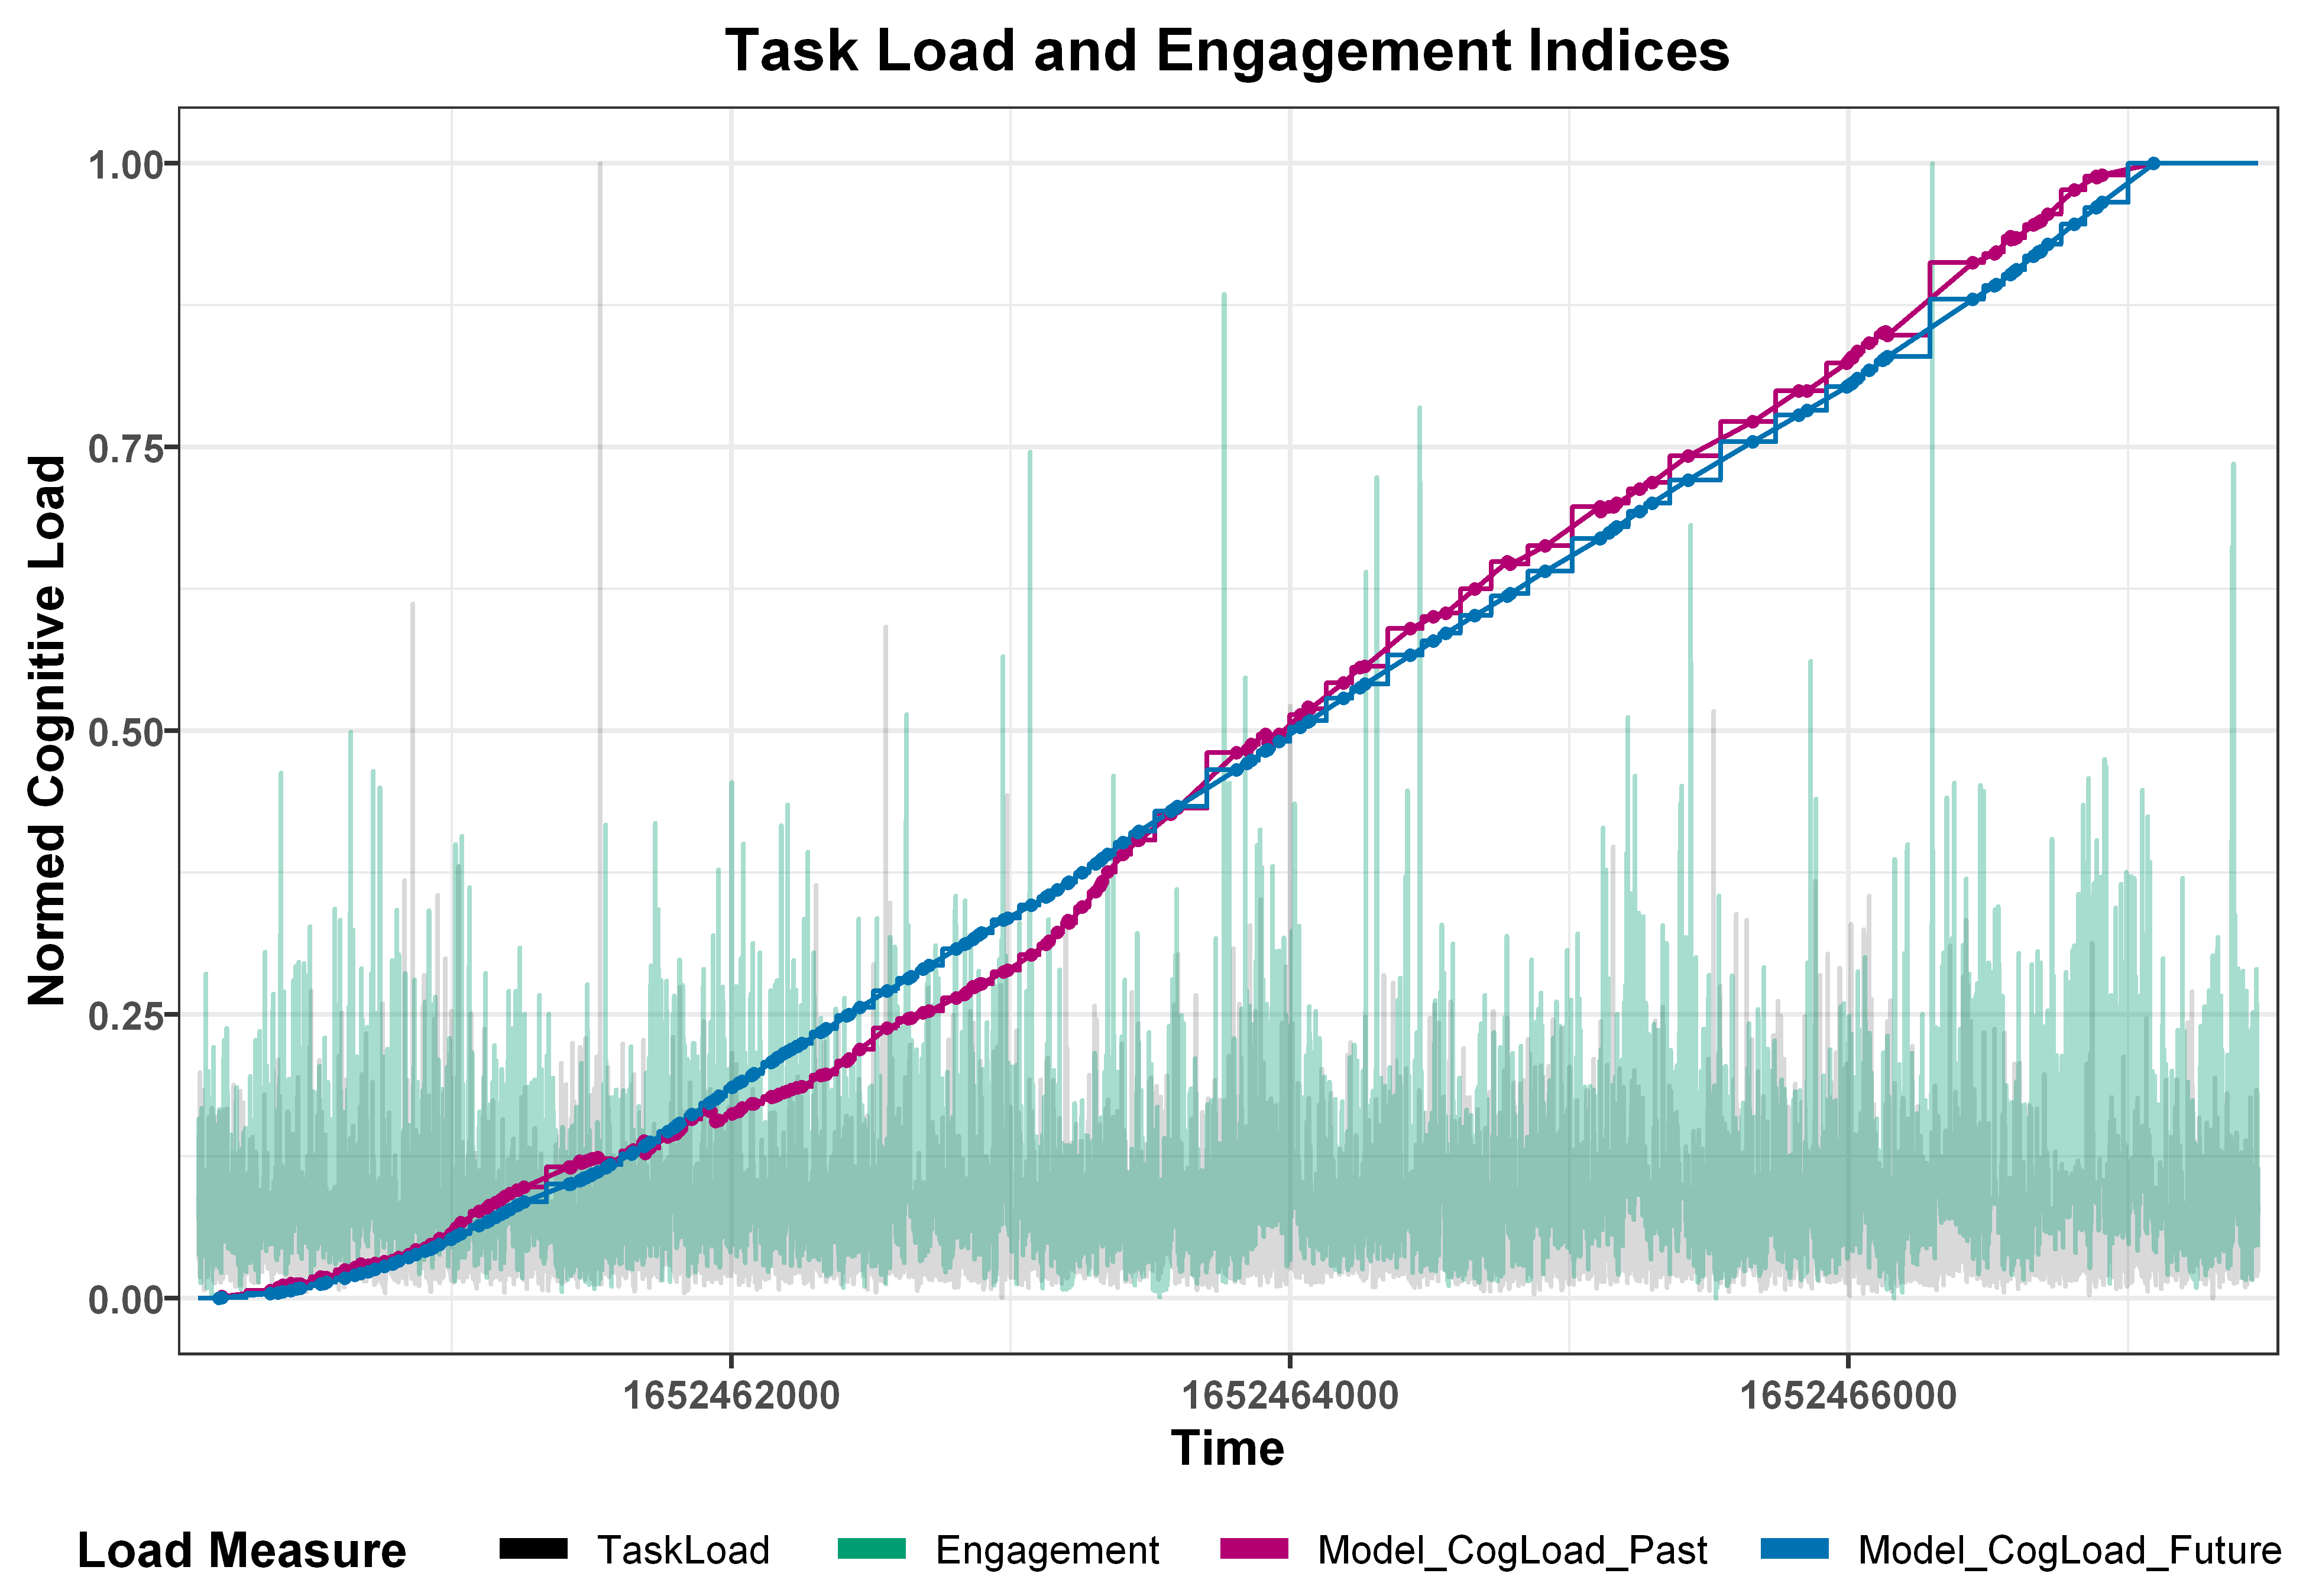

In [241]:
## Cognitive Load Correlations
model_data <- summaryBy(Past_CogLoad + Future_CogLoad ~ UserID + Time, data=model_data_003, keep.names=TRUE, order=FALSE)
model_data$Past_CogLoad_normed = (model_data$Past_CogLoad-min(model_data$Past_CogLoad))/(max(model_data$Past_CogLoad)-min(model_data$Past_CogLoad))
model_data$Future_CogLoad_normed = (model_data$Future_CogLoad-min(model_data$Future_CogLoad))/(max(model_data$Future_CogLoad)-min(model_data$Future_CogLoad))
model_data <- summaryBy(Past_CogLoad_normed + Future_CogLoad_normed ~ UserID + Time, data=model_data, keep.names=TRUE, order=FALSE)
#head(model_data)

cogload_data <- summaryBy(Agg_cogLoad ~ UserID + Time, data=cogload_data_003, keep.names=TRUE, order=FALSE)
cogload_data$Agg_cogLoad_normed = (cogload_data$Agg_cogLoad-min(cogload_data$Agg_cogLoad))/(max(cogload_data$Agg_cogLoad)-min(cogload_data$Agg_cogLoad))
cogload_data <- summaryBy(Agg_cogLoad_normed ~ UserID + Time, data=cogload_data, keep.names=TRUE, order=FALSE)
#head(cogload_data)

eng_taskload_data <- summaryBy(TaskLoad + Engagement ~ UserID + Time, data=eng_taskload_data_003, keep.names=TRUE, order=FALSE)
eng_taskload_data$Engagement[eng_taskload_data$Engagement>13] = 0
#summary(eng_taskload_data$Engagement)
eng_taskload_data$TaskLoad_normed = (eng_taskload_data$TaskLoad-min(eng_taskload_data$TaskLoad))/(max(eng_taskload_data$TaskLoad)-min(eng_taskload_data$TaskLoad))
eng_taskload_data$Engagement_normed = (eng_taskload_data$Engagement-min(eng_taskload_data$Engagement))/(max(eng_taskload_data$Engagement)-min(eng_taskload_data$Engagement))
eng_taskload_data <- summaryBy(TaskLoad_normed + Engagement_normed ~ UserID + Time, data=eng_taskload_data, keep.names=TRUE, order=FALSE)
#head(eng_taskload_data)

setDT(model_data)
setDT(cogload_data)
setDT(eng_taskload_data)

setkey(model_data, UserID, Time)
setkey(cogload_data, UserID, Time)
setkey(eng_taskload_data, UserID, Time)

###Aggregate Cognitive Load
rawdata = model_data[cogload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

rawdata$Future_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Future_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past",
                        ifelse(data$variable=="Future_CogLoad_normed"|data$variable=="Future_CogLoadInterp","Model_CogLoad_Future",
                               "Aggregate_CogLoad"))
data$type <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Future_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp"|data$variable=="Future_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("Aggregate_CogLoad", "Model_CogLoad_Past","Model_CogLoad_Future"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)

load_003 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                geom_point(data=model_data, aes(Time, Future_CogLoad_normed), colour="#0072B2", size = 0.75) +
                scale_color_manual(values=c("#009E73","#B20072","#0072B2")) +
                scale_alpha_manual(values=c(0.35,1.0,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Aggregate Cognitive Load") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-10),
                      plot.title = element_text(size=12, hjust = 0.5))
load_003

rawdata %>% group_by(UserID) %>%
  summarise(r_Past_rolled = cor(Agg_cogLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
            r_Past_interp = cor(Agg_cogLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
            r_Future_rolled = cor(Agg_cogLoad_normed, Future_CogLoad_normed, use="pairwise.complete.obs"),
            r_Future_interp = cor(Agg_cogLoad_normed, Future_CogLoadInterp, use="pairwise.complete.obs"))


###Task Load Index
rawdata = model_data[eng_taskload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

rawdata$Future_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Future_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past",
                        ifelse(data$variable=="Future_CogLoad_normed"|data$variable=="Future_CogLoadInterp","Model_CogLoad_Future",
                               ifelse(data$variable=="TaskLoad_normed","TaskLoad","Engagement")))
data$type <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Future_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp"|data$variable=="Future_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("TaskLoad","Engagement","Model_CogLoad_Past","Model_CogLoad_Future"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)

eng_003 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                geom_point(data=model_data, aes(Time, Future_CogLoad_normed), colour="#0072B2", size = 0.75) +
                scale_color_manual(values=c("black","#009E73","#B20072","#0072B2")) +
                scale_alpha_manual(values=c(0.15,0.35,1.0,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Task Load and Engagement Indices") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-25),
                      plot.title = element_text(size=12, hjust = 0.5))
eng_003

rawdata %>% group_by(UserID) %>%
  summarise(TaskLoad_r_Past_rolled = cor(TaskLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
            TaskLoad_r_Past_interp = cor(TaskLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
            TaskLoad_r_Future_rolled = cor(TaskLoad_normed, Future_CogLoad_normed, use="pairwise.complete.obs"),
            TaskLoad_r_Future_interp = cor(TaskLoad_normed, Future_CogLoadInterp, use="pairwise.complete.obs"),
            Engagement_r_Past_rolled = cor(Engagement_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
            Engagement_r_Past_interp = cor(Engagement_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
            Engagement_r_Future_rolled = cor(Engagement_normed, Future_CogLoad_normed, use="pairwise.complete.obs"),
            Engagement_r_Future_interp = cor(Engagement_normed, Future_CogLoadInterp, use="pairwise.complete.obs"))


# Subject 004

The following `from` values were not present in `x`: Proof_of_Vulnerability_Analysis_1, Proof_of_Vulnerability_Analysis_2, Proof_of_Vulnerability_Analysis_3, Proof_of_Vulnerability_Analysis_4, Proof_of_Vulnerability_Analysis_5, Proof_of_Vulnerability_Analysis_6



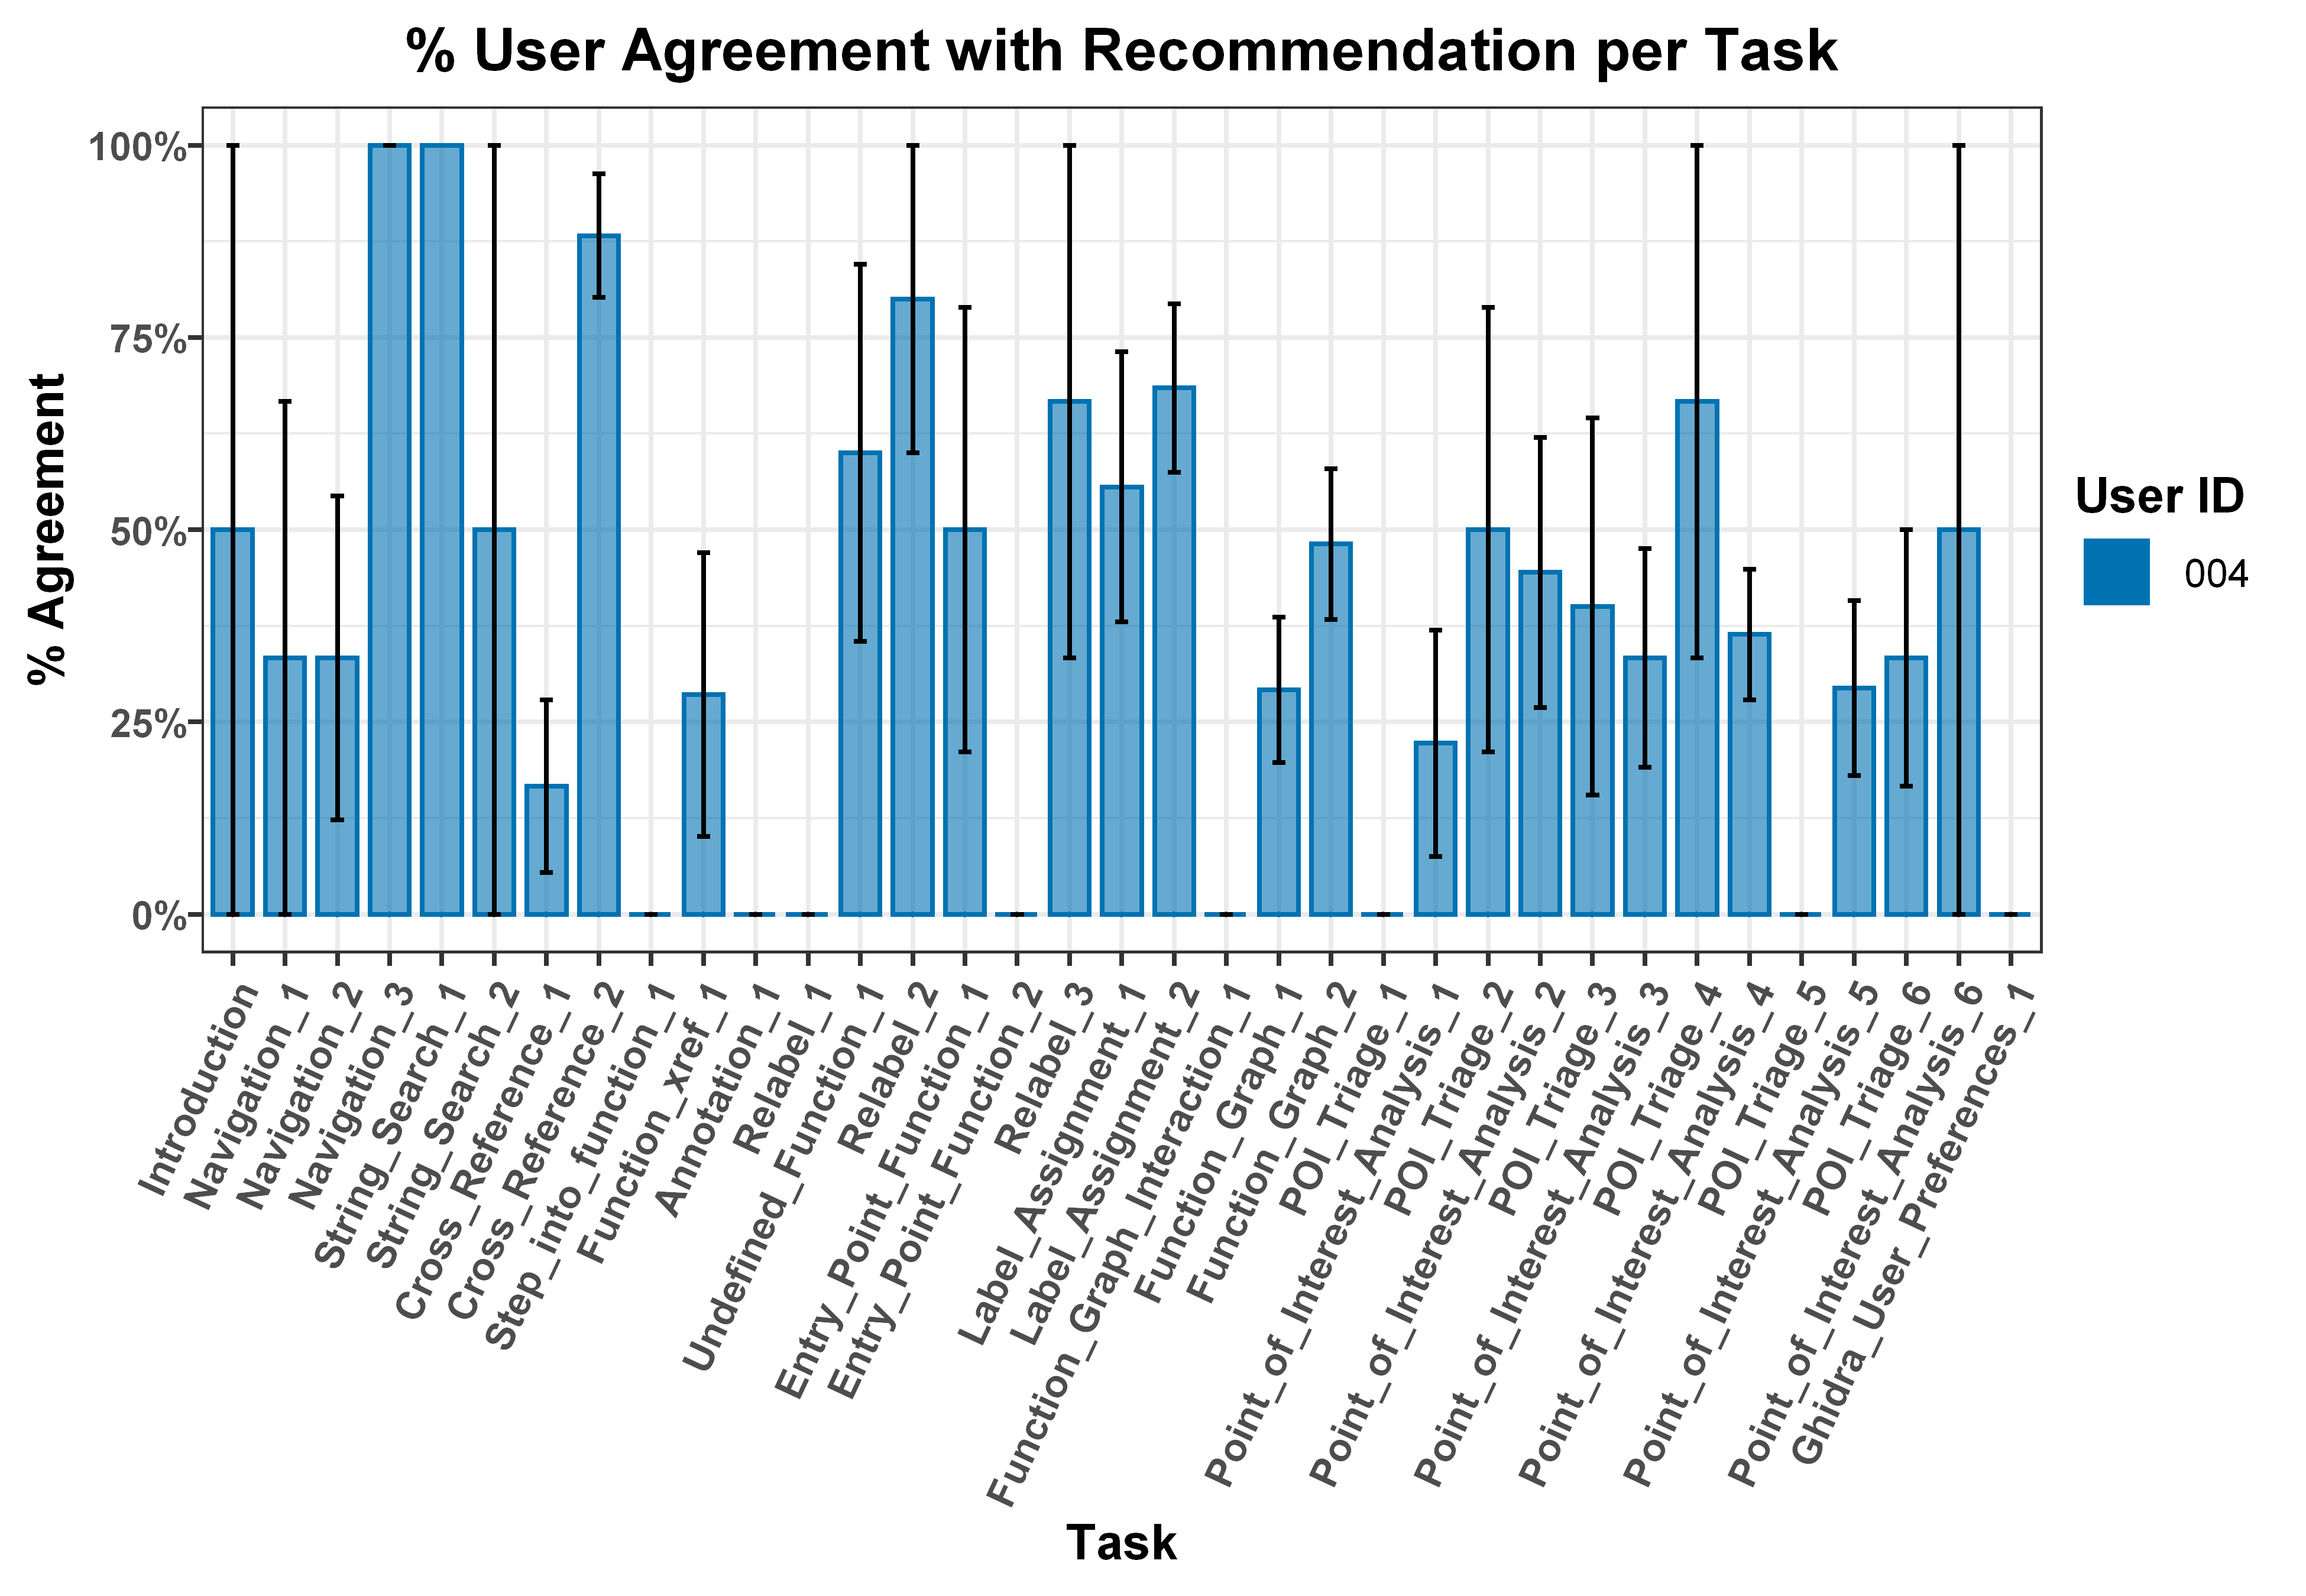

In [242]:
## Mean agreement per task (w/expert initialization)
options(repr.plot.width=6.5, repr.plot.height=4.5, repr.plot.res=600)

data <- summaryBy(Match_Any ~ UserID + Task, data=model_data_004, keep.names=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
data$Match_Any.se <- data$Match_Any.sd / sqrt(data$Match_Any.length)
data$Task <- factor(data$Task, levels = data$Task)
#levels(data$Task)
data$Task <- revalue(data$Task, c(Point_of_Interest_Triage_1="POI_Triage_1", Proof_of_Vulnerability_Analysis_1="POI_Analysis_1",
                                  Point_of_Interest_Triage_2="POI_Triage_2", Proof_of_Vulnerability_Analysis_2="POI_Analysis_2",
                                  Point_of_Interest_Triage_3="POI_Triage_3", Proof_of_Vulnerability_Analysis_3="POI_Analysis_3",
                                  Point_of_Interest_Triage_4="POI_Triage_4", Proof_of_Vulnerability_Analysis_4="POI_Analysis_4",
                                  Point_of_Interest_Triage_5="POI_Triage_5", Proof_of_Vulnerability_Analysis_5="POI_Analysis_5",
                                  Point_of_Interest_Triage_6="POI_Triage_6", Proof_of_Vulnerability_Analysis_6="POI_Analysis_6"))

agg_004 <- ggplot(data = data, aes(x=Task, y=Match_Any.mean, group=UserID, color=UserID, fill=UserID)) + labs(fill="User ID",color="User ID") +
            geom_col(position=position_dodge(), width = 0.75, show.legend=FALSE) +
            geom_point(aes(y=0,color=UserID), size=0) +
            geom_errorbar(aes(ymin = Match_Any.mean - Match_Any.se, ymax = Match_Any.mean + Match_Any.se), colour="black", size=.50, width=.25) +
            scale_fill_manual(values=alpha(c("#0072B2"),0.6)) +
            scale_color_manual(values=c("#0072B2")) +
            guides(color = guide_legend(override.aes = list(shape=15,size = 6))) +
            ylab("% Agreement") + xlab("Task") + #ylim(0.0,1.0) + #coord_fixed(1.2) +
            scale_y_continuous(limits=c(0.0,1.0), labels = scales::percent) +
            theme_bw() + ggtitle("% User Agreement with Recommendation per Task") + 
            theme(text = element_text(size=10, face="bold"),
                  axis.title.x = element_text(margin = margin(t=2)),
                  axis.title.y = element_text(margin = margin(t=0)),
                  axis.text.x = element_text(size=8, angle = 65, vjust = 1.0, hjust=1), 
                  axis.text.y = element_text(size=8, margin = margin(l=3)),
                  legend.text = element_text(size=8, face="plain"),
                  legend.spacing.y = unit(0.075, 'cm'),
                  legend.box.margin=margin(-5,0,-10,-10),
                  plot.title = element_text(size=12, hjust = 0.5))
agg_004

Warning message:
"Removed 1060 row(s) containing missing values (geom_path)."


r_Past_rolled r_Past_interp r_Future_rolled r_Future_interp
1 -0.1601108    -0.1996175    -0.1601994      -0.1991868

Warning message:
"Removed 2508 row(s) containing missing values (geom_path)."


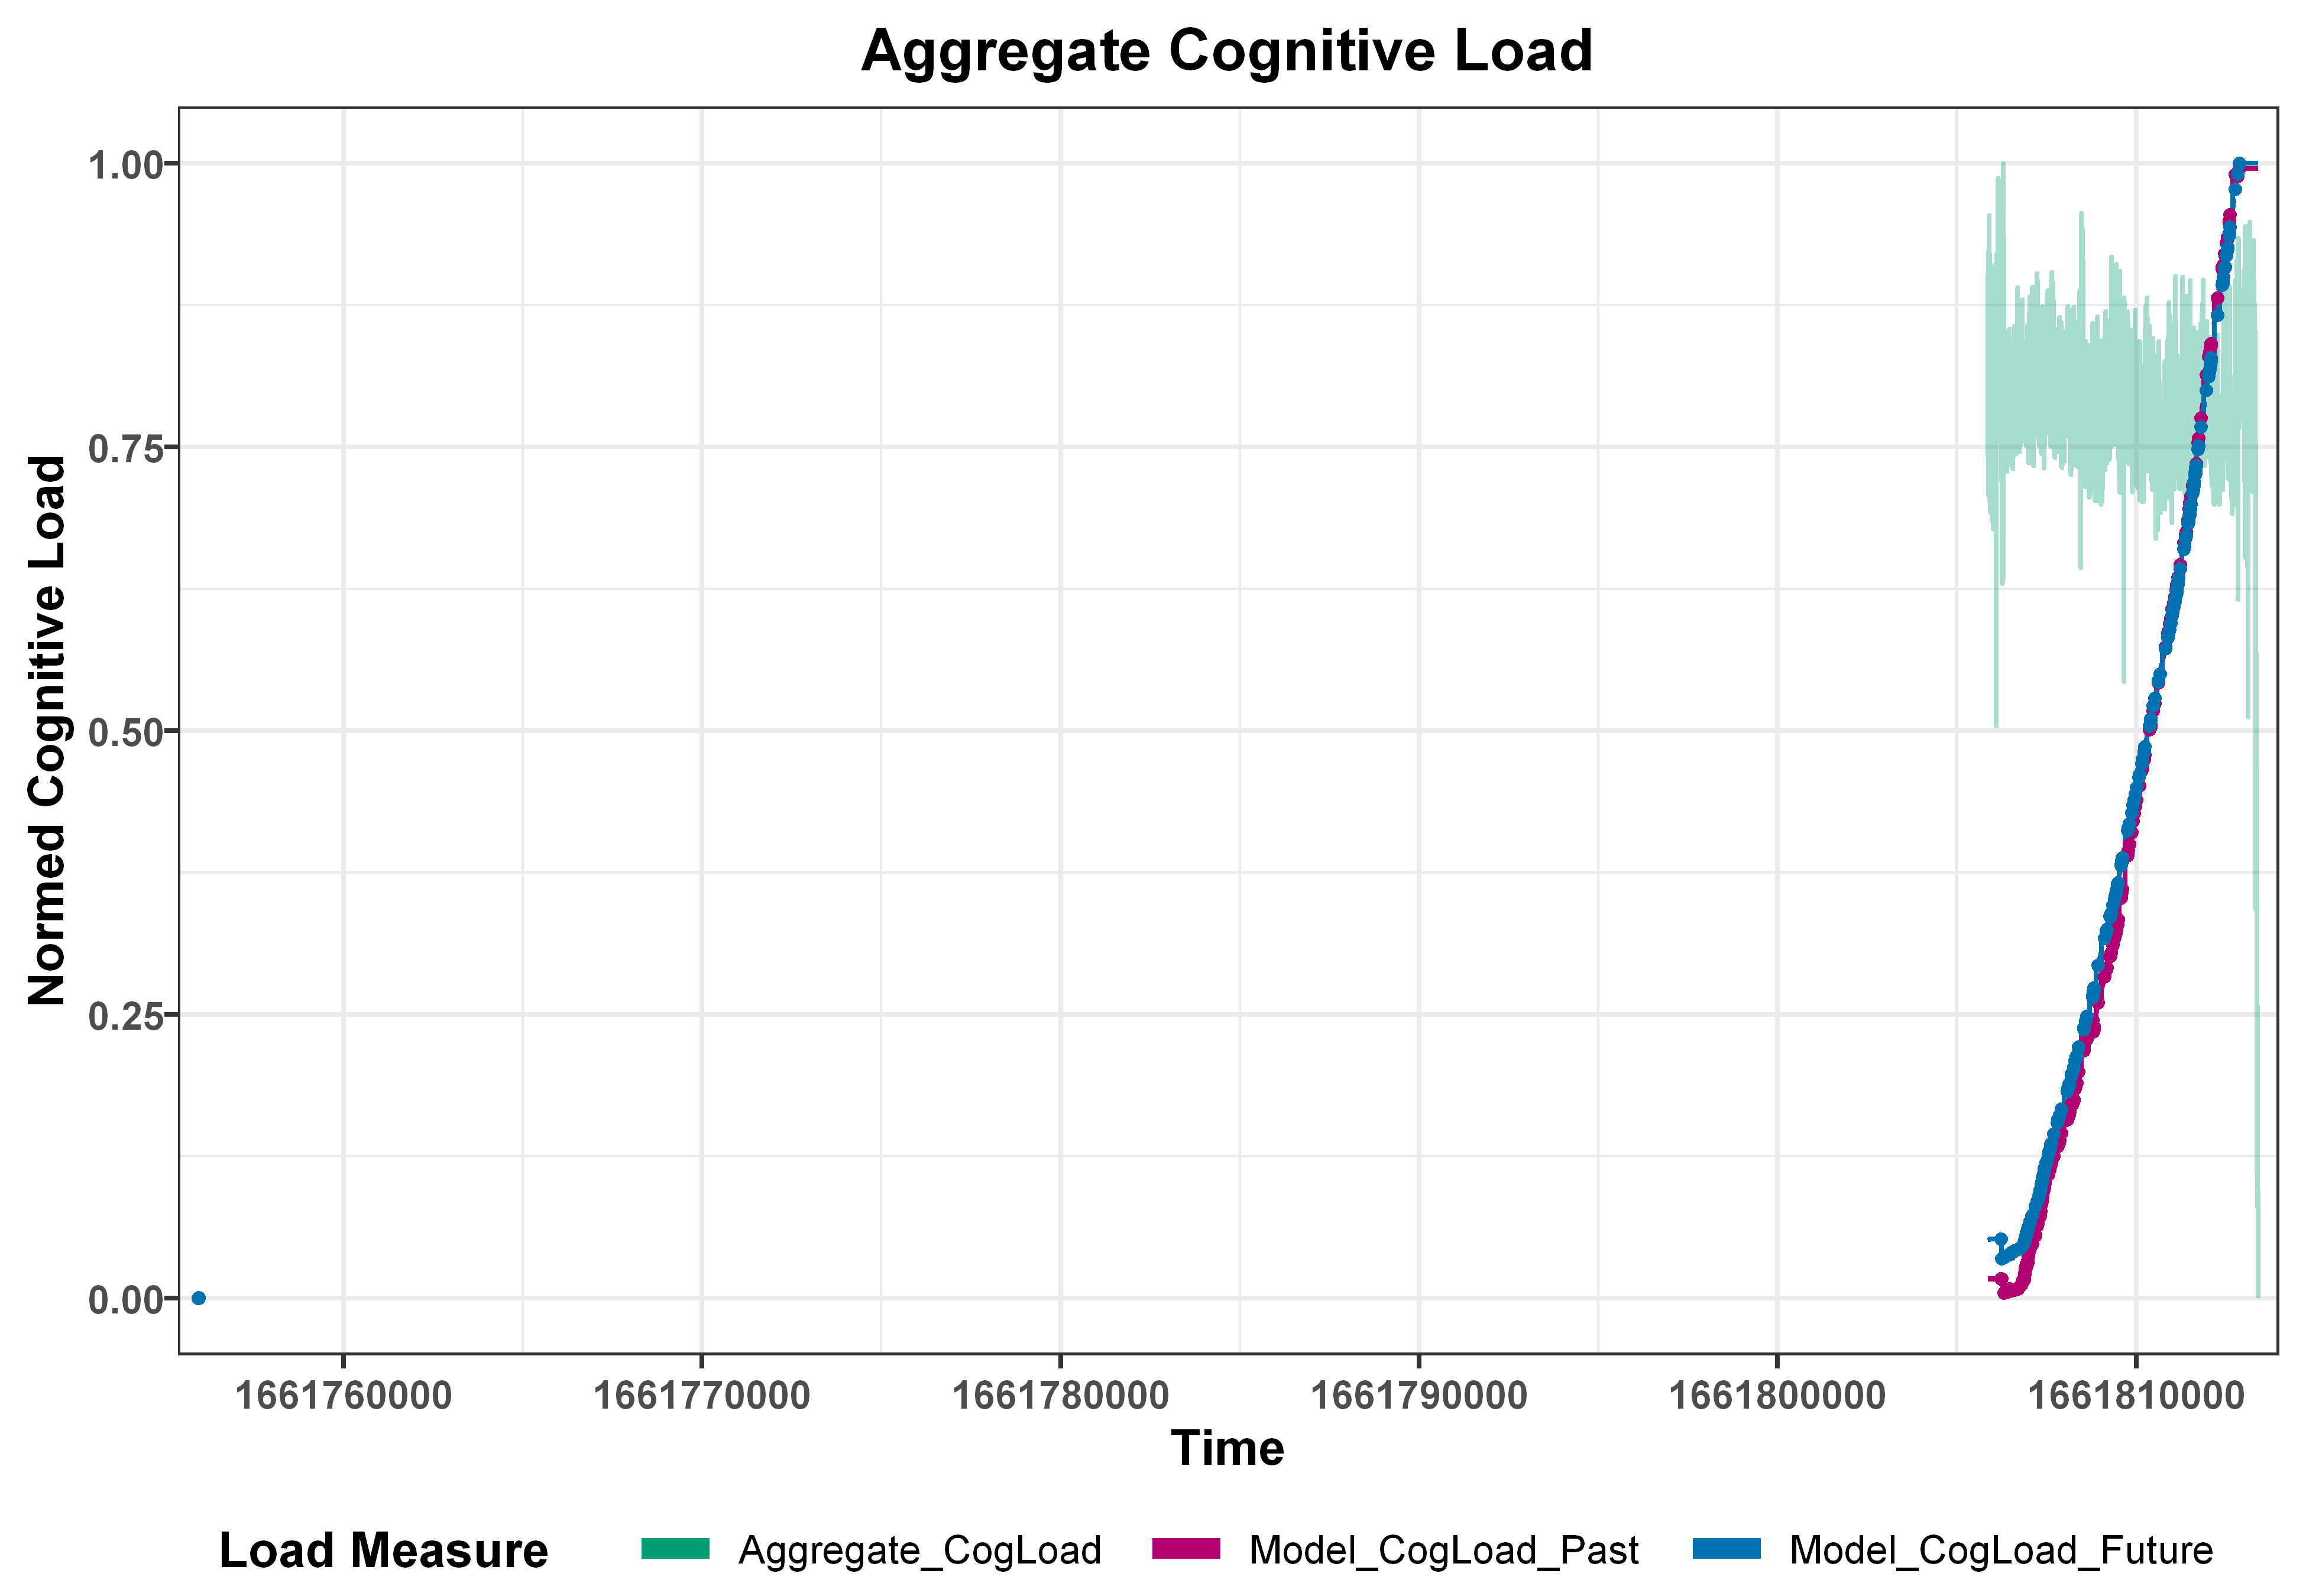

TaskLoad_r_Past_rolled TaskLoad_r_Past_interp TaskLoad_r_Future_rolled
1 -0.1420383             -0.1169478             -0.1401577              
  TaskLoad_r_Future_interp Engagement_r_Past_rolled Engagement_r_Past_interp
1 -0.1143816               0.4118965                0.3914762               
  Engagement_r_Future_rolled Engagement_r_Future_interp
1 0.4094985                  0.3884451

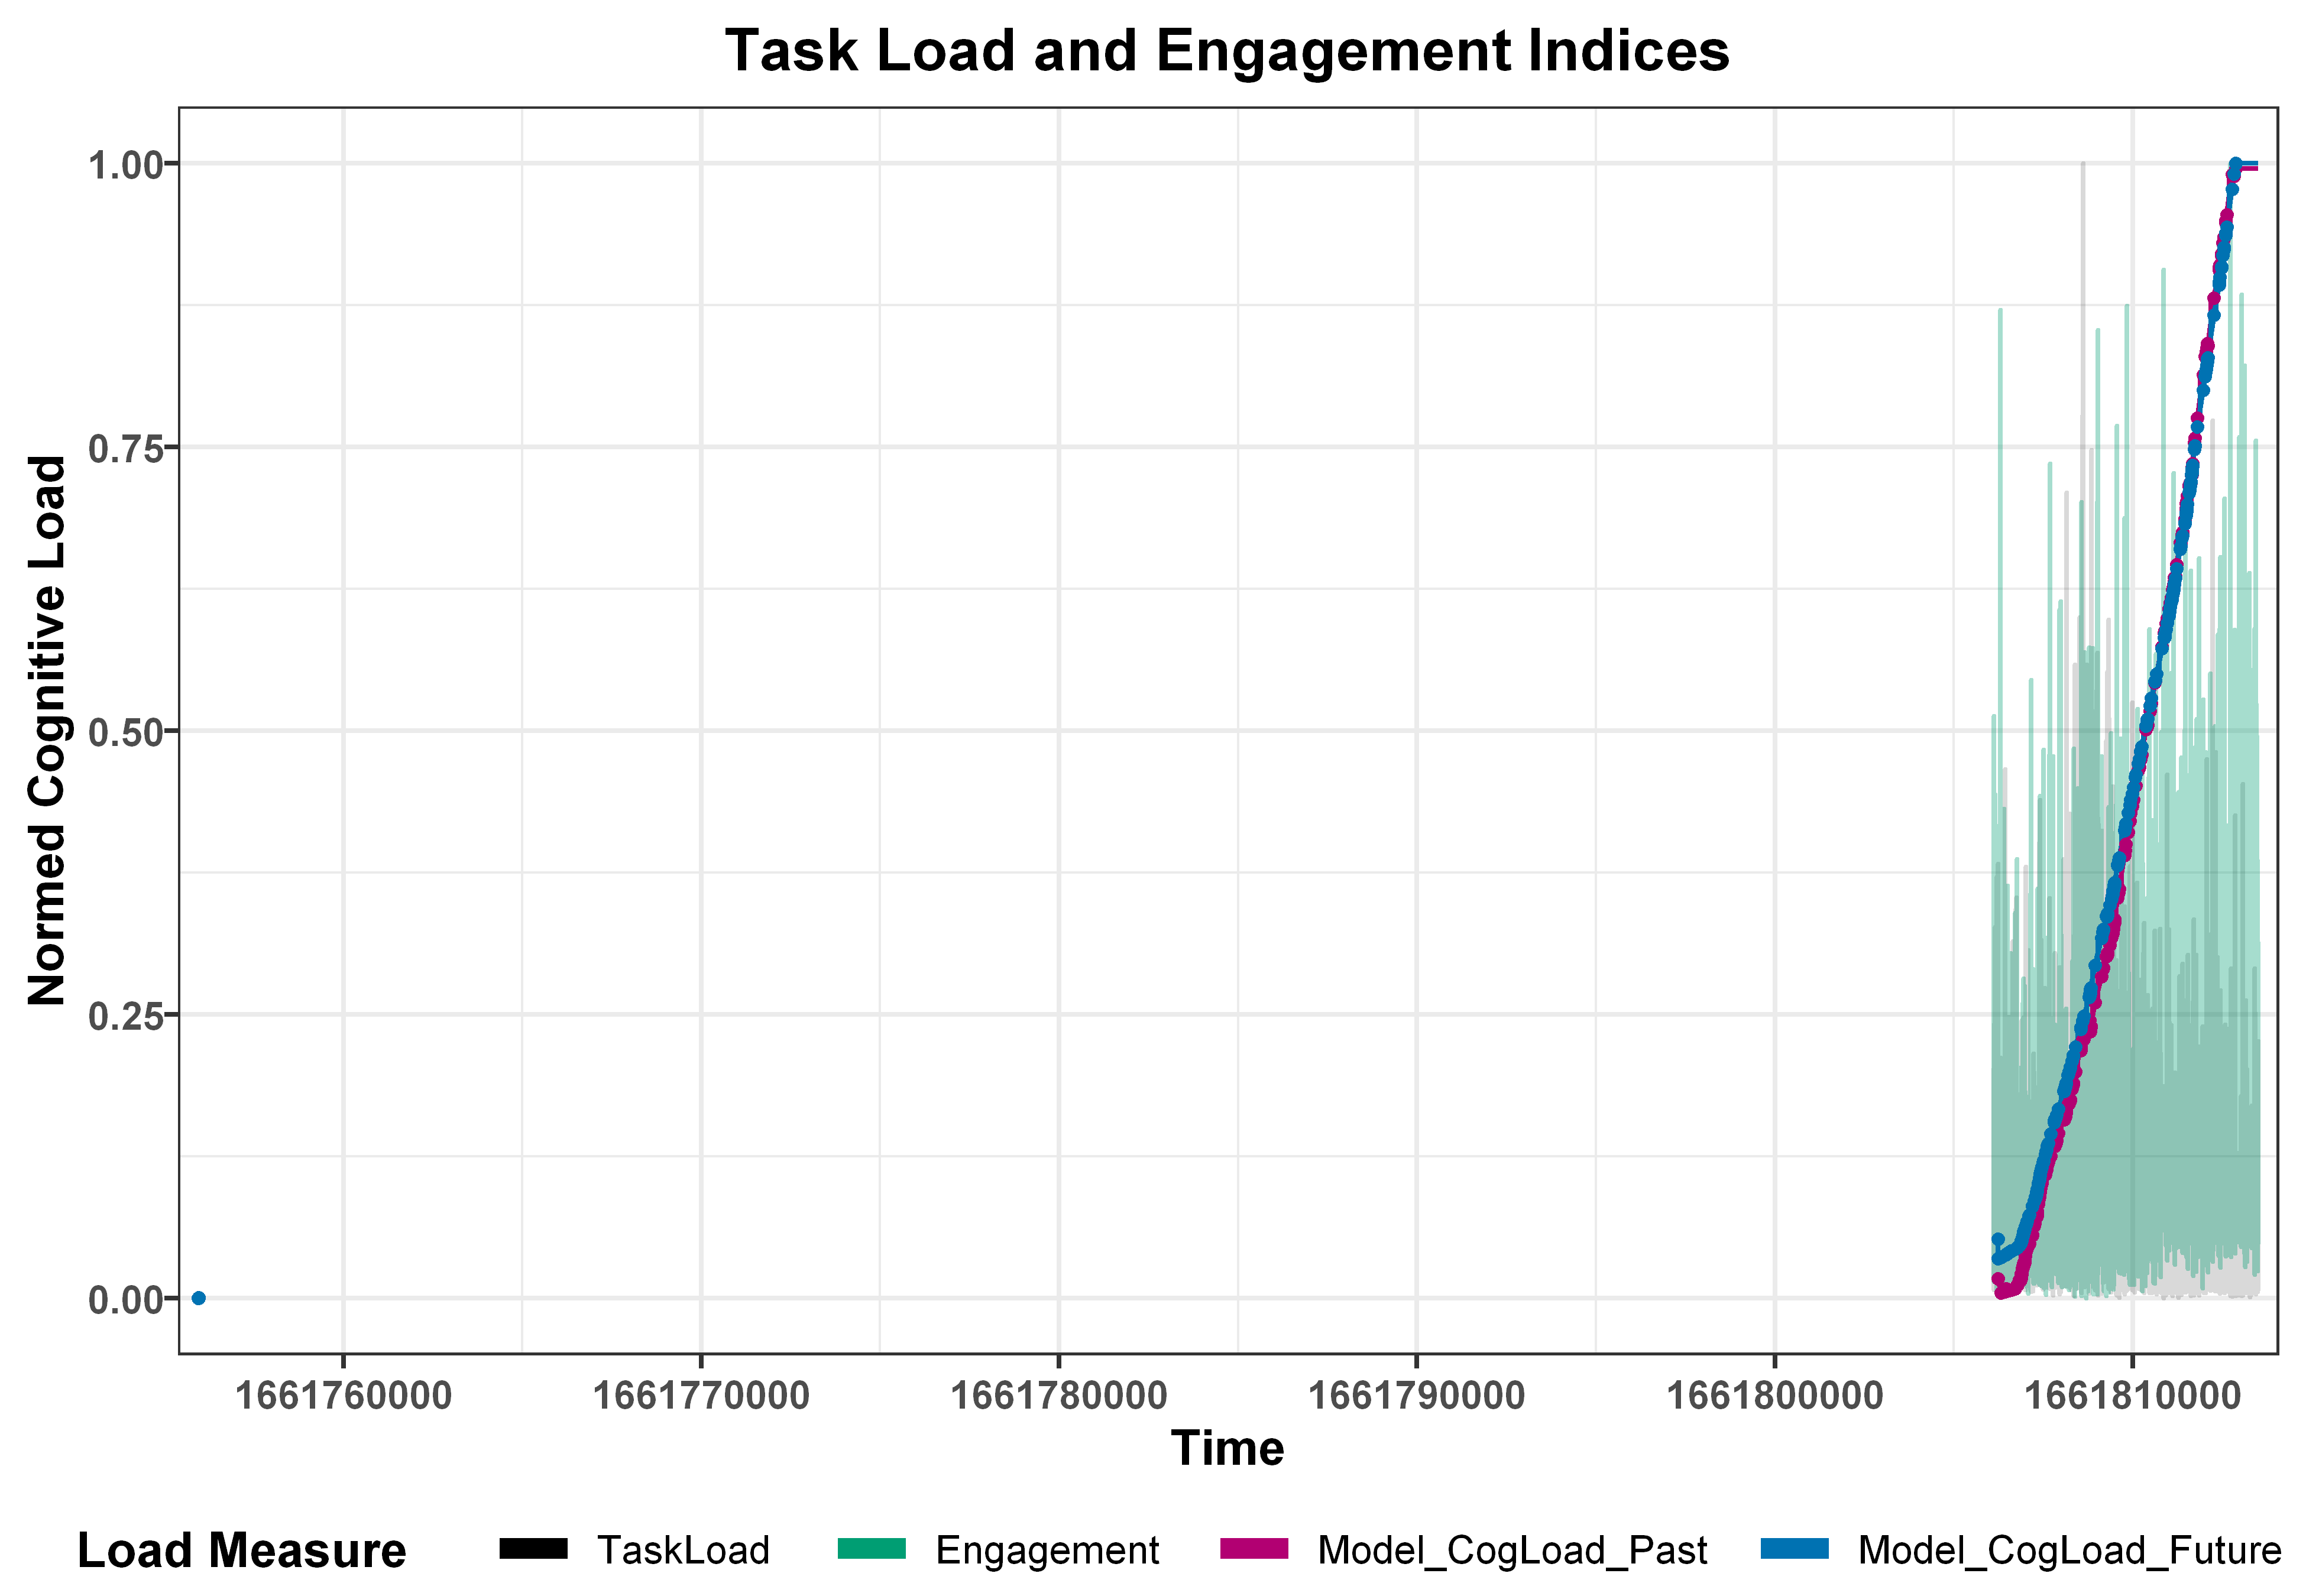

In [243]:
## Cognitive Load Correlations
model_data <- summaryBy(Past_CogLoad + Future_CogLoad ~ UserID + Time, data=model_data_004, keep.names=TRUE, order=FALSE)
model_data$Past_CogLoad_normed = (model_data$Past_CogLoad-min(model_data$Past_CogLoad))/(max(model_data$Past_CogLoad)-min(model_data$Past_CogLoad))
model_data$Future_CogLoad_normed = (model_data$Future_CogLoad-min(model_data$Future_CogLoad))/(max(model_data$Future_CogLoad)-min(model_data$Future_CogLoad))
model_data <- summaryBy(Past_CogLoad_normed + Future_CogLoad_normed ~ UserID + Time, data=model_data, keep.names=TRUE, order=FALSE)
#head(model_data)

cogload_data <- summaryBy(Agg_cogLoad ~ UserID + Time, data=cogload_data_004, keep.names=TRUE, order=FALSE)
cogload_data$Agg_cogLoad_normed = (cogload_data$Agg_cogLoad-min(cogload_data$Agg_cogLoad))/(max(cogload_data$Agg_cogLoad)-min(cogload_data$Agg_cogLoad))
cogload_data <- summaryBy(Agg_cogLoad_normed ~ UserID + Time, data=cogload_data, keep.names=TRUE, order=FALSE)
#head(cogload_data)

eng_taskload_data <- summaryBy(TaskLoad + Engagement ~ UserID + Time, data=eng_taskload_data_004, keep.names=TRUE, order=FALSE)
eng_taskload_data$Engagement[eng_taskload_data$Engagement>13] = 0
#summary(eng_taskload_data$Engagement)
eng_taskload_data$TaskLoad_normed = (eng_taskload_data$TaskLoad-min(eng_taskload_data$TaskLoad))/(max(eng_taskload_data$TaskLoad)-min(eng_taskload_data$TaskLoad))
eng_taskload_data$Engagement_normed = (eng_taskload_data$Engagement-min(eng_taskload_data$Engagement))/(max(eng_taskload_data$Engagement)-min(eng_taskload_data$Engagement))
eng_taskload_data <- summaryBy(TaskLoad_normed + Engagement_normed ~ UserID + Time, data=eng_taskload_data, keep.names=TRUE, order=FALSE)
#head(eng_taskload_data)

setDT(model_data)
setDT(cogload_data)
setDT(eng_taskload_data)

setkey(model_data, UserID, Time)
setkey(cogload_data, UserID, Time)
setkey(eng_taskload_data, UserID, Time)

###Aggregate Cognitive Load
rawdata = model_data[cogload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

rawdata$Future_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Future_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past",
                        ifelse(data$variable=="Future_CogLoad_normed"|data$variable=="Future_CogLoadInterp","Model_CogLoad_Future",
                               "Aggregate_CogLoad"))
data$type <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Future_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp"|data$variable=="Future_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("Aggregate_CogLoad", "Model_CogLoad_Past","Model_CogLoad_Future"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)

load_004 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                geom_point(data=model_data, aes(Time, Future_CogLoad_normed), colour="#0072B2", size = 0.75) +
                scale_color_manual(values=c("#009E73","#B20072","#0072B2")) +
                scale_alpha_manual(values=c(0.35,1.0,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Aggregate Cognitive Load") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-10),
                      plot.title = element_text(size=12, hjust = 0.5))
load_004

rawdata %>% group_by(UserID) %>%
  summarise(r_Past_rolled = cor(Agg_cogLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
            r_Past_interp = cor(Agg_cogLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
            r_Future_rolled = cor(Agg_cogLoad_normed, Future_CogLoad_normed, use="pairwise.complete.obs"),
            r_Future_interp = cor(Agg_cogLoad_normed, Future_CogLoadInterp, use="pairwise.complete.obs"))


###Task Load Index
rawdata = model_data[eng_taskload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

rawdata$Future_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Future_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past",
                        ifelse(data$variable=="Future_CogLoad_normed"|data$variable=="Future_CogLoadInterp","Model_CogLoad_Future",
                               ifelse(data$variable=="TaskLoad_normed","TaskLoad","Engagement")))
data$type <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Future_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp"|data$variable=="Future_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("TaskLoad","Engagement","Model_CogLoad_Past","Model_CogLoad_Future"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)

eng_004 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                geom_point(data=model_data, aes(Time, Future_CogLoad_normed), colour="#0072B2", size = 0.75) +
                scale_color_manual(values=c("black","#009E73","#B20072","#0072B2")) +
                scale_alpha_manual(values=c(0.15,0.35,1.0,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Task Load and Engagement Indices") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-25),
                      plot.title = element_text(size=12, hjust = 0.5))
eng_004

rawdata %>% group_by(UserID) %>%
  summarise(TaskLoad_r_Past_rolled = cor(TaskLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
            TaskLoad_r_Past_interp = cor(TaskLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
            TaskLoad_r_Future_rolled = cor(TaskLoad_normed, Future_CogLoad_normed, use="pairwise.complete.obs"),
            TaskLoad_r_Future_interp = cor(TaskLoad_normed, Future_CogLoadInterp, use="pairwise.complete.obs"),
            Engagement_r_Past_rolled = cor(Engagement_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
            Engagement_r_Past_interp = cor(Engagement_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
            Engagement_r_Future_rolled = cor(Engagement_normed, Future_CogLoad_normed, use="pairwise.complete.obs"),
            Engagement_r_Future_interp = cor(Engagement_normed, Future_CogLoadInterp, use="pairwise.complete.obs"))


# Subject 005

The following `from` values were not present in `x`: Proof_of_Vulnerability_Analysis_1, Proof_of_Vulnerability_Analysis_2, Proof_of_Vulnerability_Analysis_3, Proof_of_Vulnerability_Analysis_4, Proof_of_Vulnerability_Analysis_5, Proof_of_Vulnerability_Analysis_6



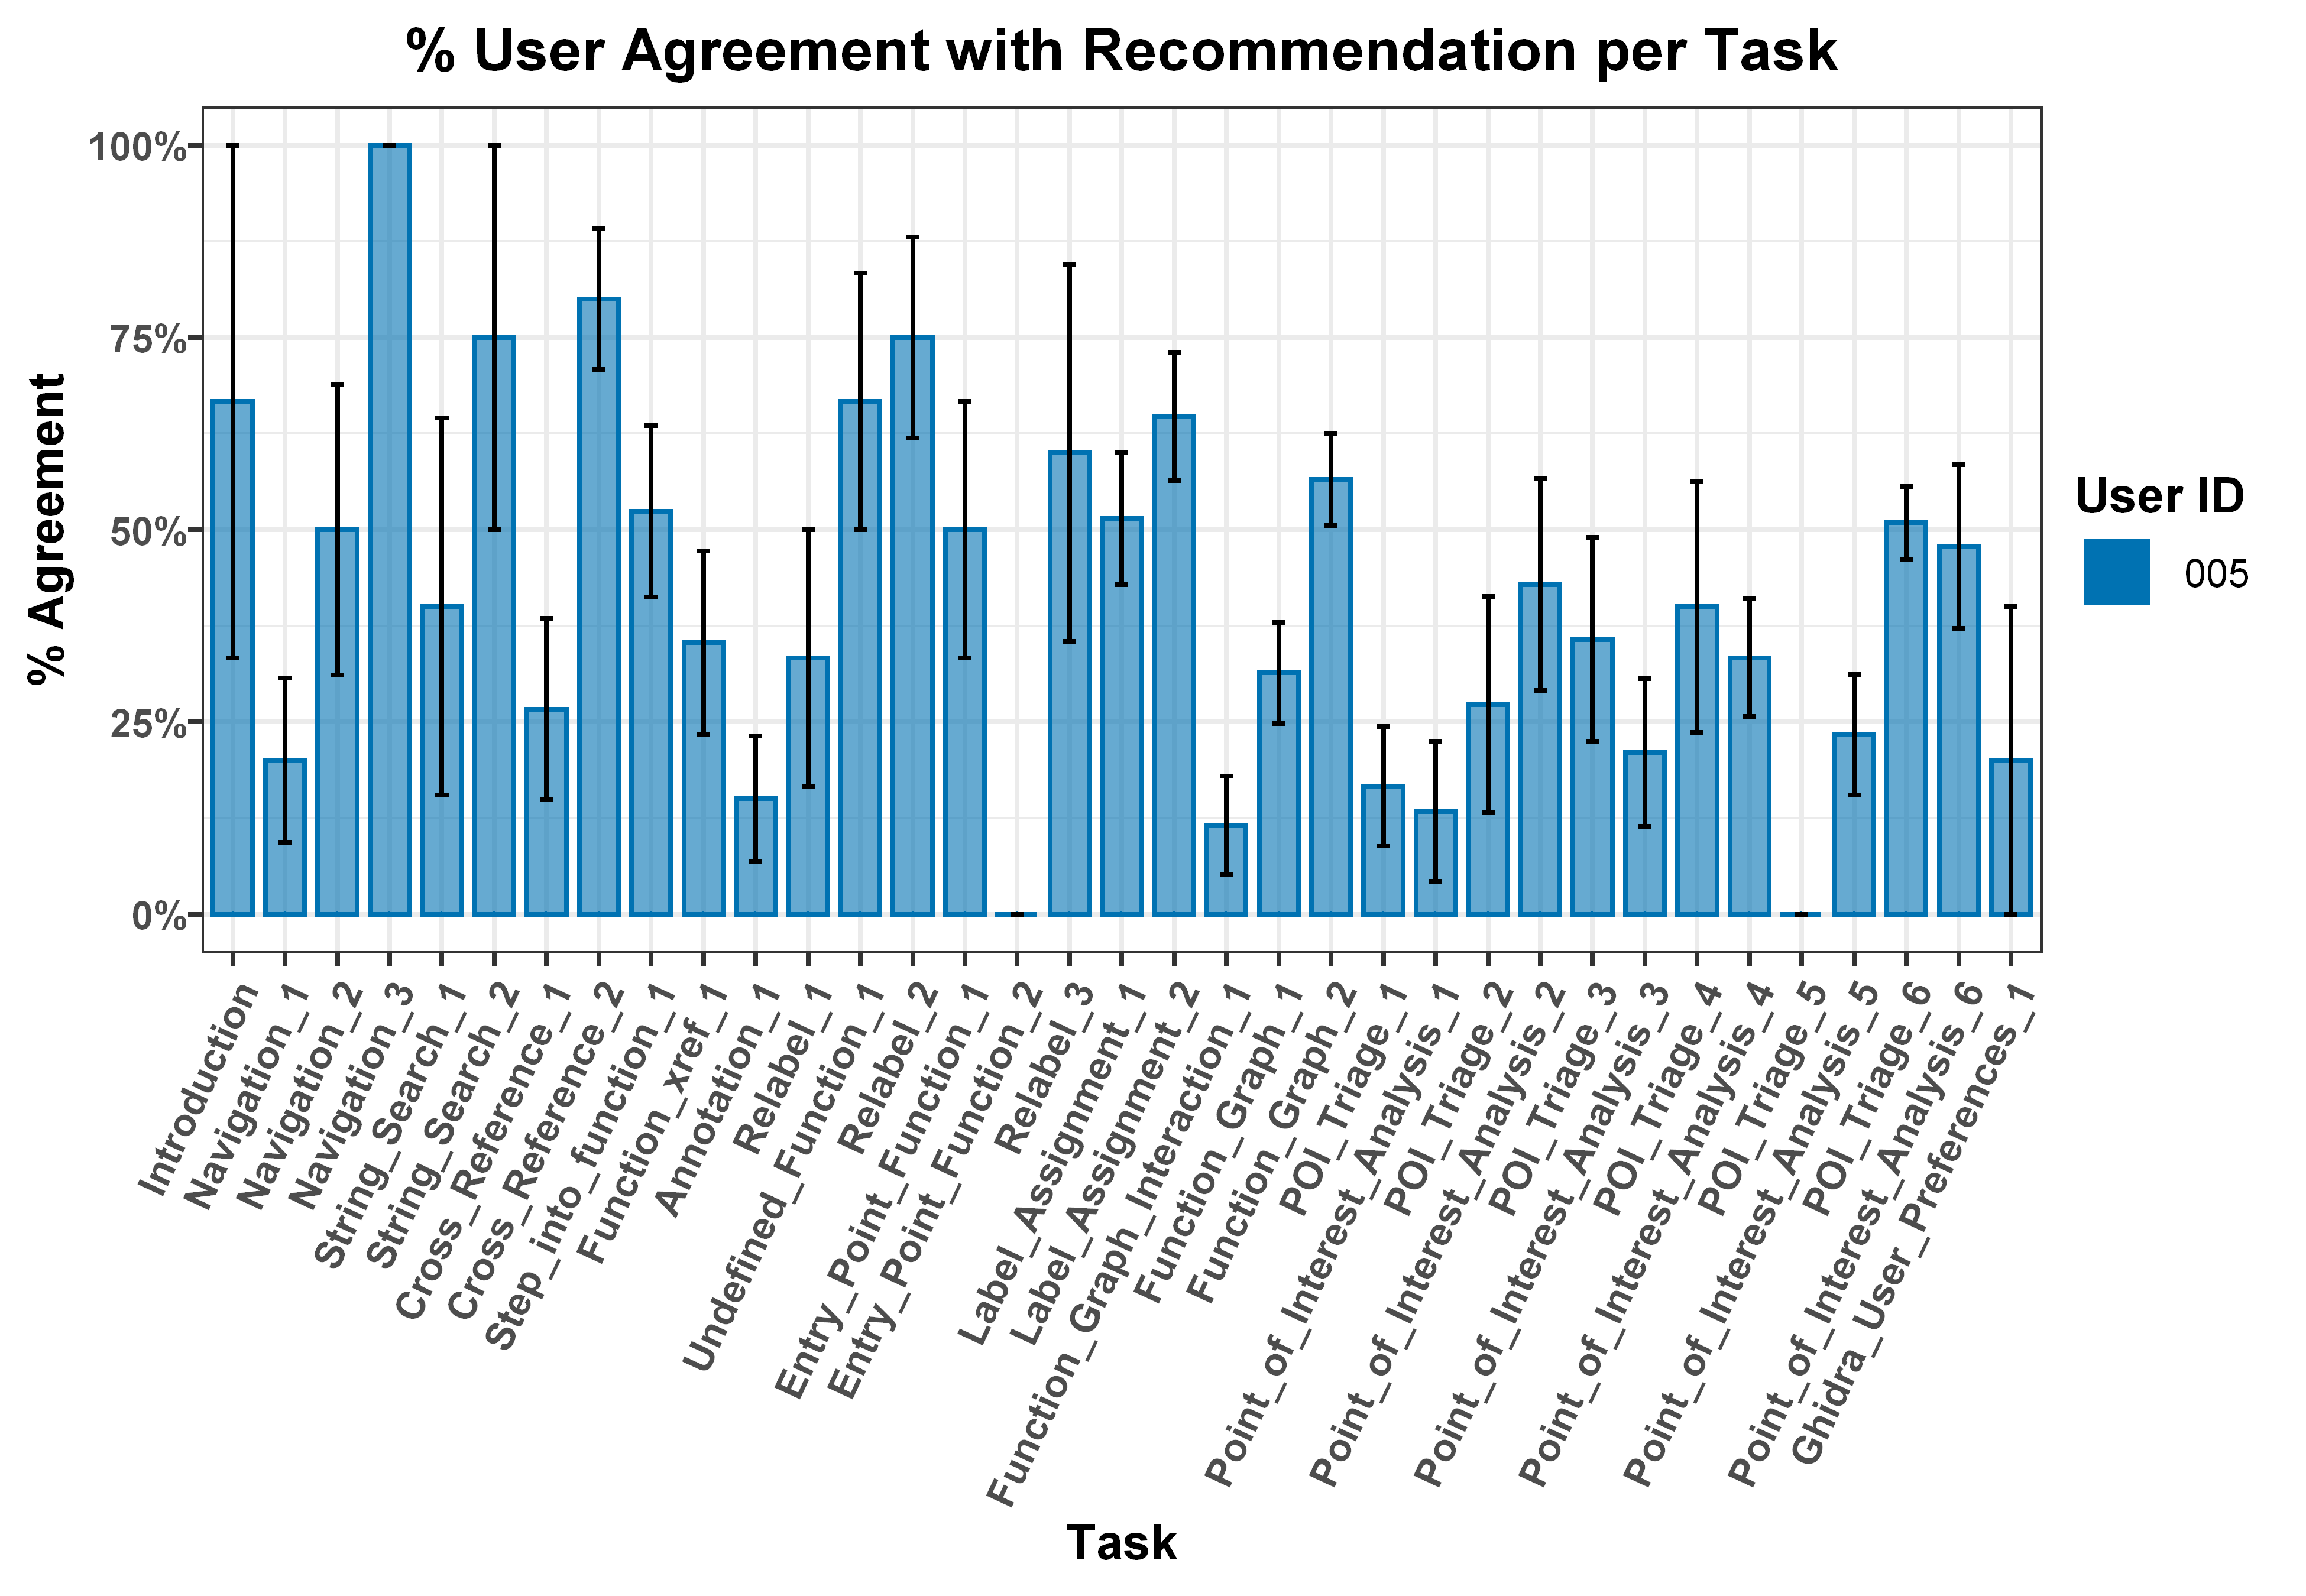

In [244]:
## Mean agreement per task (w/expert initialization)
options(repr.plot.width=6.5, repr.plot.height=4.5, repr.plot.res=600)

data <- summaryBy(Match_Any ~ UserID + Task, data=model_data_005, keep.names=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
data$Match_Any.se <- data$Match_Any.sd / sqrt(data$Match_Any.length)
data$Task <- factor(data$Task, levels = data$Task)
#levels(data$Task)
data$Task <- revalue(data$Task, c(Point_of_Interest_Triage_1="POI_Triage_1", Proof_of_Vulnerability_Analysis_1="POI_Analysis_1",
                                  Point_of_Interest_Triage_2="POI_Triage_2", Proof_of_Vulnerability_Analysis_2="POI_Analysis_2",
                                  Point_of_Interest_Triage_3="POI_Triage_3", Proof_of_Vulnerability_Analysis_3="POI_Analysis_3",
                                  Point_of_Interest_Triage_4="POI_Triage_4", Proof_of_Vulnerability_Analysis_4="POI_Analysis_4",
                                  Point_of_Interest_Triage_5="POI_Triage_5", Proof_of_Vulnerability_Analysis_5="POI_Analysis_5",
                                  Point_of_Interest_Triage_6="POI_Triage_6", Proof_of_Vulnerability_Analysis_6="POI_Analysis_6"))

agg_005 <- ggplot(data = data, aes(x=Task, y=Match_Any.mean, group=UserID, color=UserID, fill=UserID)) + labs(fill="User ID",color="User ID") +
            geom_col(position=position_dodge(), width = 0.75, show.legend=FALSE) +
            geom_point(aes(y=0,color=UserID), size=0) +
            geom_errorbar(aes(ymin = Match_Any.mean - Match_Any.se, ymax = Match_Any.mean + Match_Any.se), colour="black", size=.50, width=.25) +
            scale_fill_manual(values=alpha(c("#0072B2"),0.6)) +
            scale_color_manual(values=c("#0072B2")) +
            guides(color = guide_legend(override.aes = list(shape=15,size = 6))) +
            ylab("% Agreement") + xlab("Task") + #ylim(0.0,1.0) + #coord_fixed(1.2) +
            scale_y_continuous(limits=c(0.0,1.0), labels = scales::percent) +
            theme_bw() + ggtitle("% User Agreement with Recommendation per Task") + 
            theme(text = element_text(size=10, face="bold"),
                  axis.title.x = element_text(margin = margin(t=2)),
                  axis.title.y = element_text(margin = margin(t=0)),
                  axis.text.x = element_text(size=8, angle = 65, vjust = 1.0, hjust=1), 
                  axis.text.y = element_text(size=8, margin = margin(l=3)),
                  legend.text = element_text(size=8, face="plain"),
                  legend.spacing.y = unit(0.075, 'cm'),
                  legend.box.margin=margin(-5,0,-10,-10),
                  plot.title = element_text(size=12, hjust = 0.5))
agg_005

Warning message:
"Removed 554 row(s) containing missing values (geom_path)."


r_Past_rolled r_Past_interp r_Future_rolled r_Future_interp
1 0.1638751     0.1887928     -0.2818         -0.1946746

Warning message:
"Removed 1108 row(s) containing missing values (geom_path)."


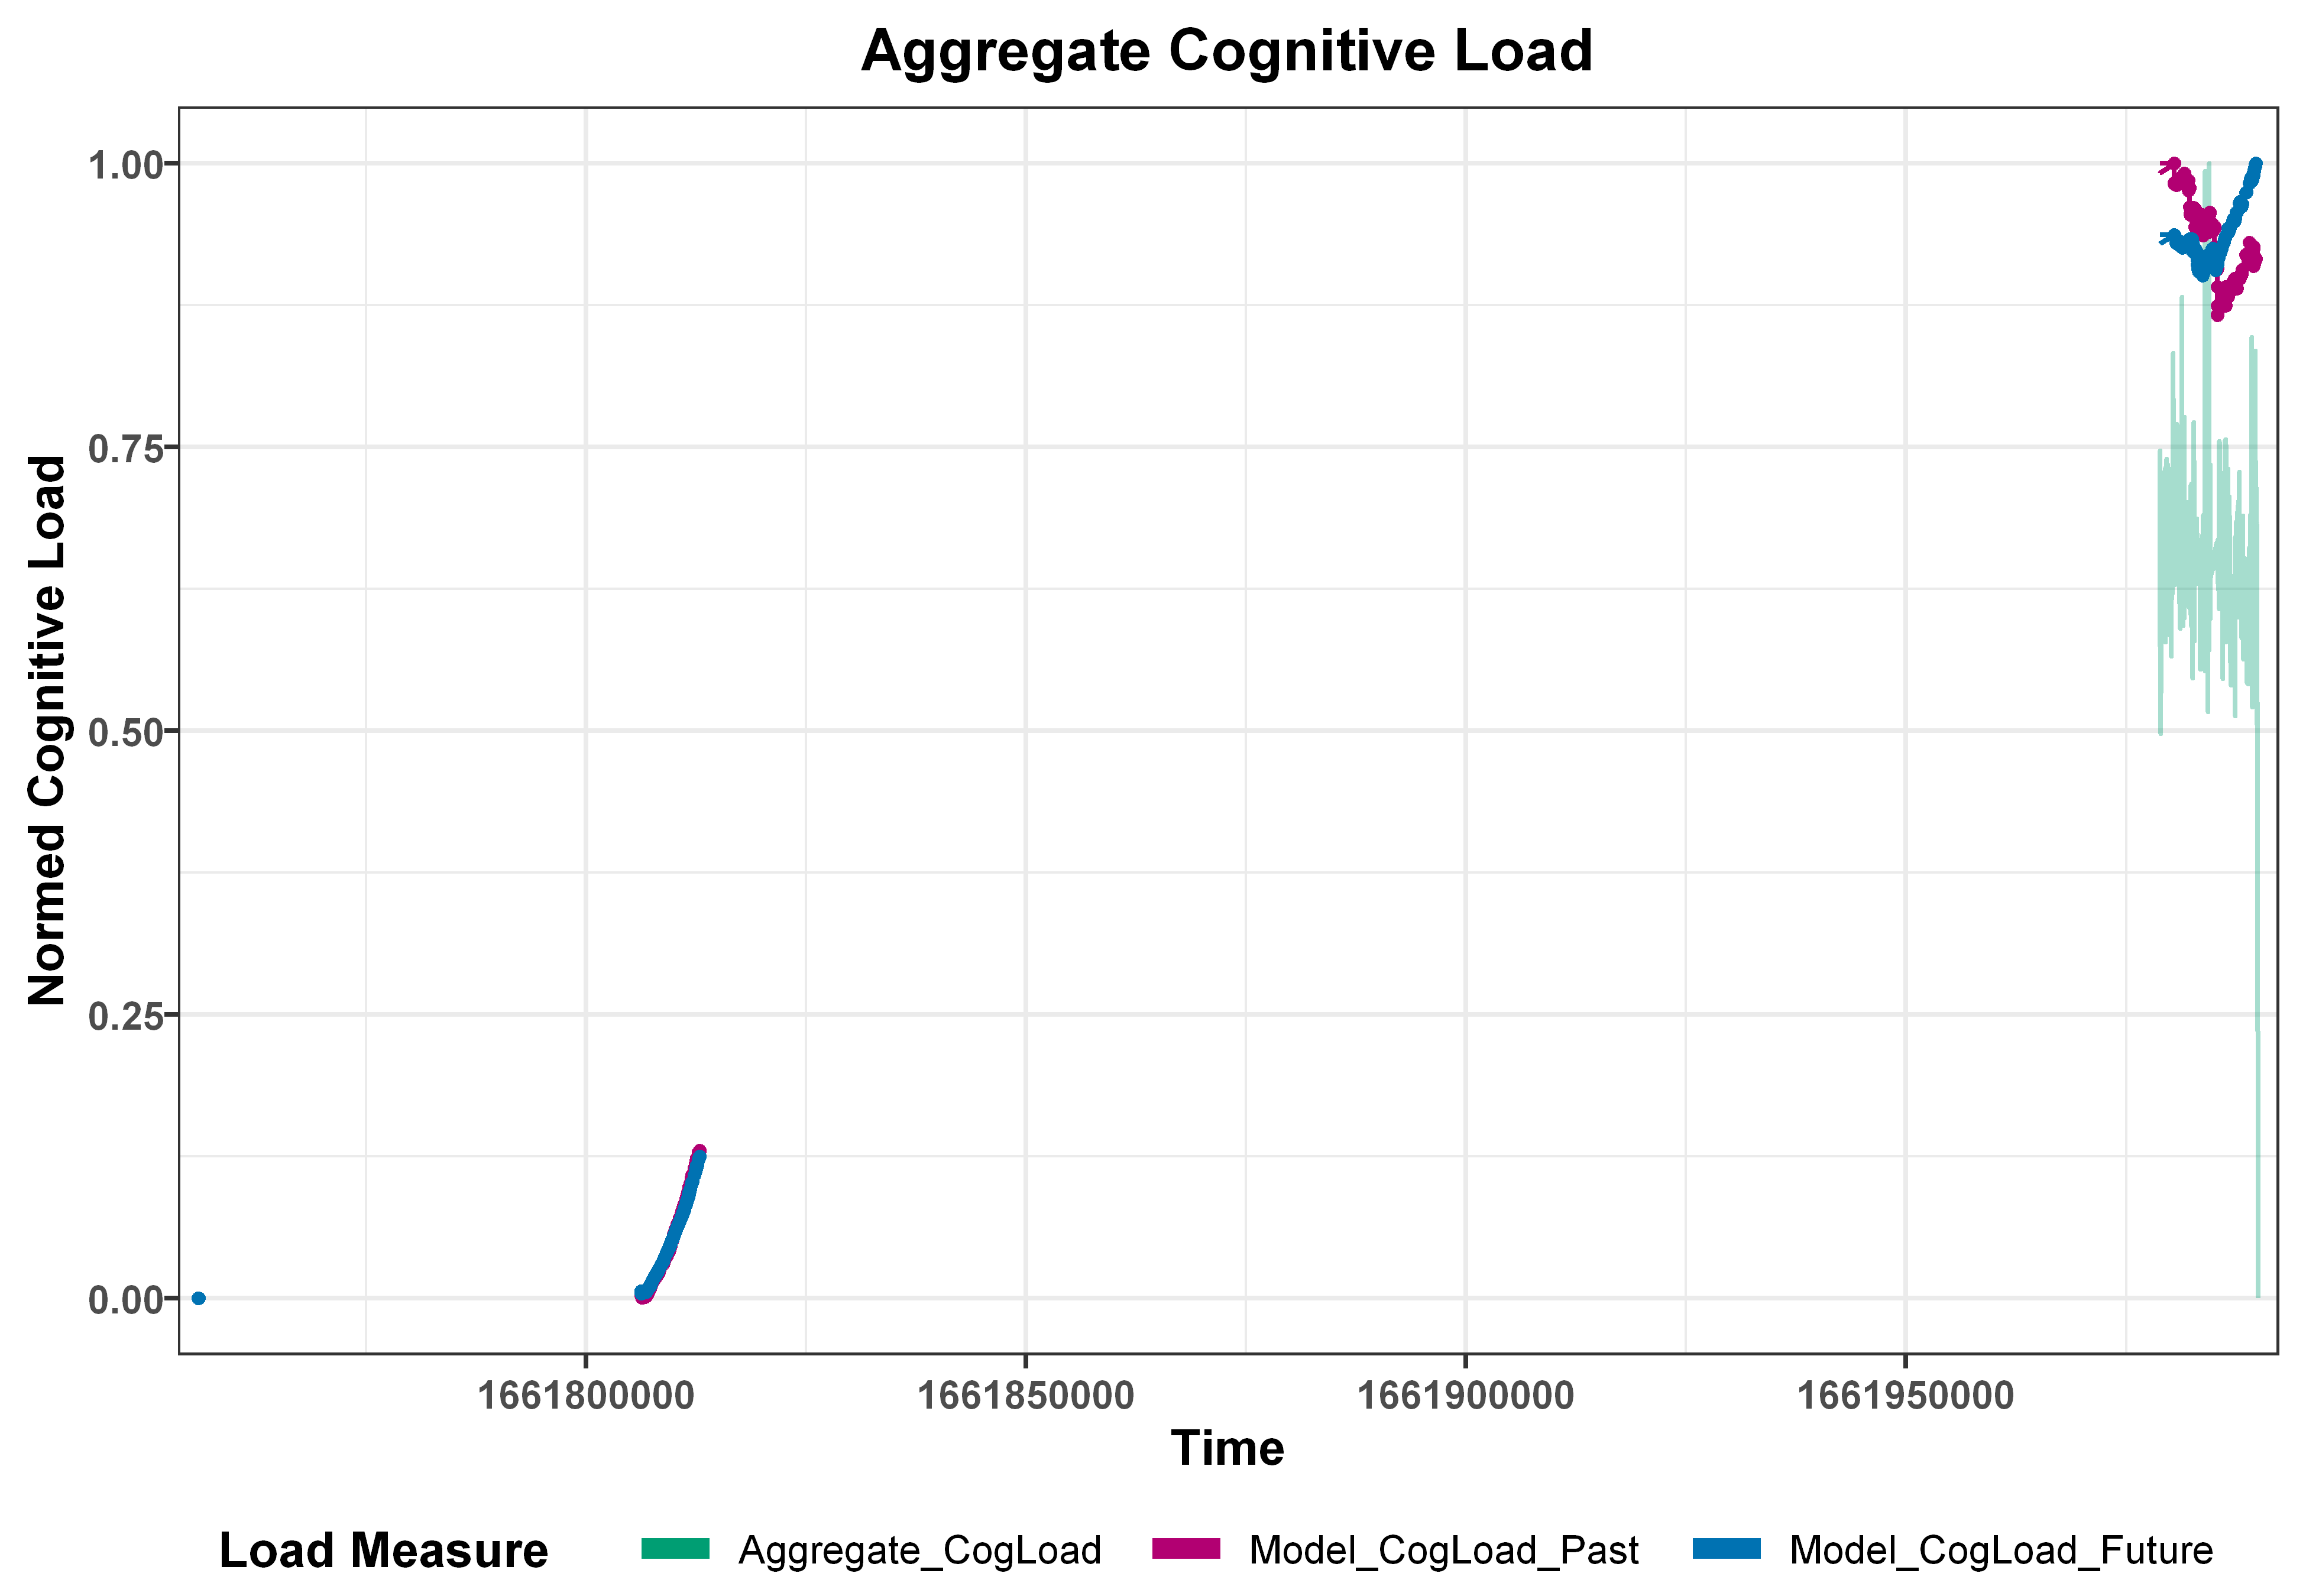

TaskLoad_r_Past_rolled TaskLoad_r_Past_interp TaskLoad_r_Future_rolled
1 -0.1405906             -0.1450875             0.05070211              
  TaskLoad_r_Future_interp Engagement_r_Past_rolled Engagement_r_Past_interp
1 0.06454184               0.05061918               0.05292092              
  Engagement_r_Future_rolled Engagement_r_Future_interp
1 -0.06719467                -0.06077564

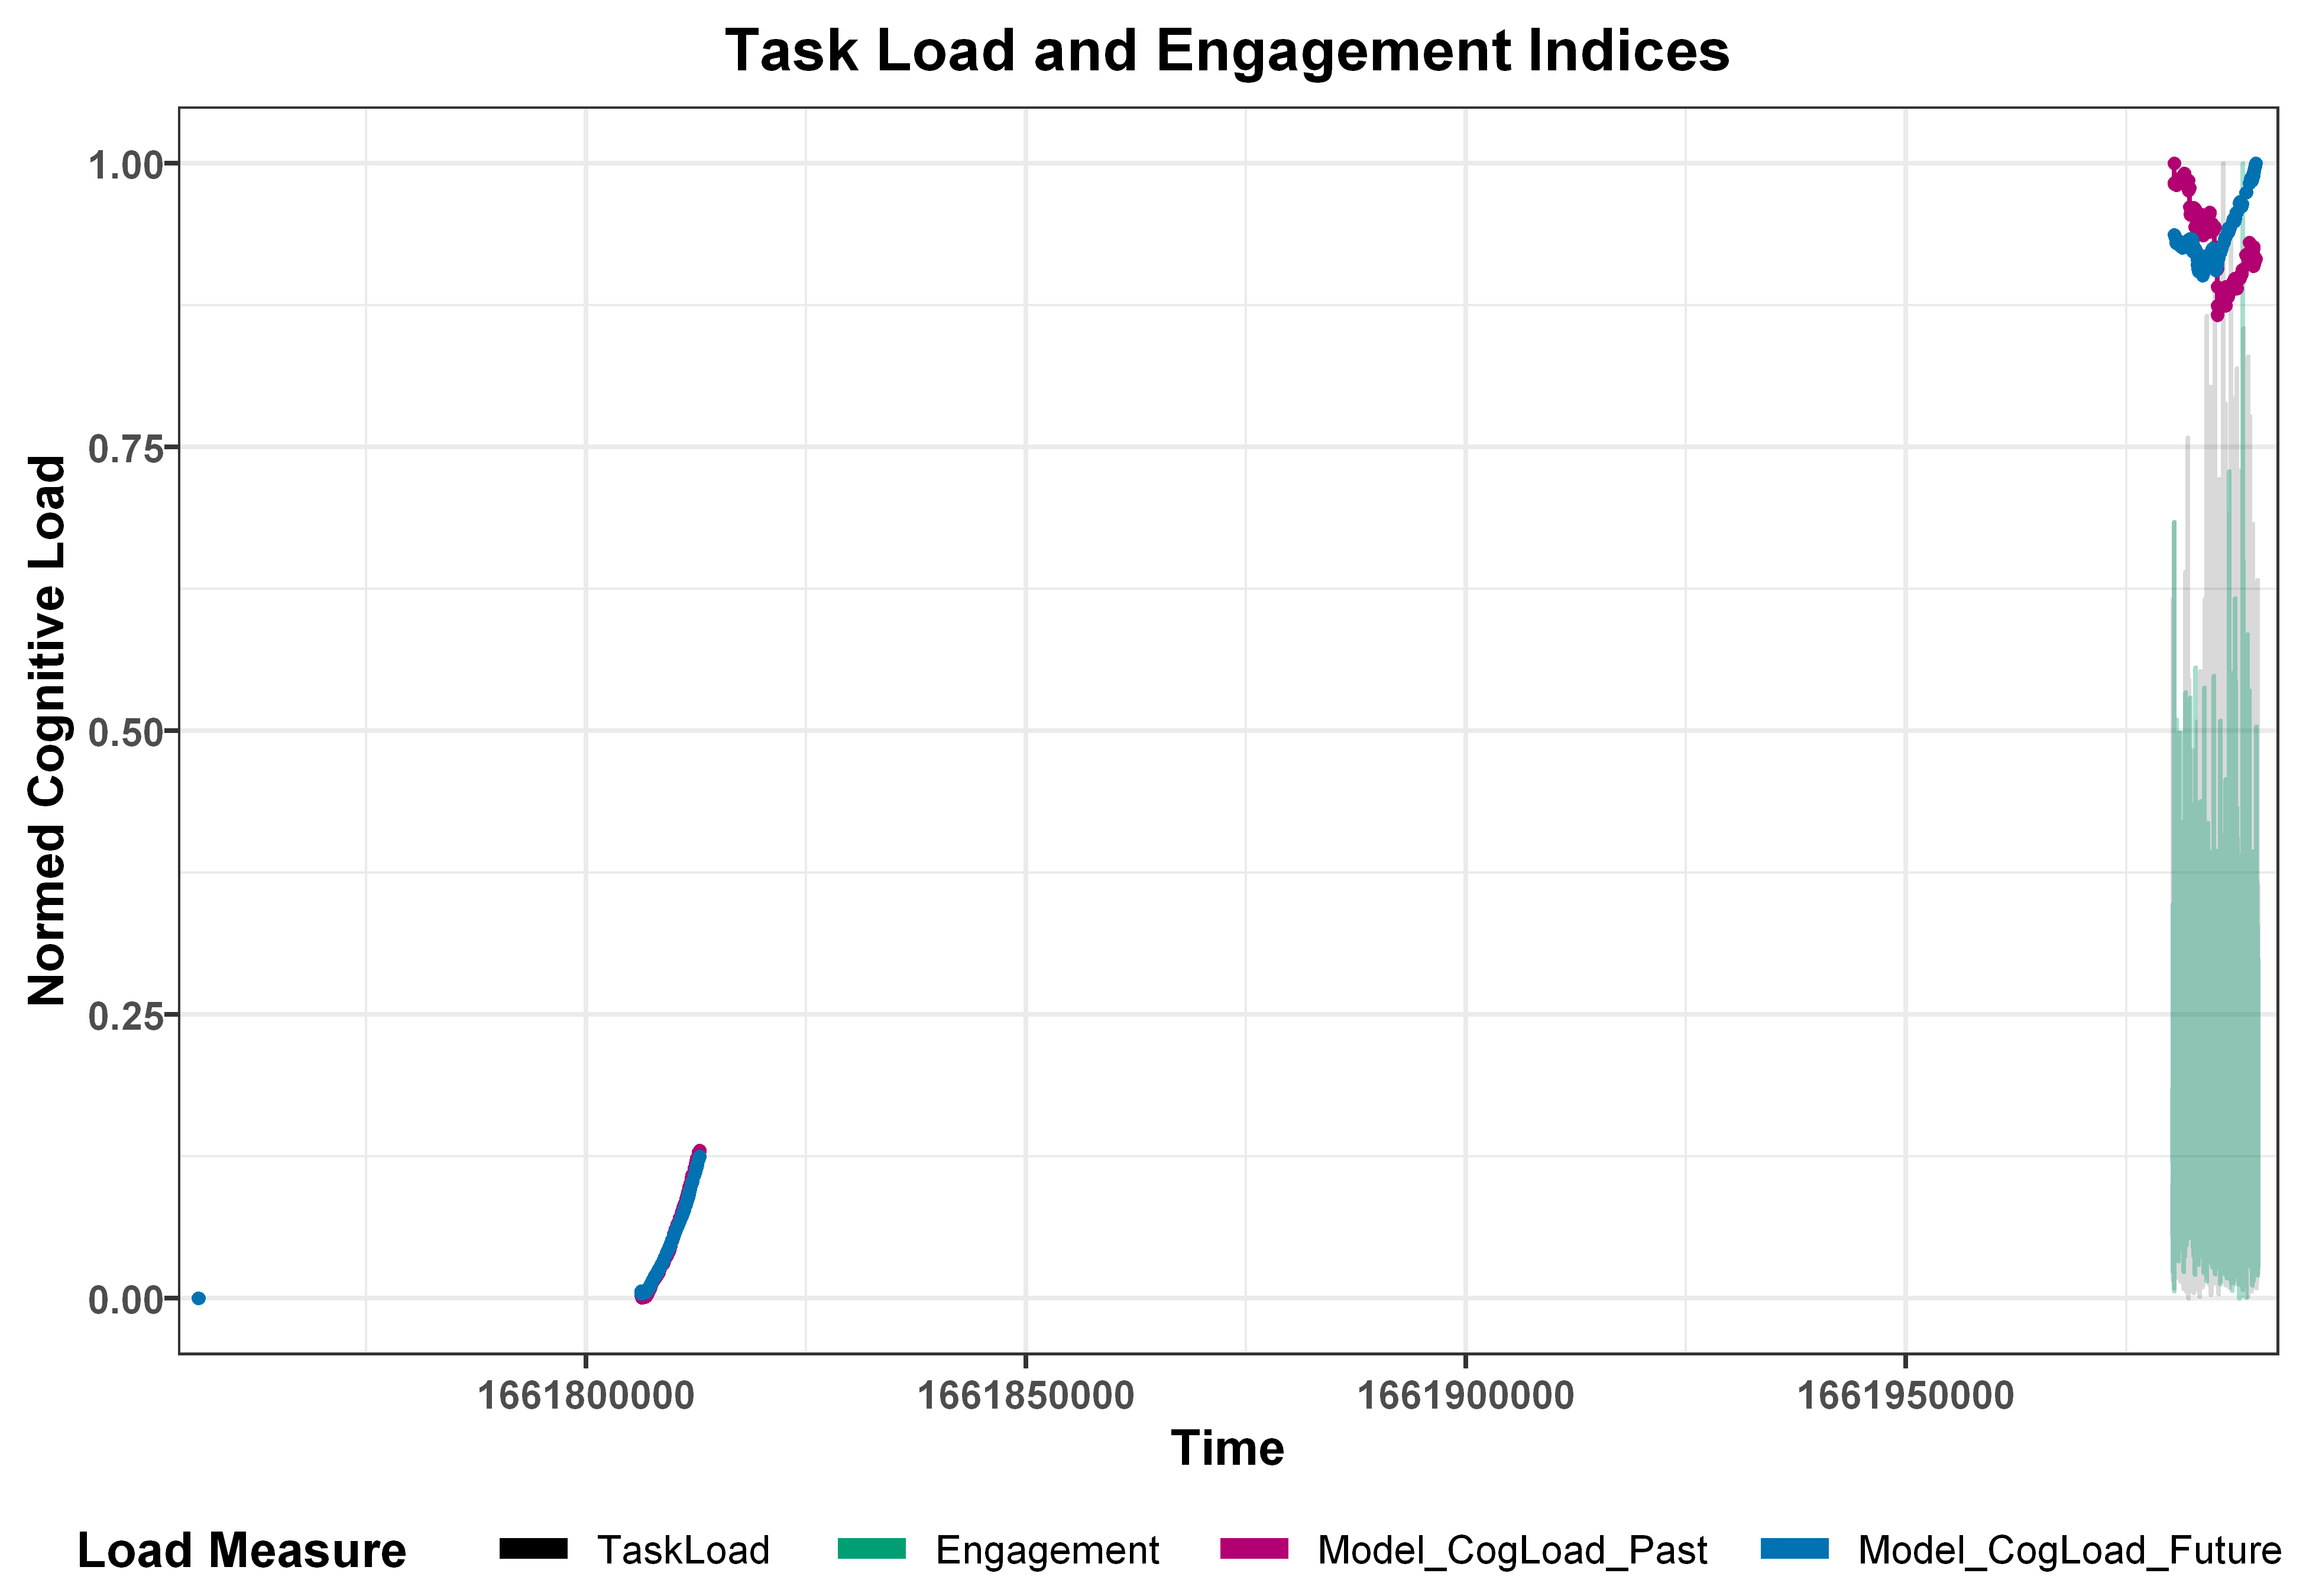

In [245]:
## Cognitive Load Correlations
model_data <- summaryBy(Past_CogLoad + Future_CogLoad ~ UserID + Time, data=model_data_005, keep.names=TRUE, order=FALSE)
model_data$Past_CogLoad_normed = (model_data$Past_CogLoad-min(model_data$Past_CogLoad))/(max(model_data$Past_CogLoad)-min(model_data$Past_CogLoad))
model_data$Future_CogLoad_normed = (model_data$Future_CogLoad-min(model_data$Future_CogLoad))/(max(model_data$Future_CogLoad)-min(model_data$Future_CogLoad))
model_data <- summaryBy(Past_CogLoad_normed + Future_CogLoad_normed ~ UserID + Time, data=model_data, keep.names=TRUE, order=FALSE)
#head(model_data)

cogload_data <- summaryBy(Agg_cogLoad ~ UserID + Time, data=cogload_data_005, keep.names=TRUE, order=FALSE)
cogload_data$Agg_cogLoad_normed = (cogload_data$Agg_cogLoad-min(cogload_data$Agg_cogLoad))/(max(cogload_data$Agg_cogLoad)-min(cogload_data$Agg_cogLoad))
cogload_data <- summaryBy(Agg_cogLoad_normed ~ UserID + Time, data=cogload_data, keep.names=TRUE, order=FALSE)
#head(cogload_data)

eng_taskload_data <- summaryBy(TaskLoad + Engagement ~ UserID + Time, data=eng_taskload_data_005, keep.names=TRUE, order=FALSE)
eng_taskload_data$Engagement[eng_taskload_data$Engagement>13] = 0
#summary(eng_taskload_data$Engagement)
eng_taskload_data$TaskLoad_normed = (eng_taskload_data$TaskLoad-min(eng_taskload_data$TaskLoad))/(max(eng_taskload_data$TaskLoad)-min(eng_taskload_data$TaskLoad))
eng_taskload_data$Engagement_normed = (eng_taskload_data$Engagement-min(eng_taskload_data$Engagement))/(max(eng_taskload_data$Engagement)-min(eng_taskload_data$Engagement))
eng_taskload_data <- summaryBy(TaskLoad_normed + Engagement_normed ~ UserID + Time, data=eng_taskload_data, keep.names=TRUE, order=FALSE)
#head(eng_taskload_data)

setDT(model_data)
setDT(cogload_data)
setDT(eng_taskload_data)

setkey(model_data, UserID, Time)
setkey(cogload_data, UserID, Time)
setkey(eng_taskload_data, UserID, Time)

###Aggregate Cognitive Load
rawdata = model_data[cogload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

rawdata$Future_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Future_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past",
                        ifelse(data$variable=="Future_CogLoad_normed"|data$variable=="Future_CogLoadInterp","Model_CogLoad_Future",
                               "Aggregate_CogLoad"))
data$type <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Future_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp"|data$variable=="Future_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("Aggregate_CogLoad", "Model_CogLoad_Past","Model_CogLoad_Future"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)

load_005 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                geom_point(data=model_data, aes(Time, Future_CogLoad_normed), colour="#0072B2", size = 0.75) +
                scale_color_manual(values=c("#009E73","#B20072","#0072B2")) +
                scale_alpha_manual(values=c(0.35,1.0,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Aggregate Cognitive Load") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-10),
                      plot.title = element_text(size=12, hjust = 0.5))
load_005

rawdata %>% group_by(UserID) %>%
  summarise(r_Past_rolled = cor(Agg_cogLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
            r_Past_interp = cor(Agg_cogLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
            r_Future_rolled = cor(Agg_cogLoad_normed, Future_CogLoad_normed, use="pairwise.complete.obs"),
            r_Future_interp = cor(Agg_cogLoad_normed, Future_CogLoadInterp, use="pairwise.complete.obs"))


###Task Load Index
rawdata = model_data[eng_taskload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

rawdata$Future_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Future_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past",
                        ifelse(data$variable=="Future_CogLoad_normed"|data$variable=="Future_CogLoadInterp","Model_CogLoad_Future",
                               ifelse(data$variable=="TaskLoad_normed","TaskLoad","Engagement")))
data$type <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Future_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp"|data$variable=="Future_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("TaskLoad","Engagement","Model_CogLoad_Past","Model_CogLoad_Future"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)

eng_005 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                geom_point(data=model_data, aes(Time, Future_CogLoad_normed), colour="#0072B2", size = 0.75) +
                scale_color_manual(values=c("black","#009E73","#B20072","#0072B2")) +
                scale_alpha_manual(values=c(0.15,0.35,1.0,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Task Load and Engagement Indices") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-25),
                      plot.title = element_text(size=12, hjust = 0.5))
eng_005

rawdata %>% group_by(UserID) %>%
  summarise(TaskLoad_r_Past_rolled = cor(TaskLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
            TaskLoad_r_Past_interp = cor(TaskLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
            TaskLoad_r_Future_rolled = cor(TaskLoad_normed, Future_CogLoad_normed, use="pairwise.complete.obs"),
            TaskLoad_r_Future_interp = cor(TaskLoad_normed, Future_CogLoadInterp, use="pairwise.complete.obs"),
            Engagement_r_Past_rolled = cor(Engagement_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
            Engagement_r_Past_interp = cor(Engagement_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
            Engagement_r_Future_rolled = cor(Engagement_normed, Future_CogLoad_normed, use="pairwise.complete.obs"),
            Engagement_r_Future_interp = cor(Engagement_normed, Future_CogLoadInterp, use="pairwise.complete.obs"))


# Subject 006

The following `from` values were not present in `x`: Proof_of_Vulnerability_Analysis_1, Proof_of_Vulnerability_Analysis_2, Proof_of_Vulnerability_Analysis_3, Proof_of_Vulnerability_Analysis_4, Proof_of_Vulnerability_Analysis_5, Proof_of_Vulnerability_Analysis_6



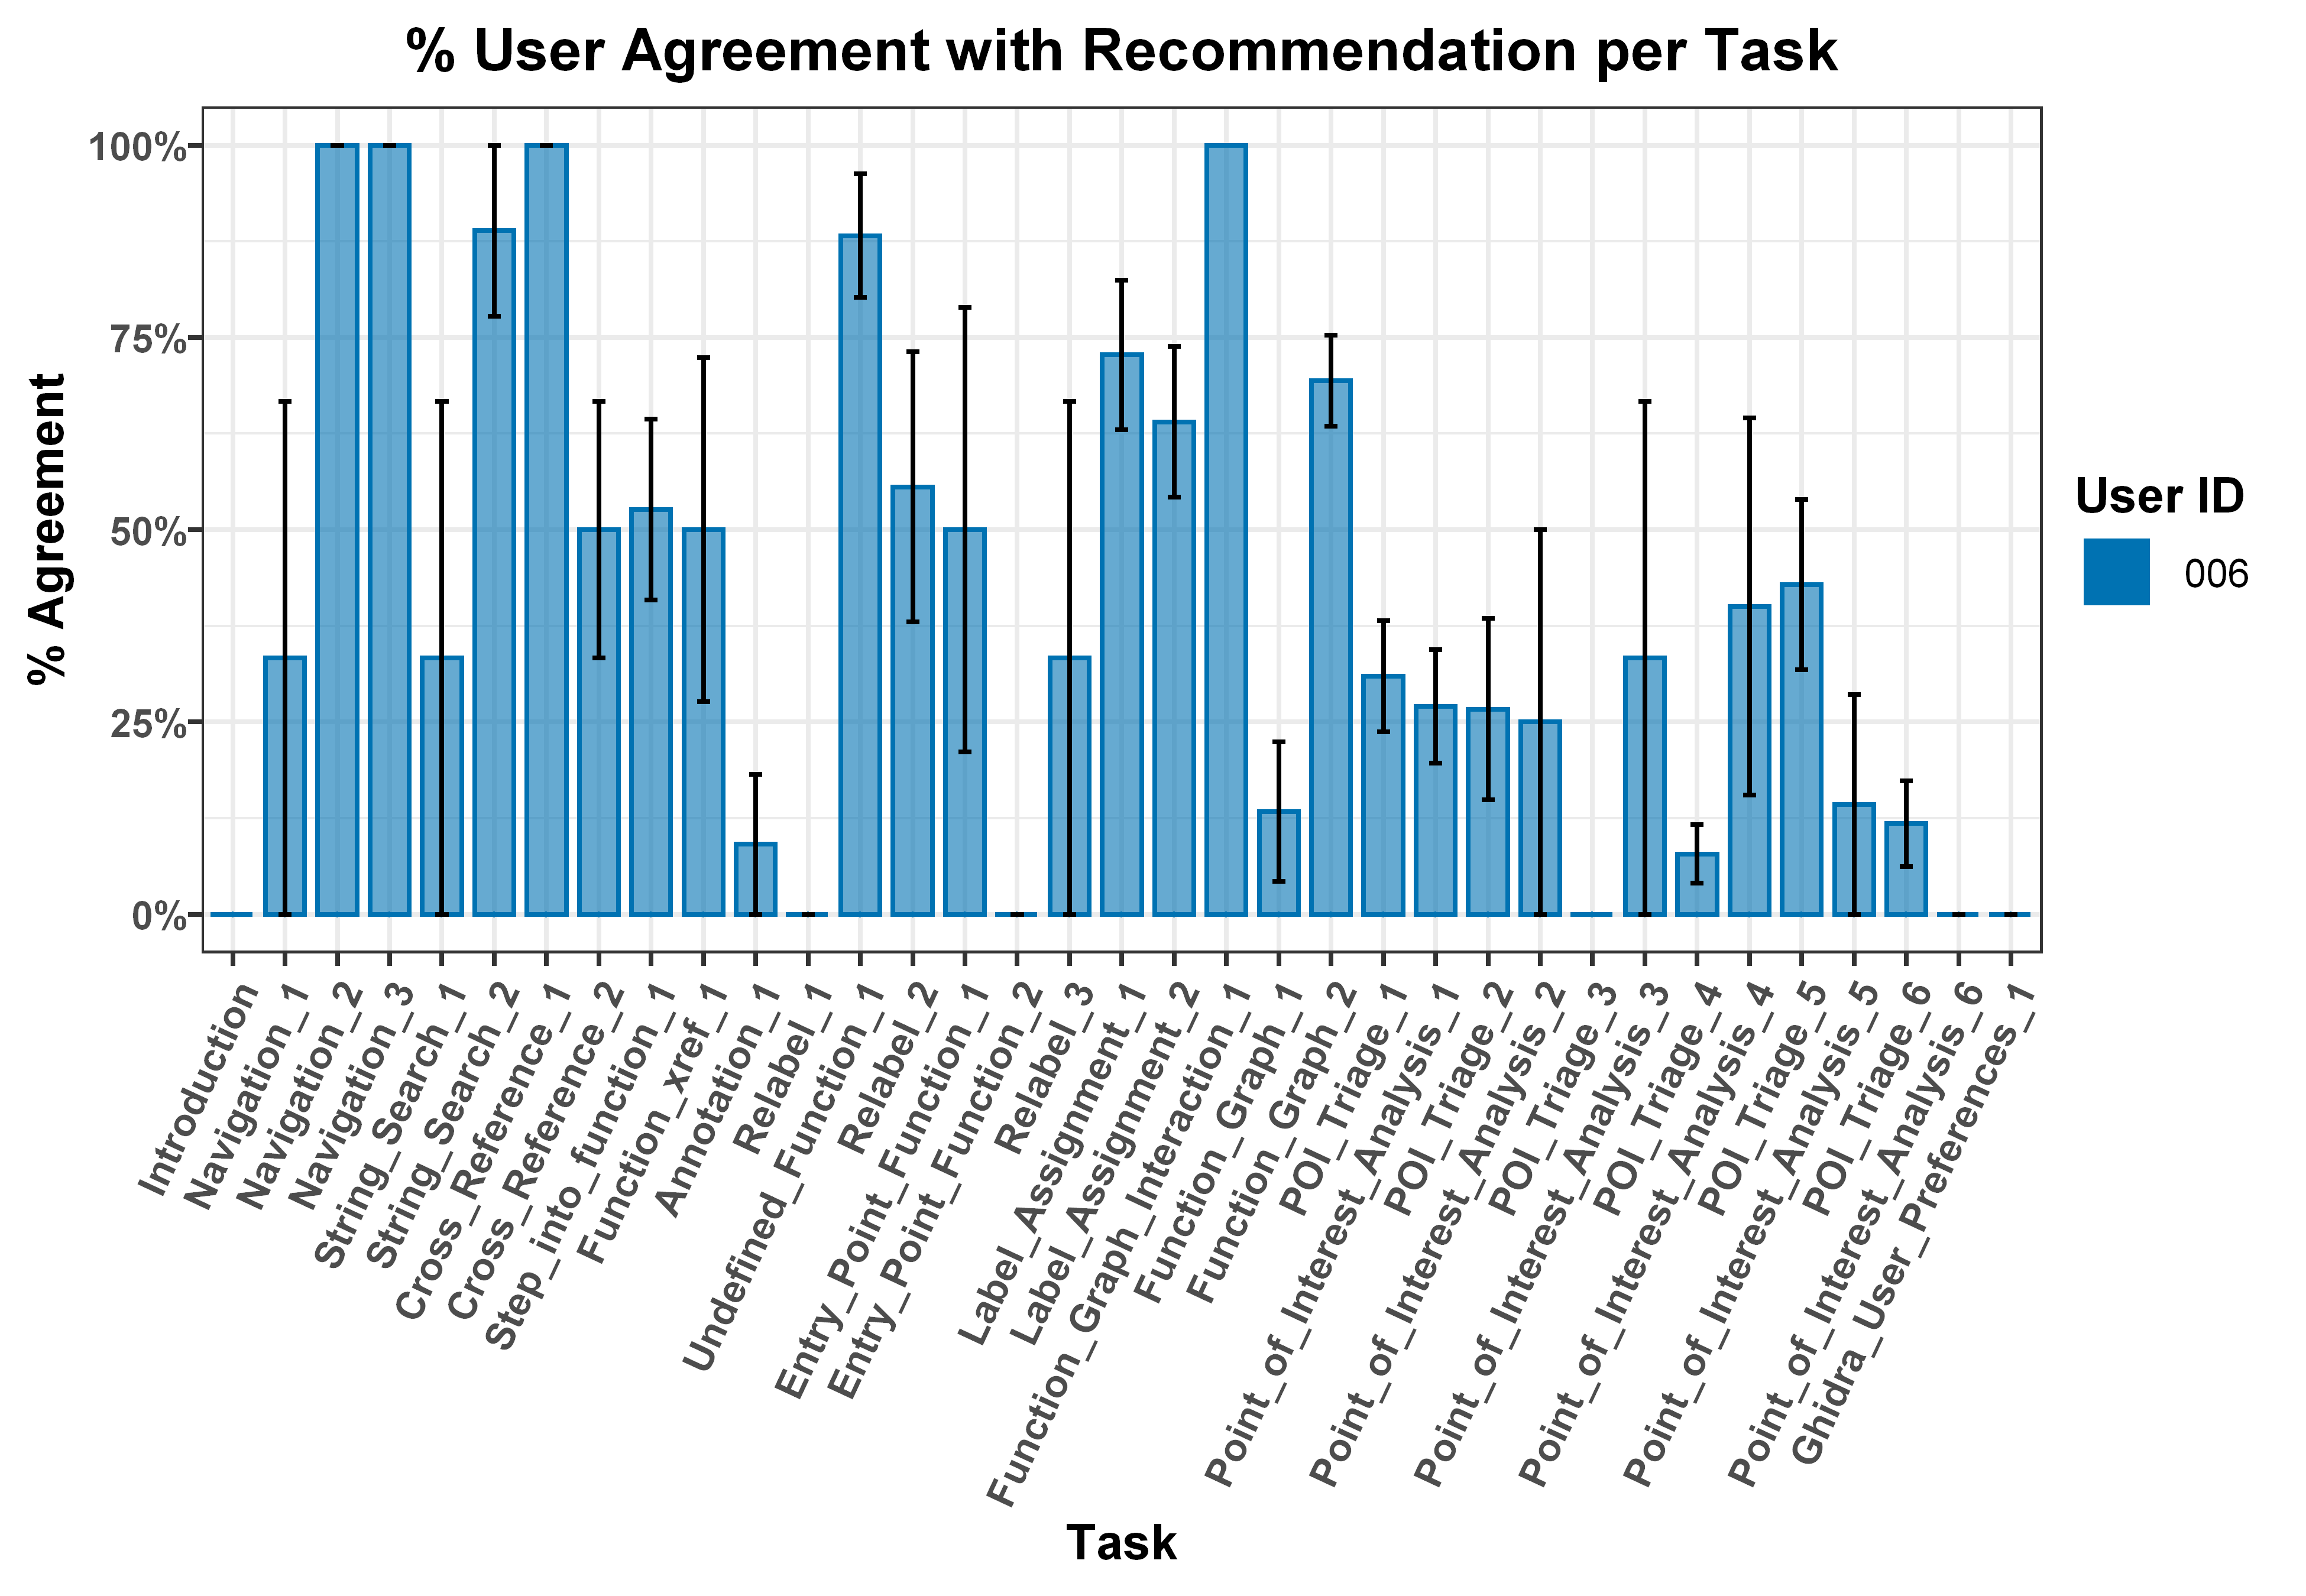

In [246]:
## Mean agreement per task (w/expert initialization)
options(repr.plot.width=6.5, repr.plot.height=4.5, repr.plot.res=600)

data <- summaryBy(Match_Any ~ UserID + Task, data=model_data_006, keep.names=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
data$Match_Any.se <- data$Match_Any.sd / sqrt(data$Match_Any.length)
data$Task <- factor(data$Task, levels = data$Task)
#levels(data$Task)
data$Task <- revalue(data$Task, c(Point_of_Interest_Triage_1="POI_Triage_1", Proof_of_Vulnerability_Analysis_1="POI_Analysis_1",
                                  Point_of_Interest_Triage_2="POI_Triage_2", Proof_of_Vulnerability_Analysis_2="POI_Analysis_2",
                                  Point_of_Interest_Triage_3="POI_Triage_3", Proof_of_Vulnerability_Analysis_3="POI_Analysis_3",
                                  Point_of_Interest_Triage_4="POI_Triage_4", Proof_of_Vulnerability_Analysis_4="POI_Analysis_4",
                                  Point_of_Interest_Triage_5="POI_Triage_5", Proof_of_Vulnerability_Analysis_5="POI_Analysis_5",
                                  Point_of_Interest_Triage_6="POI_Triage_6", Proof_of_Vulnerability_Analysis_6="POI_Analysis_6"))

agg_006 <- ggplot(data = data, aes(x=Task, y=Match_Any.mean, group=UserID, color=UserID, fill=UserID)) + labs(fill="User ID",color="User ID") +
            geom_col(position=position_dodge(), width = 0.75, show.legend=FALSE) +
            geom_point(aes(y=0,color=UserID), size=0) +
            geom_errorbar(aes(ymin = Match_Any.mean - Match_Any.se, ymax = Match_Any.mean + Match_Any.se), colour="black", size=.50, width=.25) +
            scale_fill_manual(values=alpha(c("#0072B2"),0.6)) +
            scale_color_manual(values=c("#0072B2")) +
            guides(color = guide_legend(override.aes = list(shape=15,size = 6))) +
            ylab("% Agreement") + xlab("Task") + #ylim(0.0,1.0) + #coord_fixed(1.2) +
            scale_y_continuous(limits=c(0.0,1.0), labels = scales::percent) +
            theme_bw() + ggtitle("% User Agreement with Recommendation per Task") + 
            theme(text = element_text(size=10, face="bold"),
                  axis.title.x = element_text(margin = margin(t=2)),
                  axis.title.y = element_text(margin = margin(t=0)),
                  axis.text.x = element_text(size=8, angle = 65, vjust = 1.0, hjust=1), 
                  axis.text.y = element_text(size=8, margin = margin(l=3)),
                  legend.text = element_text(size=8, face="plain"),
                  legend.spacing.y = unit(0.075, 'cm'),
                  legend.box.margin=margin(-5,0,-10,-10),
                  plot.title = element_text(size=12, hjust = 0.5))
agg_006

Warning message:
"Removed 4350 row(s) containing missing values (geom_path)."


r_Past_rolled r_Past_interp r_Future_rolled r_Future_interp
1 -0.1035411    -0.1799256    -0.1059917      -0.187959

Warning message:
"Removed 3038 row(s) containing missing values (geom_path)."


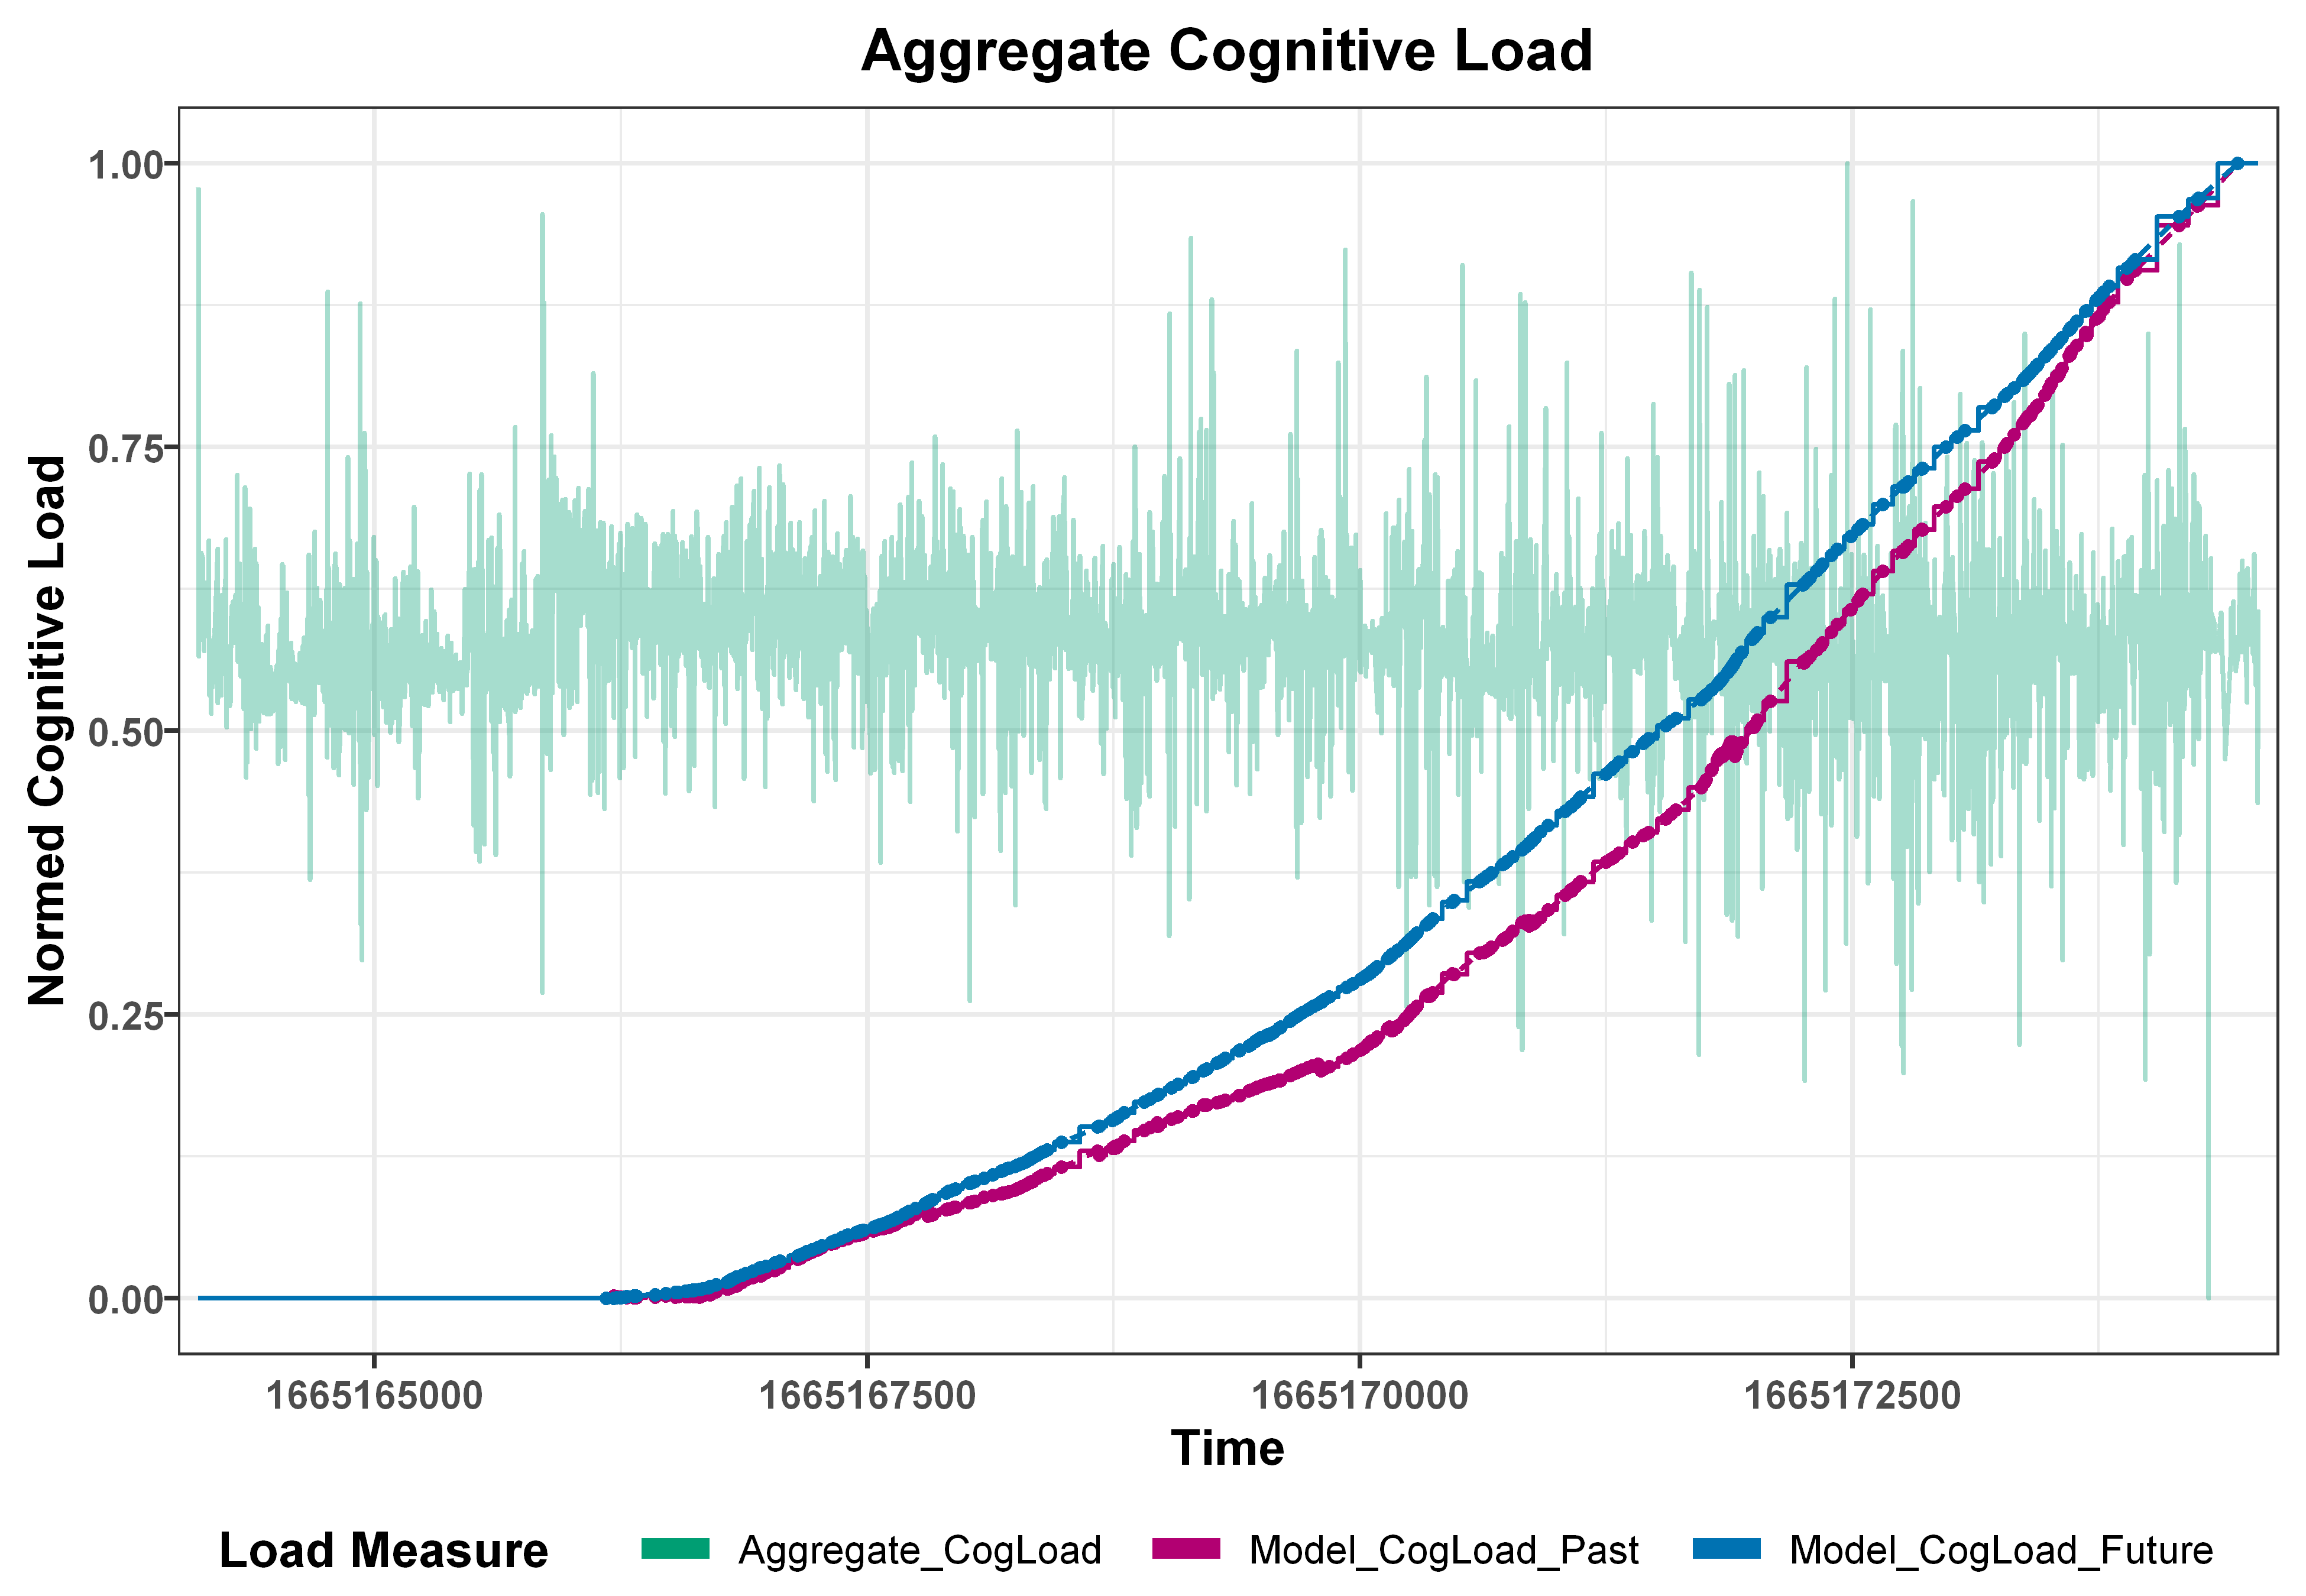

TaskLoad_r_Past_rolled TaskLoad_r_Past_interp TaskLoad_r_Future_rolled
1 0.03951114             0.0764806              0.04112253              
  TaskLoad_r_Future_interp Engagement_r_Past_rolled Engagement_r_Past_interp
1 0.07767457               -0.07867125              -0.109933               
  Engagement_r_Future_rolled Engagement_r_Future_interp
1 -0.07992045                -0.1117812

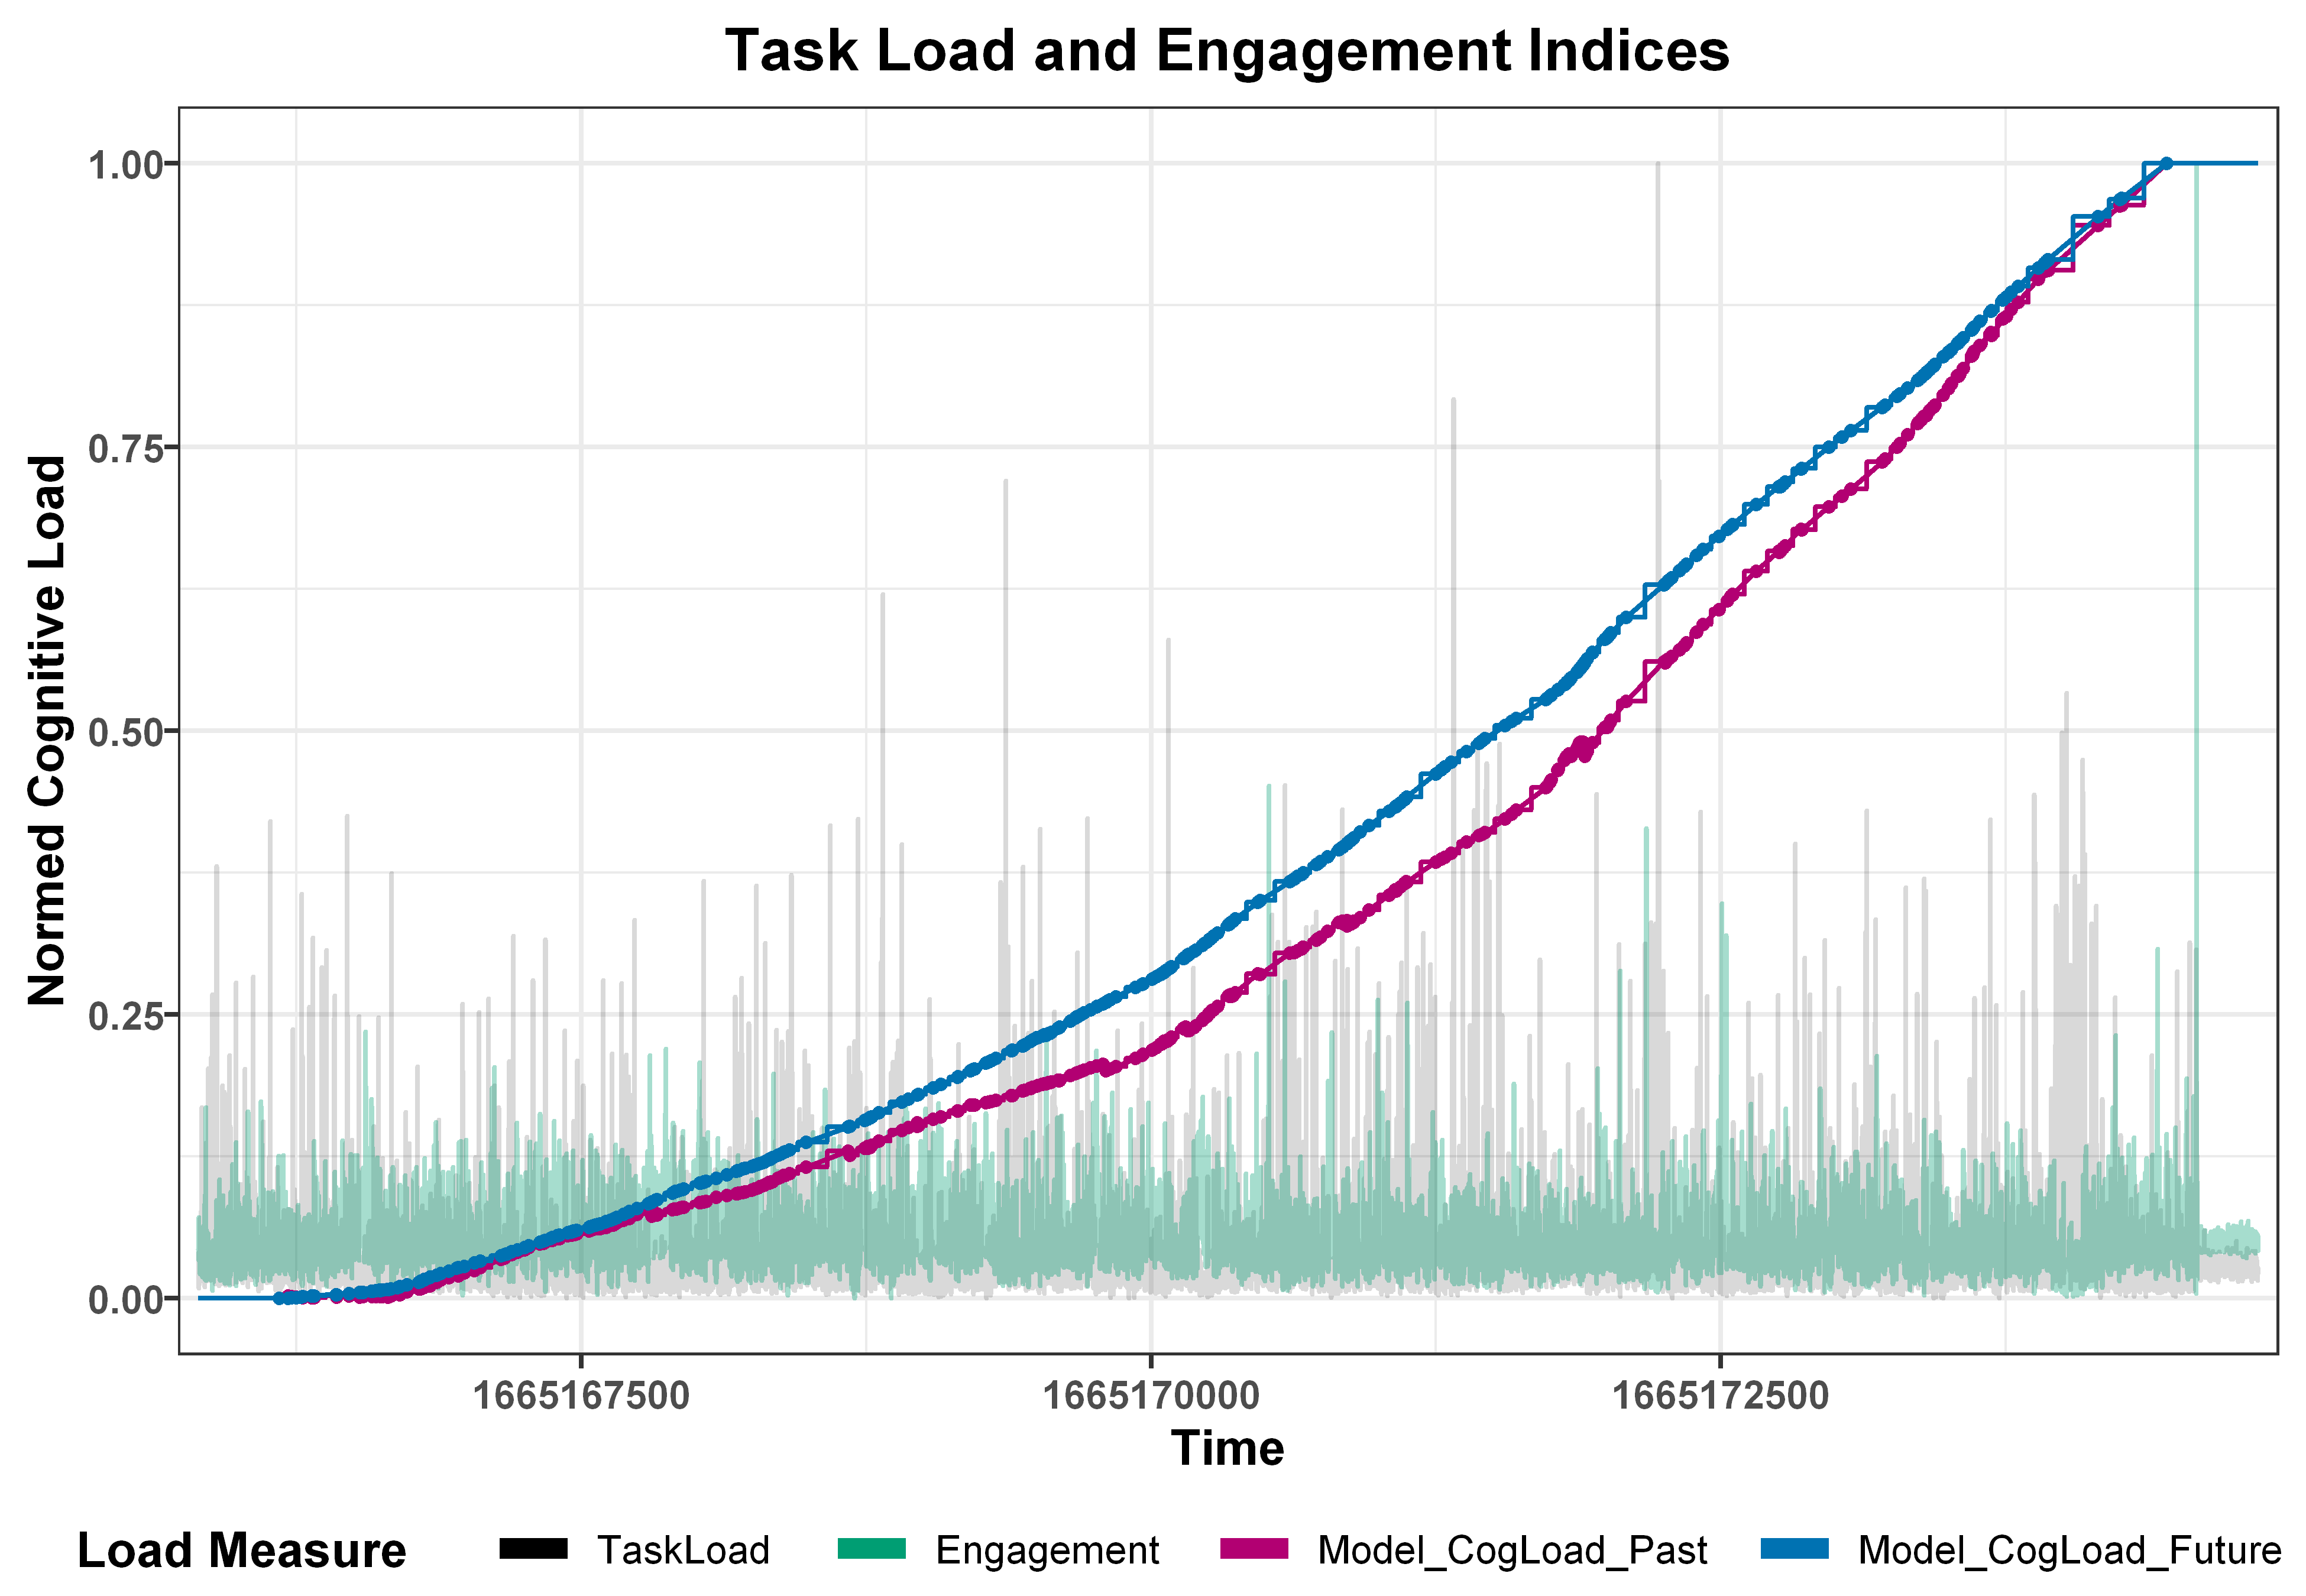

In [247]:
## Cognitive Load Correlations
model_data <- summaryBy(Past_CogLoad + Future_CogLoad ~ UserID + Time, data=model_data_006, keep.names=TRUE, order=FALSE)
model_data$Past_CogLoad_normed = (model_data$Past_CogLoad-min(model_data$Past_CogLoad))/(max(model_data$Past_CogLoad)-min(model_data$Past_CogLoad))
model_data$Future_CogLoad_normed = (model_data$Future_CogLoad-min(model_data$Future_CogLoad))/(max(model_data$Future_CogLoad)-min(model_data$Future_CogLoad))
model_data <- summaryBy(Past_CogLoad_normed + Future_CogLoad_normed ~ UserID + Time, data=model_data, keep.names=TRUE, order=FALSE)
#head(model_data)

cogload_data <- summaryBy(Agg_cogLoad ~ UserID + Time, data=cogload_data_006, keep.names=TRUE, order=FALSE)
cogload_data$Agg_cogLoad_normed = (cogload_data$Agg_cogLoad-min(cogload_data$Agg_cogLoad))/(max(cogload_data$Agg_cogLoad)-min(cogload_data$Agg_cogLoad))
cogload_data <- summaryBy(Agg_cogLoad_normed ~ UserID + Time, data=cogload_data, keep.names=TRUE, order=FALSE)
#head(cogload_data)

eng_taskload_data <- summaryBy(TaskLoad + Engagement ~ UserID + Time, data=eng_taskload_data_006, keep.names=TRUE, order=FALSE)
eng_taskload_data$Engagement[eng_taskload_data$Engagement>13] = 0
#summary(eng_taskload_data$Engagement)
eng_taskload_data$TaskLoad_normed = (eng_taskload_data$TaskLoad-min(eng_taskload_data$TaskLoad))/(max(eng_taskload_data$TaskLoad)-min(eng_taskload_data$TaskLoad))
eng_taskload_data$Engagement_normed = (eng_taskload_data$Engagement-min(eng_taskload_data$Engagement))/(max(eng_taskload_data$Engagement)-min(eng_taskload_data$Engagement))
eng_taskload_data <- summaryBy(TaskLoad_normed + Engagement_normed ~ UserID + Time, data=eng_taskload_data, keep.names=TRUE, order=FALSE)
#head(eng_taskload_data)

setDT(model_data)
setDT(cogload_data)
setDT(eng_taskload_data)

setkey(model_data, UserID, Time)
setkey(cogload_data, UserID, Time)
setkey(eng_taskload_data, UserID, Time)

###Aggregate Cognitive Load
rawdata = model_data[cogload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

rawdata$Future_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Future_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past",
                        ifelse(data$variable=="Future_CogLoad_normed"|data$variable=="Future_CogLoadInterp","Model_CogLoad_Future",
                               "Aggregate_CogLoad"))
data$type <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Future_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp"|data$variable=="Future_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("Aggregate_CogLoad", "Model_CogLoad_Past","Model_CogLoad_Future"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)

load_006 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                geom_point(data=model_data, aes(Time, Future_CogLoad_normed), colour="#0072B2", size = 0.75) +
                scale_color_manual(values=c("#009E73","#B20072","#0072B2")) +
                scale_alpha_manual(values=c(0.35,1.0,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Aggregate Cognitive Load") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-10),
                      plot.title = element_text(size=12, hjust = 0.5))
load_006

rawdata %>% group_by(UserID) %>%
  summarise(r_Past_rolled = cor(Agg_cogLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
            r_Past_interp = cor(Agg_cogLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
            r_Future_rolled = cor(Agg_cogLoad_normed, Future_CogLoad_normed, use="pairwise.complete.obs"),
            r_Future_interp = cor(Agg_cogLoad_normed, Future_CogLoadInterp, use="pairwise.complete.obs"))


###Task Load Index
rawdata = model_data[eng_taskload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

rawdata$Future_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Future_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past",
                        ifelse(data$variable=="Future_CogLoad_normed"|data$variable=="Future_CogLoadInterp","Model_CogLoad_Future",
                               ifelse(data$variable=="TaskLoad_normed","TaskLoad","Engagement")))
data$type <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Future_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp"|data$variable=="Future_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("TaskLoad","Engagement","Model_CogLoad_Past","Model_CogLoad_Future"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)

eng_006 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                geom_point(data=model_data, aes(Time, Future_CogLoad_normed), colour="#0072B2", size = 0.75) +
                scale_color_manual(values=c("black","#009E73","#B20072","#0072B2")) +
                scale_alpha_manual(values=c(0.15,0.35,1.0,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Task Load and Engagement Indices") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-25),
                      plot.title = element_text(size=12, hjust = 0.5))
eng_006

rawdata %>% group_by(UserID) %>%
  summarise(TaskLoad_r_Past_rolled = cor(TaskLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
            TaskLoad_r_Past_interp = cor(TaskLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
            TaskLoad_r_Future_rolled = cor(TaskLoad_normed, Future_CogLoad_normed, use="pairwise.complete.obs"),
            TaskLoad_r_Future_interp = cor(TaskLoad_normed, Future_CogLoadInterp, use="pairwise.complete.obs"),
            Engagement_r_Past_rolled = cor(Engagement_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
            Engagement_r_Past_interp = cor(Engagement_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
            Engagement_r_Future_rolled = cor(Engagement_normed, Future_CogLoad_normed, use="pairwise.complete.obs"),
            Engagement_r_Future_interp = cor(Engagement_normed, Future_CogLoadInterp, use="pairwise.complete.obs"))


# Subject 007

The following `from` values were not present in `x`: Proof_of_Vulnerability_Analysis_1, Proof_of_Vulnerability_Analysis_2, Proof_of_Vulnerability_Analysis_3, Proof_of_Vulnerability_Analysis_4, Proof_of_Vulnerability_Analysis_5, Proof_of_Vulnerability_Analysis_6



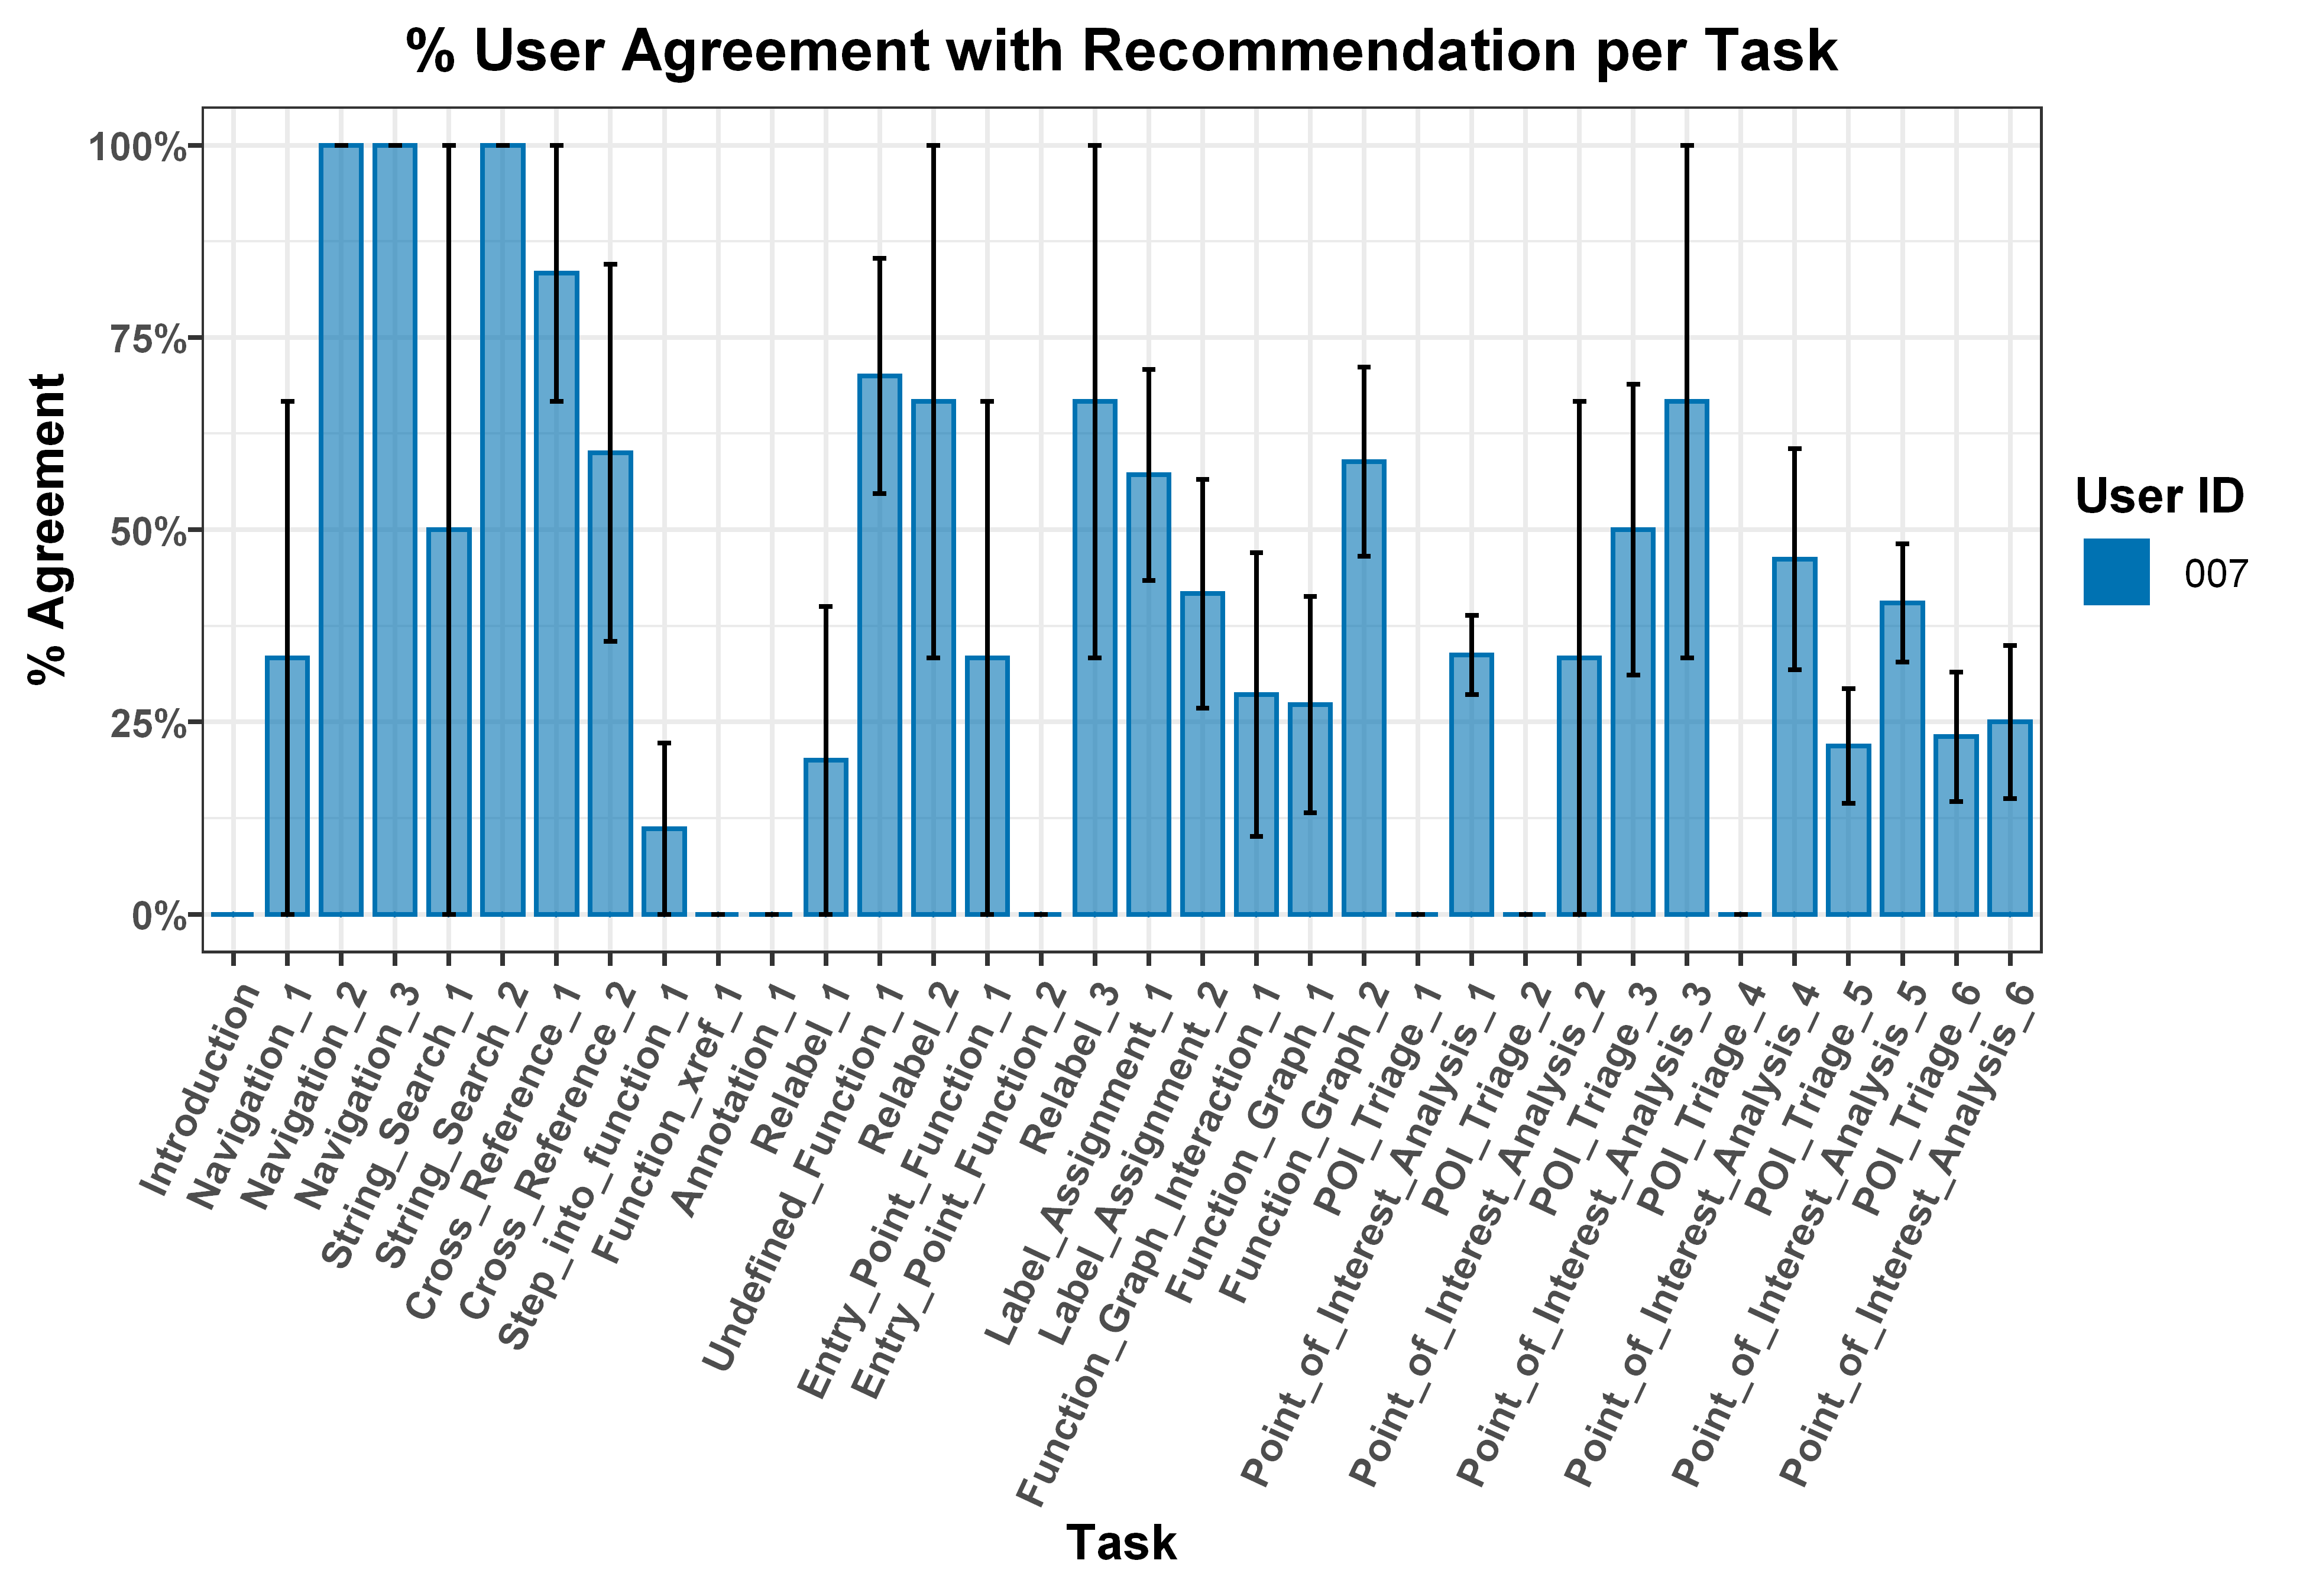

In [248]:
## Mean agreement per task (w/expert initialization)
options(repr.plot.width=6.5, repr.plot.height=4.5, repr.plot.res=600)

data <- summaryBy(Match_Any ~ UserID + Task, data=model_data_007, keep.names=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
data$Match_Any.se <- data$Match_Any.sd / sqrt(data$Match_Any.length)
data$Task <- factor(data$Task, levels = data$Task)
#levels(data$Task)
data$Task <- revalue(data$Task, c(Point_of_Interest_Triage_1="POI_Triage_1", Proof_of_Vulnerability_Analysis_1="POI_Analysis_1",
                                  Point_of_Interest_Triage_2="POI_Triage_2", Proof_of_Vulnerability_Analysis_2="POI_Analysis_2",
                                  Point_of_Interest_Triage_3="POI_Triage_3", Proof_of_Vulnerability_Analysis_3="POI_Analysis_3",
                                  Point_of_Interest_Triage_4="POI_Triage_4", Proof_of_Vulnerability_Analysis_4="POI_Analysis_4",
                                  Point_of_Interest_Triage_5="POI_Triage_5", Proof_of_Vulnerability_Analysis_5="POI_Analysis_5",
                                  Point_of_Interest_Triage_6="POI_Triage_6", Proof_of_Vulnerability_Analysis_6="POI_Analysis_6"))

agg_007 <- ggplot(data = data, aes(x=Task, y=Match_Any.mean, group=UserID, color=UserID, fill=UserID)) + labs(fill="User ID",color="User ID") +
            geom_col(position=position_dodge(), width = 0.75, show.legend=FALSE) +
            geom_point(aes(y=0,color=UserID), size=0) +
            geom_errorbar(aes(ymin = Match_Any.mean - Match_Any.se, ymax = Match_Any.mean + Match_Any.se), colour="black", size=.50, width=.25) +
            scale_fill_manual(values=alpha(c("#0072B2"),0.6)) +
            scale_color_manual(values=c("#0072B2")) +
            guides(color = guide_legend(override.aes = list(shape=15,size = 6))) +
            ylab("% Agreement") + xlab("Task") + #ylim(0.0,1.0) + #coord_fixed(1.2) +
            scale_y_continuous(limits=c(0.0,1.0), labels = scales::percent) +
            theme_bw() + ggtitle("% User Agreement with Recommendation per Task") + 
            theme(text = element_text(size=10, face="bold"),
                  axis.title.x = element_text(margin = margin(t=2)),
                  axis.title.y = element_text(margin = margin(t=0)),
                  axis.text.x = element_text(size=8, angle = 65, vjust = 1.0, hjust=1), 
                  axis.text.y = element_text(size=8, margin = margin(l=3)),
                  legend.text = element_text(size=8, face="plain"),
                  legend.spacing.y = unit(0.075, 'cm'),
                  legend.box.margin=margin(-5,0,-10,-10),
                  plot.title = element_text(size=12, hjust = 0.5))
agg_007

Warning message:
"Removed 3608 row(s) containing missing values (geom_path)."


r_Past_rolled r_Past_interp r_Future_rolled r_Future_interp
1 -0.1920309    -0.3390655    -0.2153781      -0.3627575

Warning message:
"Removed 3024 row(s) containing missing values (geom_path)."


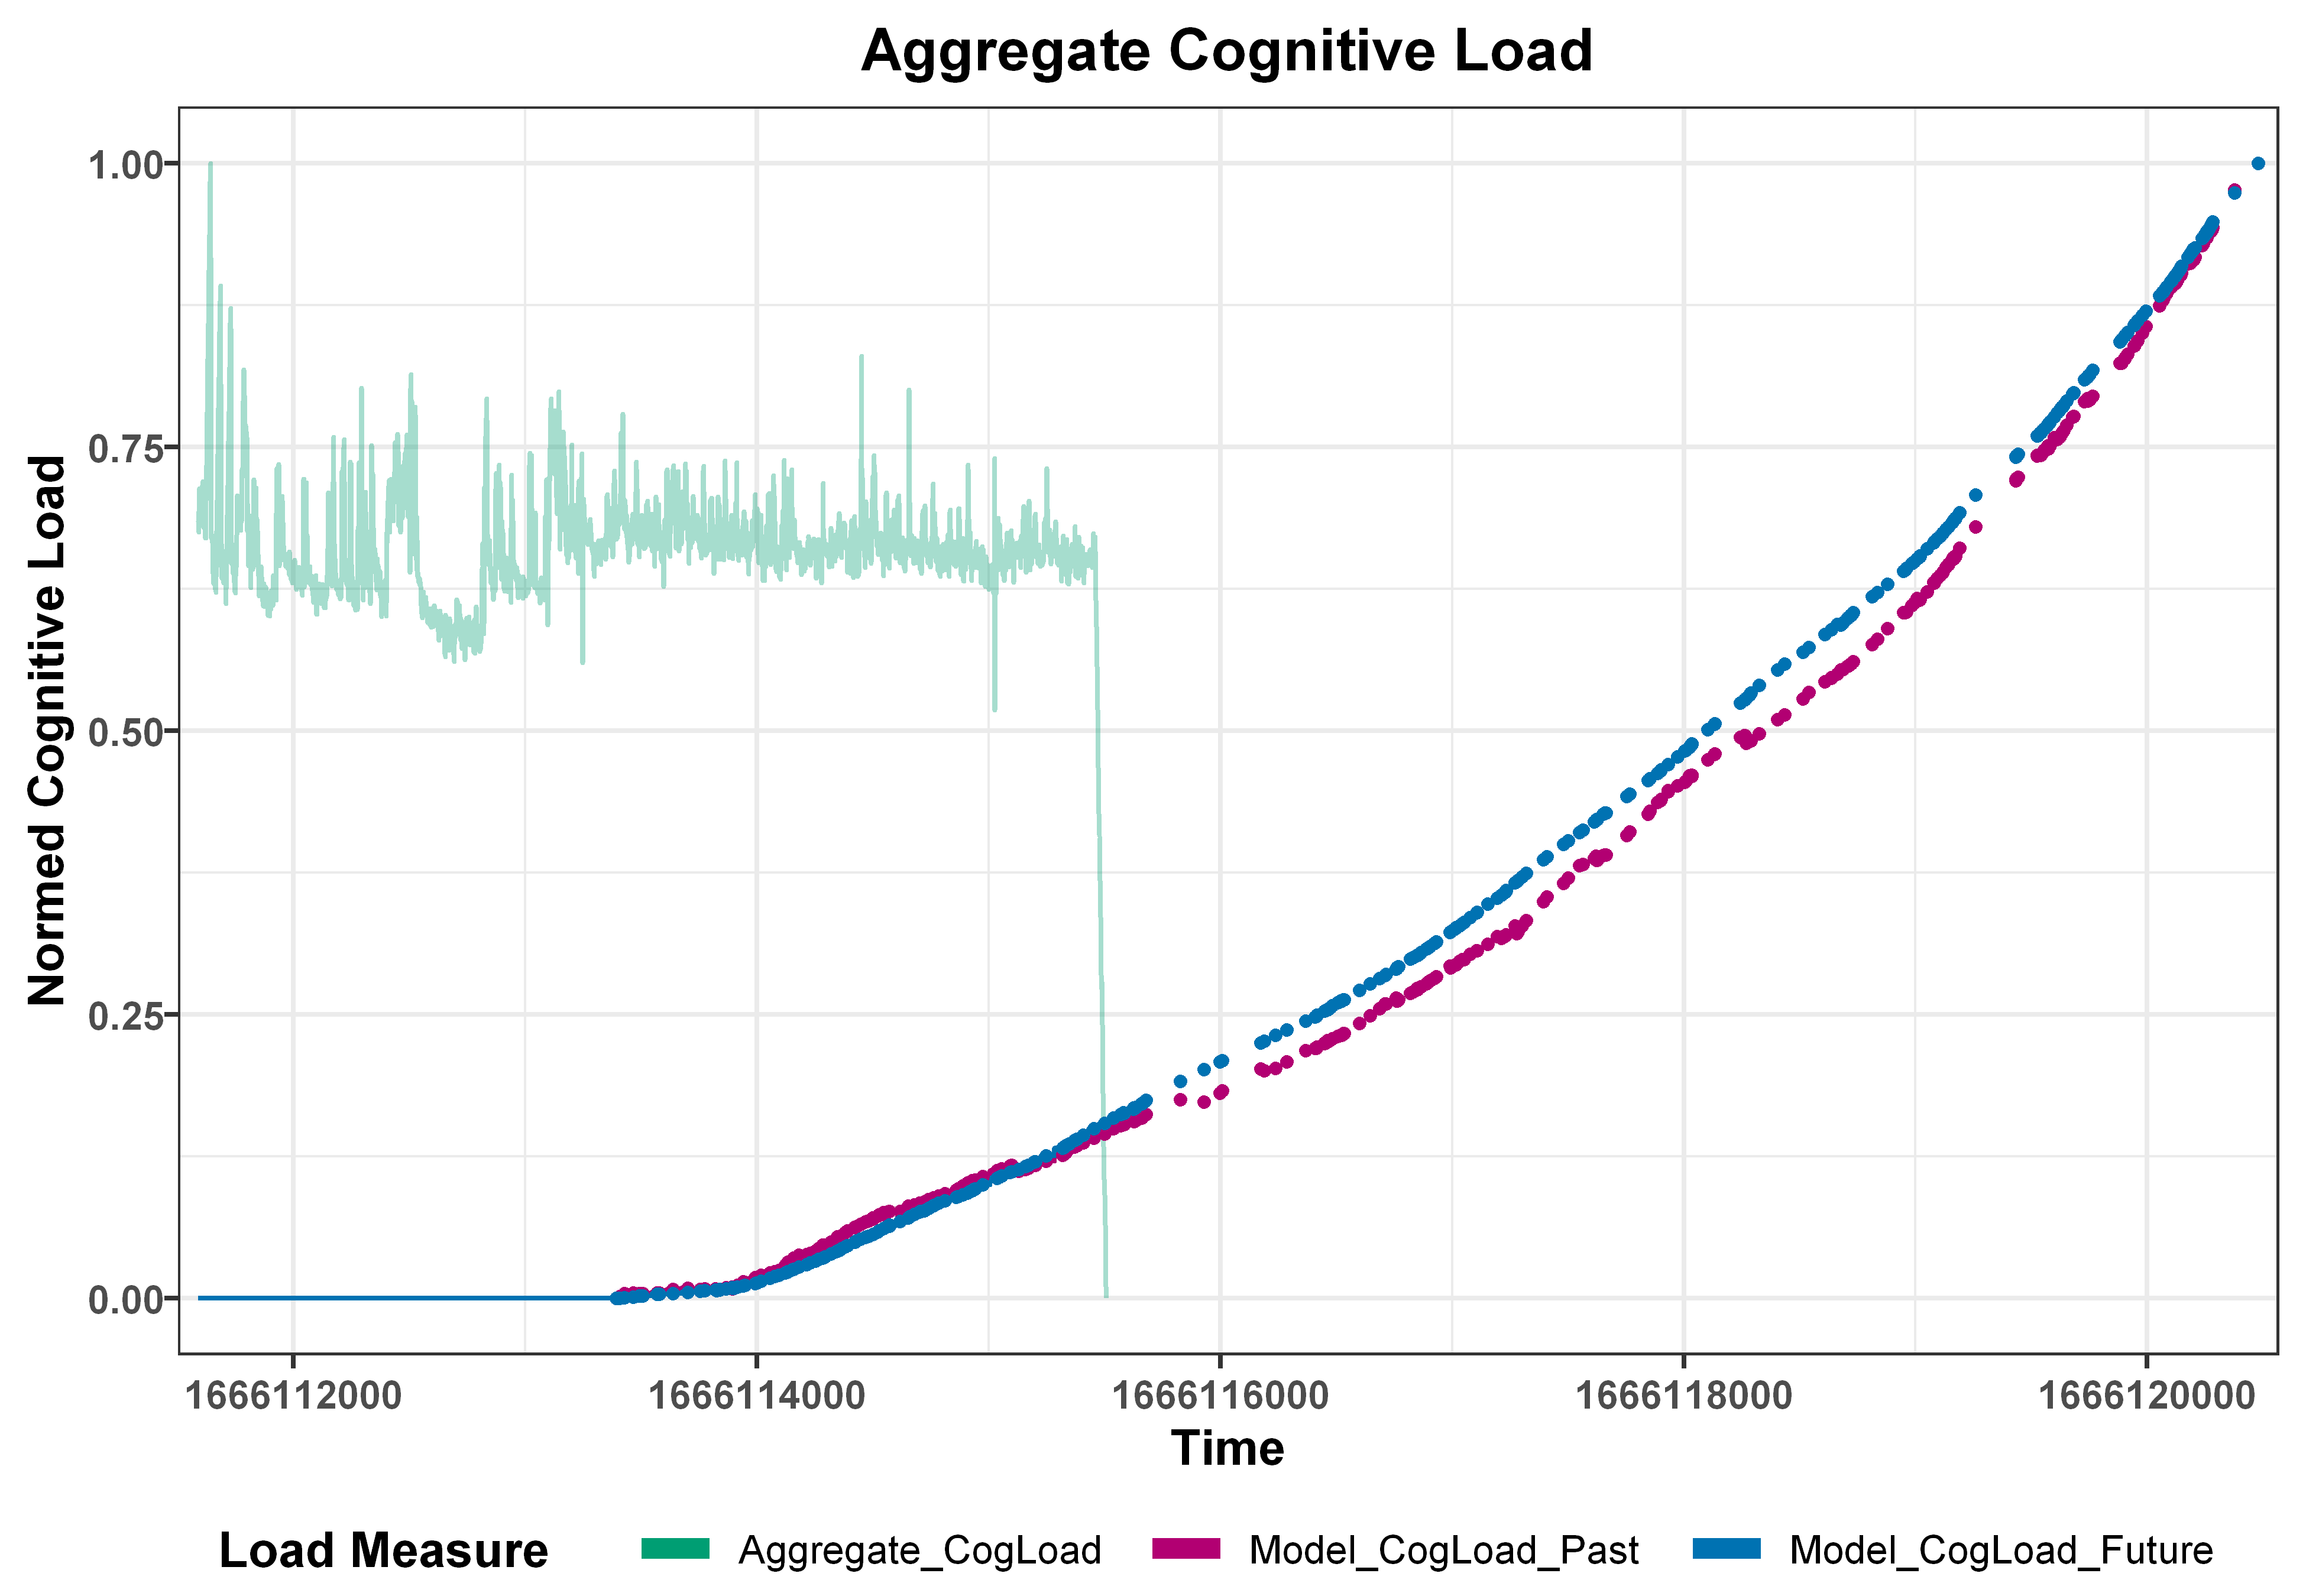

TaskLoad_r_Past_rolled TaskLoad_r_Past_interp TaskLoad_r_Future_rolled
1 0.08100319             0.1235609              0.08318721              
  TaskLoad_r_Future_interp Engagement_r_Past_rolled Engagement_r_Past_interp
1 0.126175                 0.02131456               -0.1356903              
  Engagement_r_Future_rolled Engagement_r_Future_interp
1 0.01539385                 -0.1384243

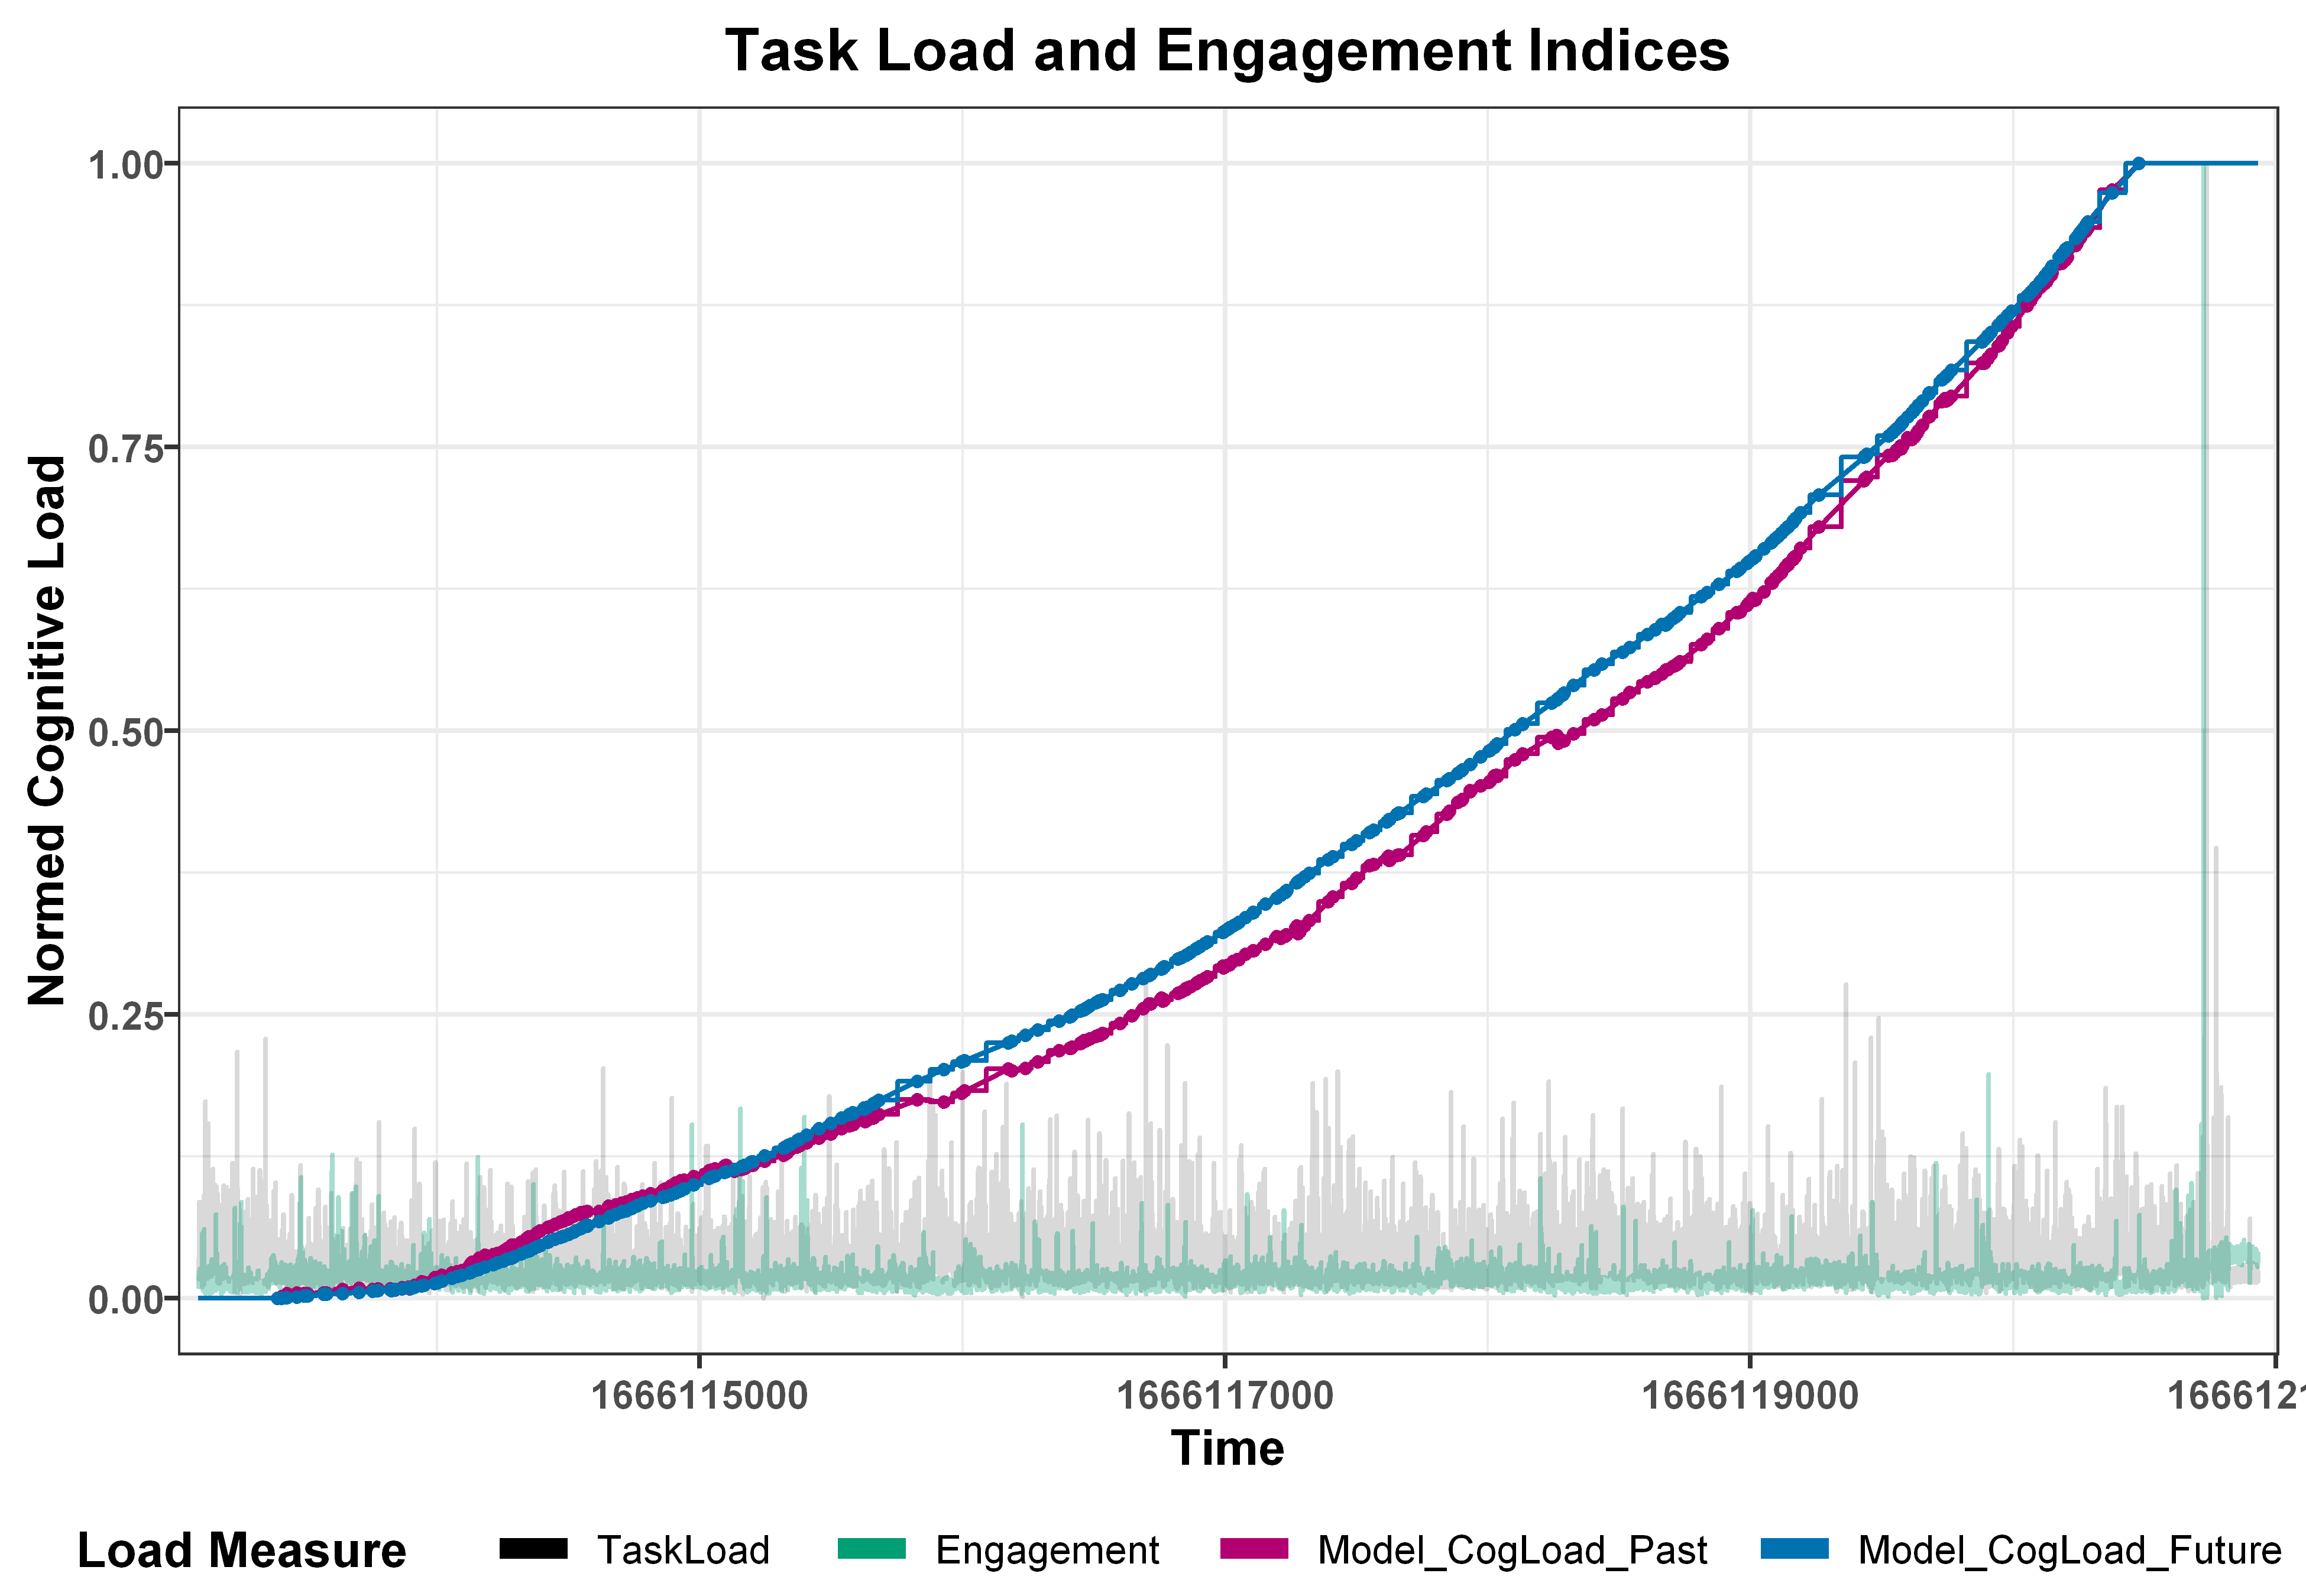

In [249]:
## Cognitive Load Correlations
model_data <- summaryBy(Past_CogLoad + Future_CogLoad ~ UserID + Time, data=model_data_007, keep.names=TRUE, order=FALSE)
model_data$Past_CogLoad_normed = (model_data$Past_CogLoad-min(model_data$Past_CogLoad))/(max(model_data$Past_CogLoad)-min(model_data$Past_CogLoad))
model_data$Future_CogLoad_normed = (model_data$Future_CogLoad-min(model_data$Future_CogLoad))/(max(model_data$Future_CogLoad)-min(model_data$Future_CogLoad))
model_data <- summaryBy(Past_CogLoad_normed + Future_CogLoad_normed ~ UserID + Time, data=model_data, keep.names=TRUE, order=FALSE)
#head(model_data)

cogload_data <- summaryBy(Agg_cogLoad ~ UserID + Time, data=cogload_data_007, keep.names=TRUE, order=FALSE)
cogload_data$Agg_cogLoad_normed = (cogload_data$Agg_cogLoad-min(cogload_data$Agg_cogLoad))/(max(cogload_data$Agg_cogLoad)-min(cogload_data$Agg_cogLoad))
cogload_data <- summaryBy(Agg_cogLoad_normed ~ UserID + Time, data=cogload_data, keep.names=TRUE, order=FALSE)
#head(cogload_data)

eng_taskload_data <- summaryBy(TaskLoad + Engagement ~ UserID + Time, data=eng_taskload_data_007, keep.names=TRUE, order=FALSE)
eng_taskload_data$Engagement[eng_taskload_data$Engagement>13] = 0
#summary(eng_taskload_data$Engagement)
eng_taskload_data$TaskLoad_normed = (eng_taskload_data$TaskLoad-min(eng_taskload_data$TaskLoad))/(max(eng_taskload_data$TaskLoad)-min(eng_taskload_data$TaskLoad))
eng_taskload_data$Engagement_normed = (eng_taskload_data$Engagement-min(eng_taskload_data$Engagement))/(max(eng_taskload_data$Engagement)-min(eng_taskload_data$Engagement))
eng_taskload_data <- summaryBy(TaskLoad_normed + Engagement_normed ~ UserID + Time, data=eng_taskload_data, keep.names=TRUE, order=FALSE)
#head(eng_taskload_data)

setDT(model_data)
setDT(cogload_data)
setDT(eng_taskload_data)

setkey(model_data, UserID, Time)
setkey(cogload_data, UserID, Time)
setkey(eng_taskload_data, UserID, Time)

###Aggregate Cognitive Load
rawdata = model_data[cogload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

rawdata$Future_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Future_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past",
                        ifelse(data$variable=="Future_CogLoad_normed"|data$variable=="Future_CogLoadInterp","Model_CogLoad_Future",
                               "Aggregate_CogLoad"))
data$type <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Future_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp"|data$variable=="Future_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("Aggregate_CogLoad", "Model_CogLoad_Past","Model_CogLoad_Future"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)

load_007 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                geom_point(data=model_data, aes(Time, Future_CogLoad_normed), colour="#0072B2", size = 0.75) +
                scale_color_manual(values=c("#009E73","#B20072","#0072B2")) +
                scale_alpha_manual(values=c(0.35,1.0,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Aggregate Cognitive Load") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-10),
                      plot.title = element_text(size=12, hjust = 0.5))
load_007

rawdata %>% group_by(UserID) %>%
  summarise(r_Past_rolled = cor(Agg_cogLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
            r_Past_interp = cor(Agg_cogLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
            r_Future_rolled = cor(Agg_cogLoad_normed, Future_CogLoad_normed, use="pairwise.complete.obs"),
            r_Future_interp = cor(Agg_cogLoad_normed, Future_CogLoadInterp, use="pairwise.complete.obs"))


###Task Load Index
rawdata = model_data[eng_taskload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

rawdata$Future_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Future_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past",
                        ifelse(data$variable=="Future_CogLoad_normed"|data$variable=="Future_CogLoadInterp","Model_CogLoad_Future",
                               ifelse(data$variable=="TaskLoad_normed","TaskLoad","Engagement")))
data$type <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Future_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp"|data$variable=="Future_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("TaskLoad","Engagement","Model_CogLoad_Past","Model_CogLoad_Future"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)

eng_007 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                geom_point(data=model_data, aes(Time, Future_CogLoad_normed), colour="#0072B2", size = 0.75) +
                scale_color_manual(values=c("black","#009E73","#B20072","#0072B2")) +
                scale_alpha_manual(values=c(0.15,0.35,1.0,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Task Load and Engagement Indices") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-25),
                      plot.title = element_text(size=12, hjust = 0.5))
eng_007

rawdata %>% group_by(UserID) %>%
  summarise(TaskLoad_r_Past_rolled = cor(TaskLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
            TaskLoad_r_Past_interp = cor(TaskLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
            TaskLoad_r_Future_rolled = cor(TaskLoad_normed, Future_CogLoad_normed, use="pairwise.complete.obs"),
            TaskLoad_r_Future_interp = cor(TaskLoad_normed, Future_CogLoadInterp, use="pairwise.complete.obs"),
            Engagement_r_Past_rolled = cor(Engagement_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
            Engagement_r_Past_interp = cor(Engagement_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
            Engagement_r_Future_rolled = cor(Engagement_normed, Future_CogLoad_normed, use="pairwise.complete.obs"),
            Engagement_r_Future_interp = cor(Engagement_normed, Future_CogLoadInterp, use="pairwise.complete.obs"))


# Subject 008

The following `from` values were not present in `x`: Proof_of_Vulnerability_Analysis_1, Proof_of_Vulnerability_Analysis_2, Proof_of_Vulnerability_Analysis_3, Proof_of_Vulnerability_Analysis_4, Proof_of_Vulnerability_Analysis_5, Proof_of_Vulnerability_Analysis_6



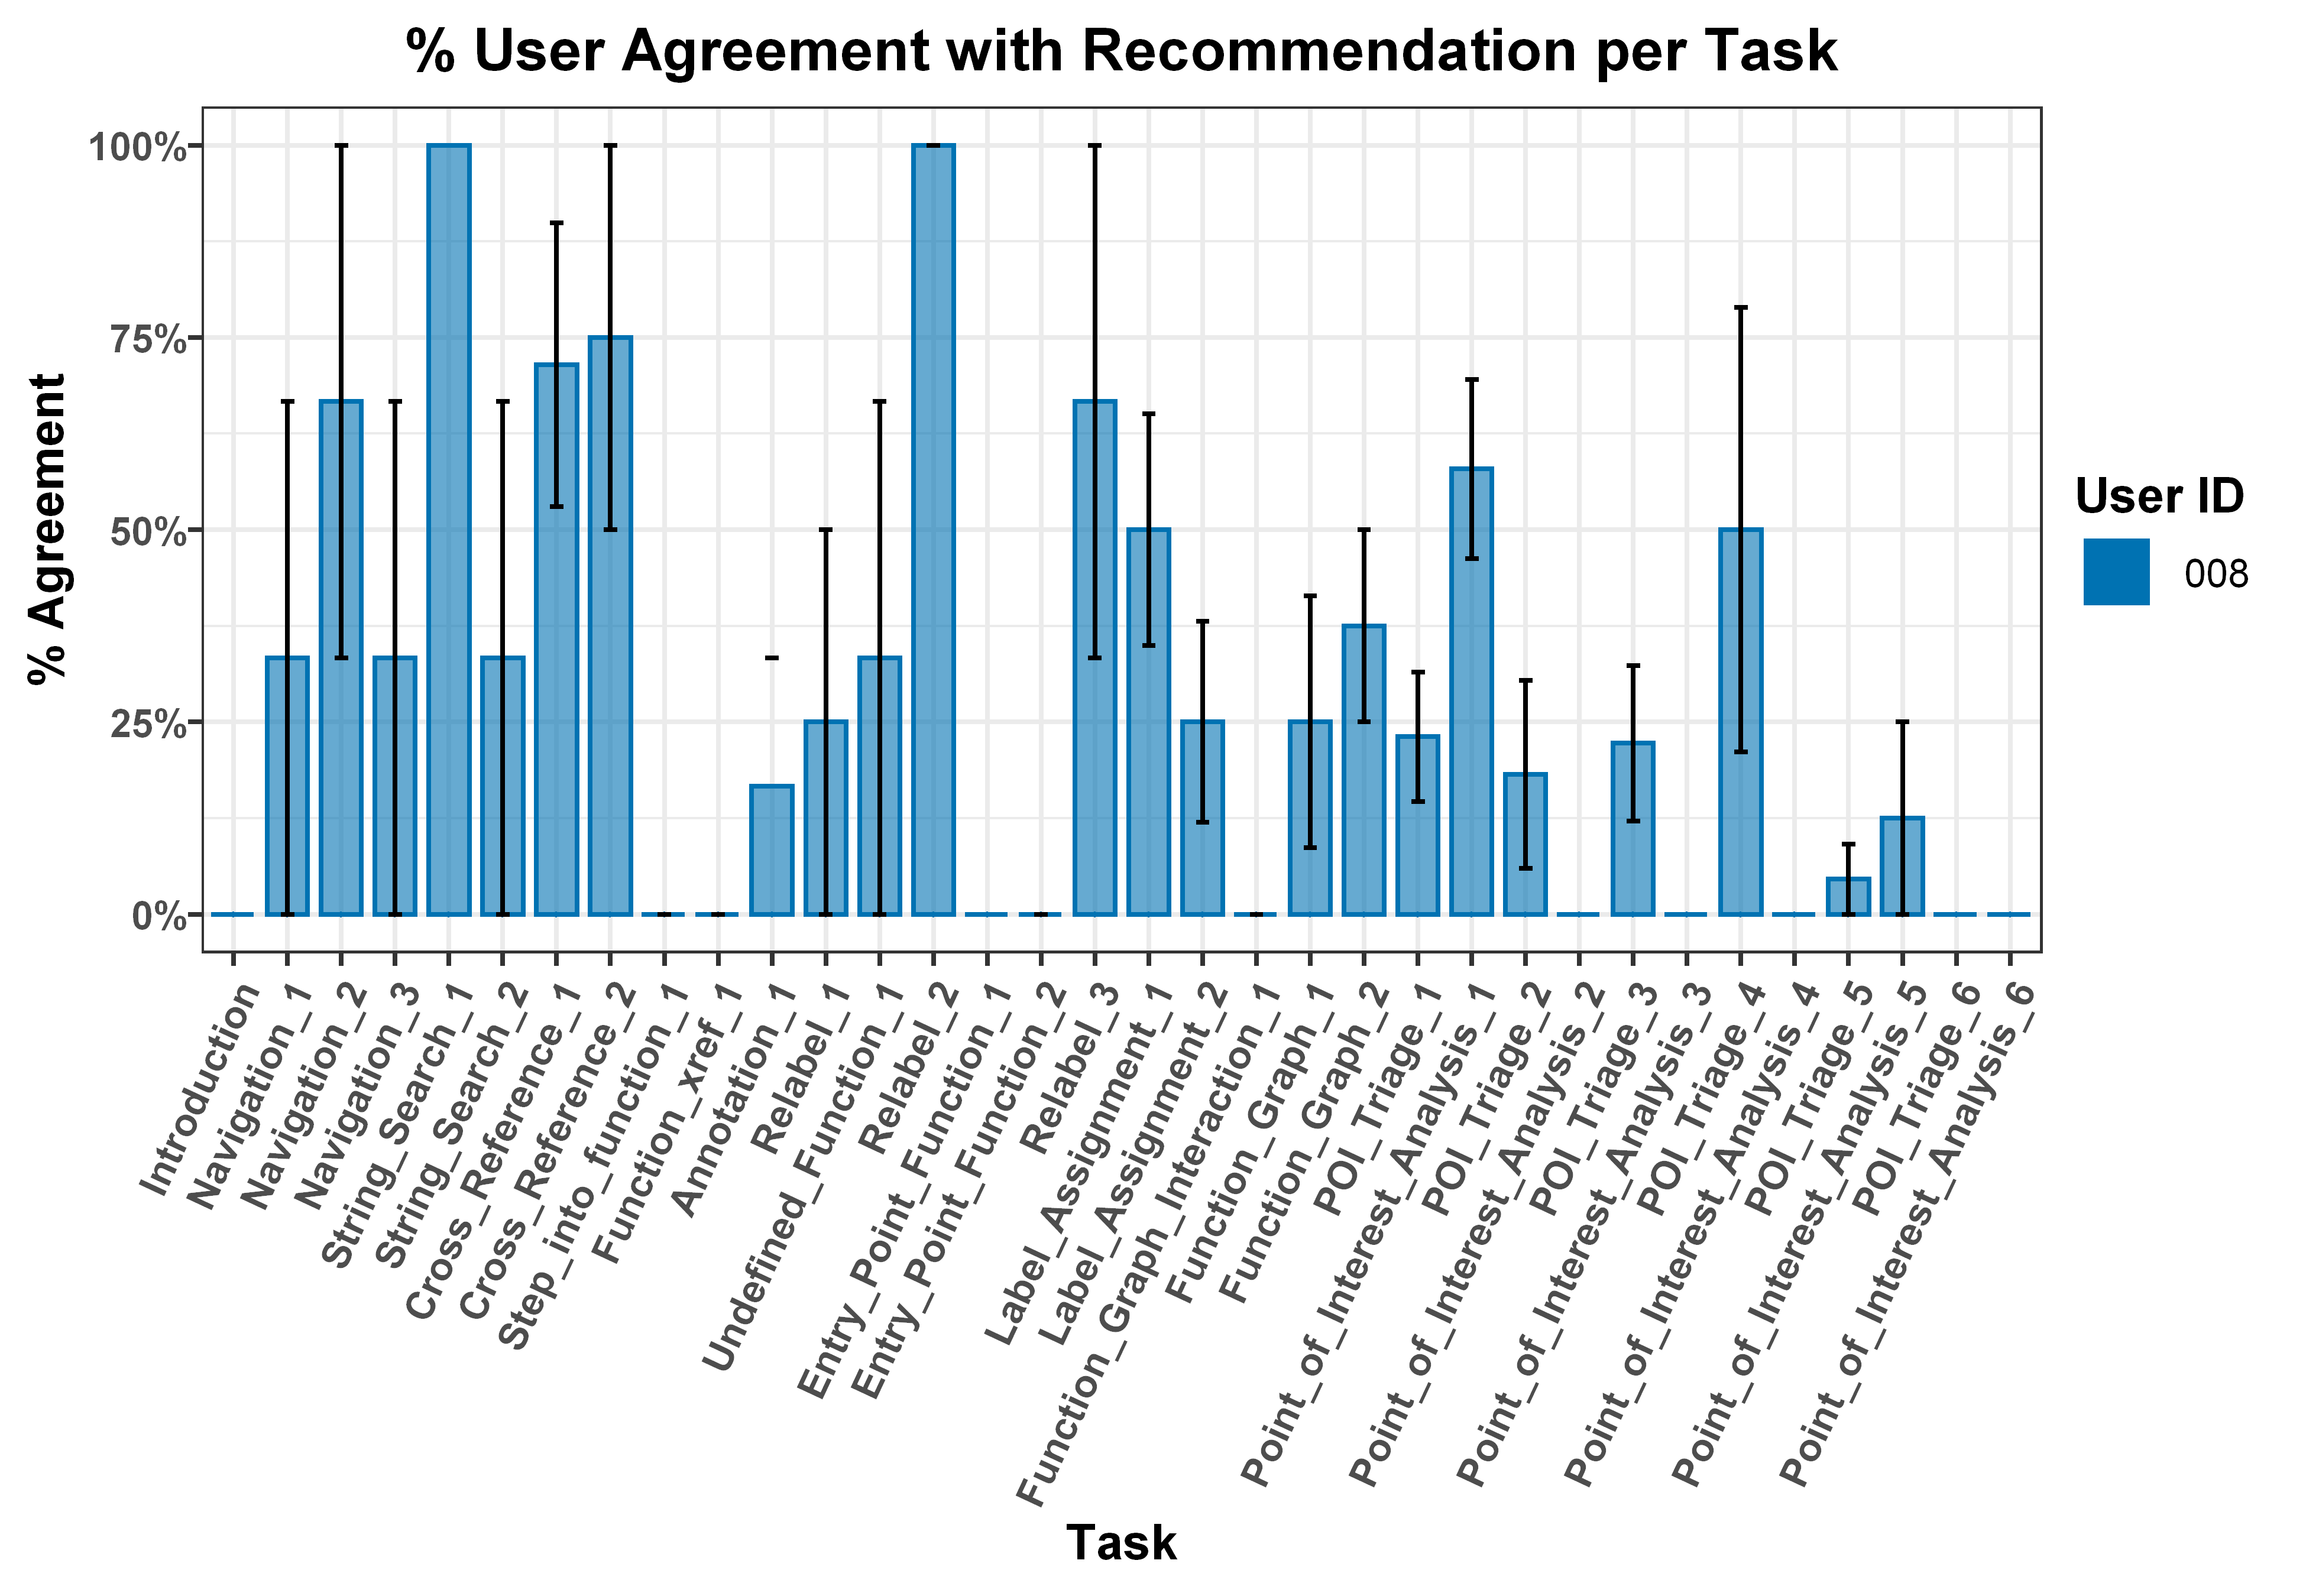

In [250]:
## Mean agreement per task (w/expert initialization)
options(repr.plot.width=6.5, repr.plot.height=4.5, repr.plot.res=600)

data <- summaryBy(Match_Any ~ UserID + Task, data=model_data_008, keep.names=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
data$Match_Any.se <- data$Match_Any.sd / sqrt(data$Match_Any.length)
data$Task <- factor(data$Task, levels = data$Task)
#levels(data$Task)
data$Task <- revalue(data$Task, c(Point_of_Interest_Triage_1="POI_Triage_1", Proof_of_Vulnerability_Analysis_1="POI_Analysis_1",
                                  Point_of_Interest_Triage_2="POI_Triage_2", Proof_of_Vulnerability_Analysis_2="POI_Analysis_2",
                                  Point_of_Interest_Triage_3="POI_Triage_3", Proof_of_Vulnerability_Analysis_3="POI_Analysis_3",
                                  Point_of_Interest_Triage_4="POI_Triage_4", Proof_of_Vulnerability_Analysis_4="POI_Analysis_4",
                                  Point_of_Interest_Triage_5="POI_Triage_5", Proof_of_Vulnerability_Analysis_5="POI_Analysis_5",
                                  Point_of_Interest_Triage_6="POI_Triage_6", Proof_of_Vulnerability_Analysis_6="POI_Analysis_6"))

agg_008 <- ggplot(data = data, aes(x=Task, y=Match_Any.mean, group=UserID, color=UserID, fill=UserID)) + labs(fill="User ID",color="User ID") +
            geom_col(position=position_dodge(), width = 0.75, show.legend=FALSE) +
            geom_point(aes(y=0,color=UserID), size=0) +
            geom_errorbar(aes(ymin = Match_Any.mean - Match_Any.se, ymax = Match_Any.mean + Match_Any.se), colour="black", size=.50, width=.25) +
            scale_fill_manual(values=alpha(c("#0072B2"),0.6)) +
            scale_color_manual(values=c("#0072B2")) +
            guides(color = guide_legend(override.aes = list(shape=15,size = 6))) +
            ylab("% Agreement") + xlab("Task") + #ylim(0.0,1.0) + #coord_fixed(1.2) +
            scale_y_continuous(limits=c(0.0,1.0), labels = scales::percent) +
            theme_bw() + ggtitle("% User Agreement with Recommendation per Task") + 
            theme(text = element_text(size=10, face="bold"),
                  axis.title.x = element_text(margin = margin(t=2)),
                  axis.title.y = element_text(margin = margin(t=0)),
                  axis.text.x = element_text(size=8, angle = 65, vjust = 1.0, hjust=1), 
                  axis.text.y = element_text(size=8, margin = margin(l=3)),
                  legend.text = element_text(size=8, face="plain"),
                  legend.spacing.y = unit(0.075, 'cm'),
                  legend.box.margin=margin(-5,0,-10,-10),
                  plot.title = element_text(size=12, hjust = 0.5))
agg_008

Warning message:
"Removed 4116 row(s) containing missing values (geom_path)."


r_Past_rolled r_Past_interp r_Future_rolled r_Future_interp
1 -0.02073061   -0.2967483    -0.02289343     -0.2972607

Warning message:
"Removed 2406 row(s) containing missing values (geom_path)."


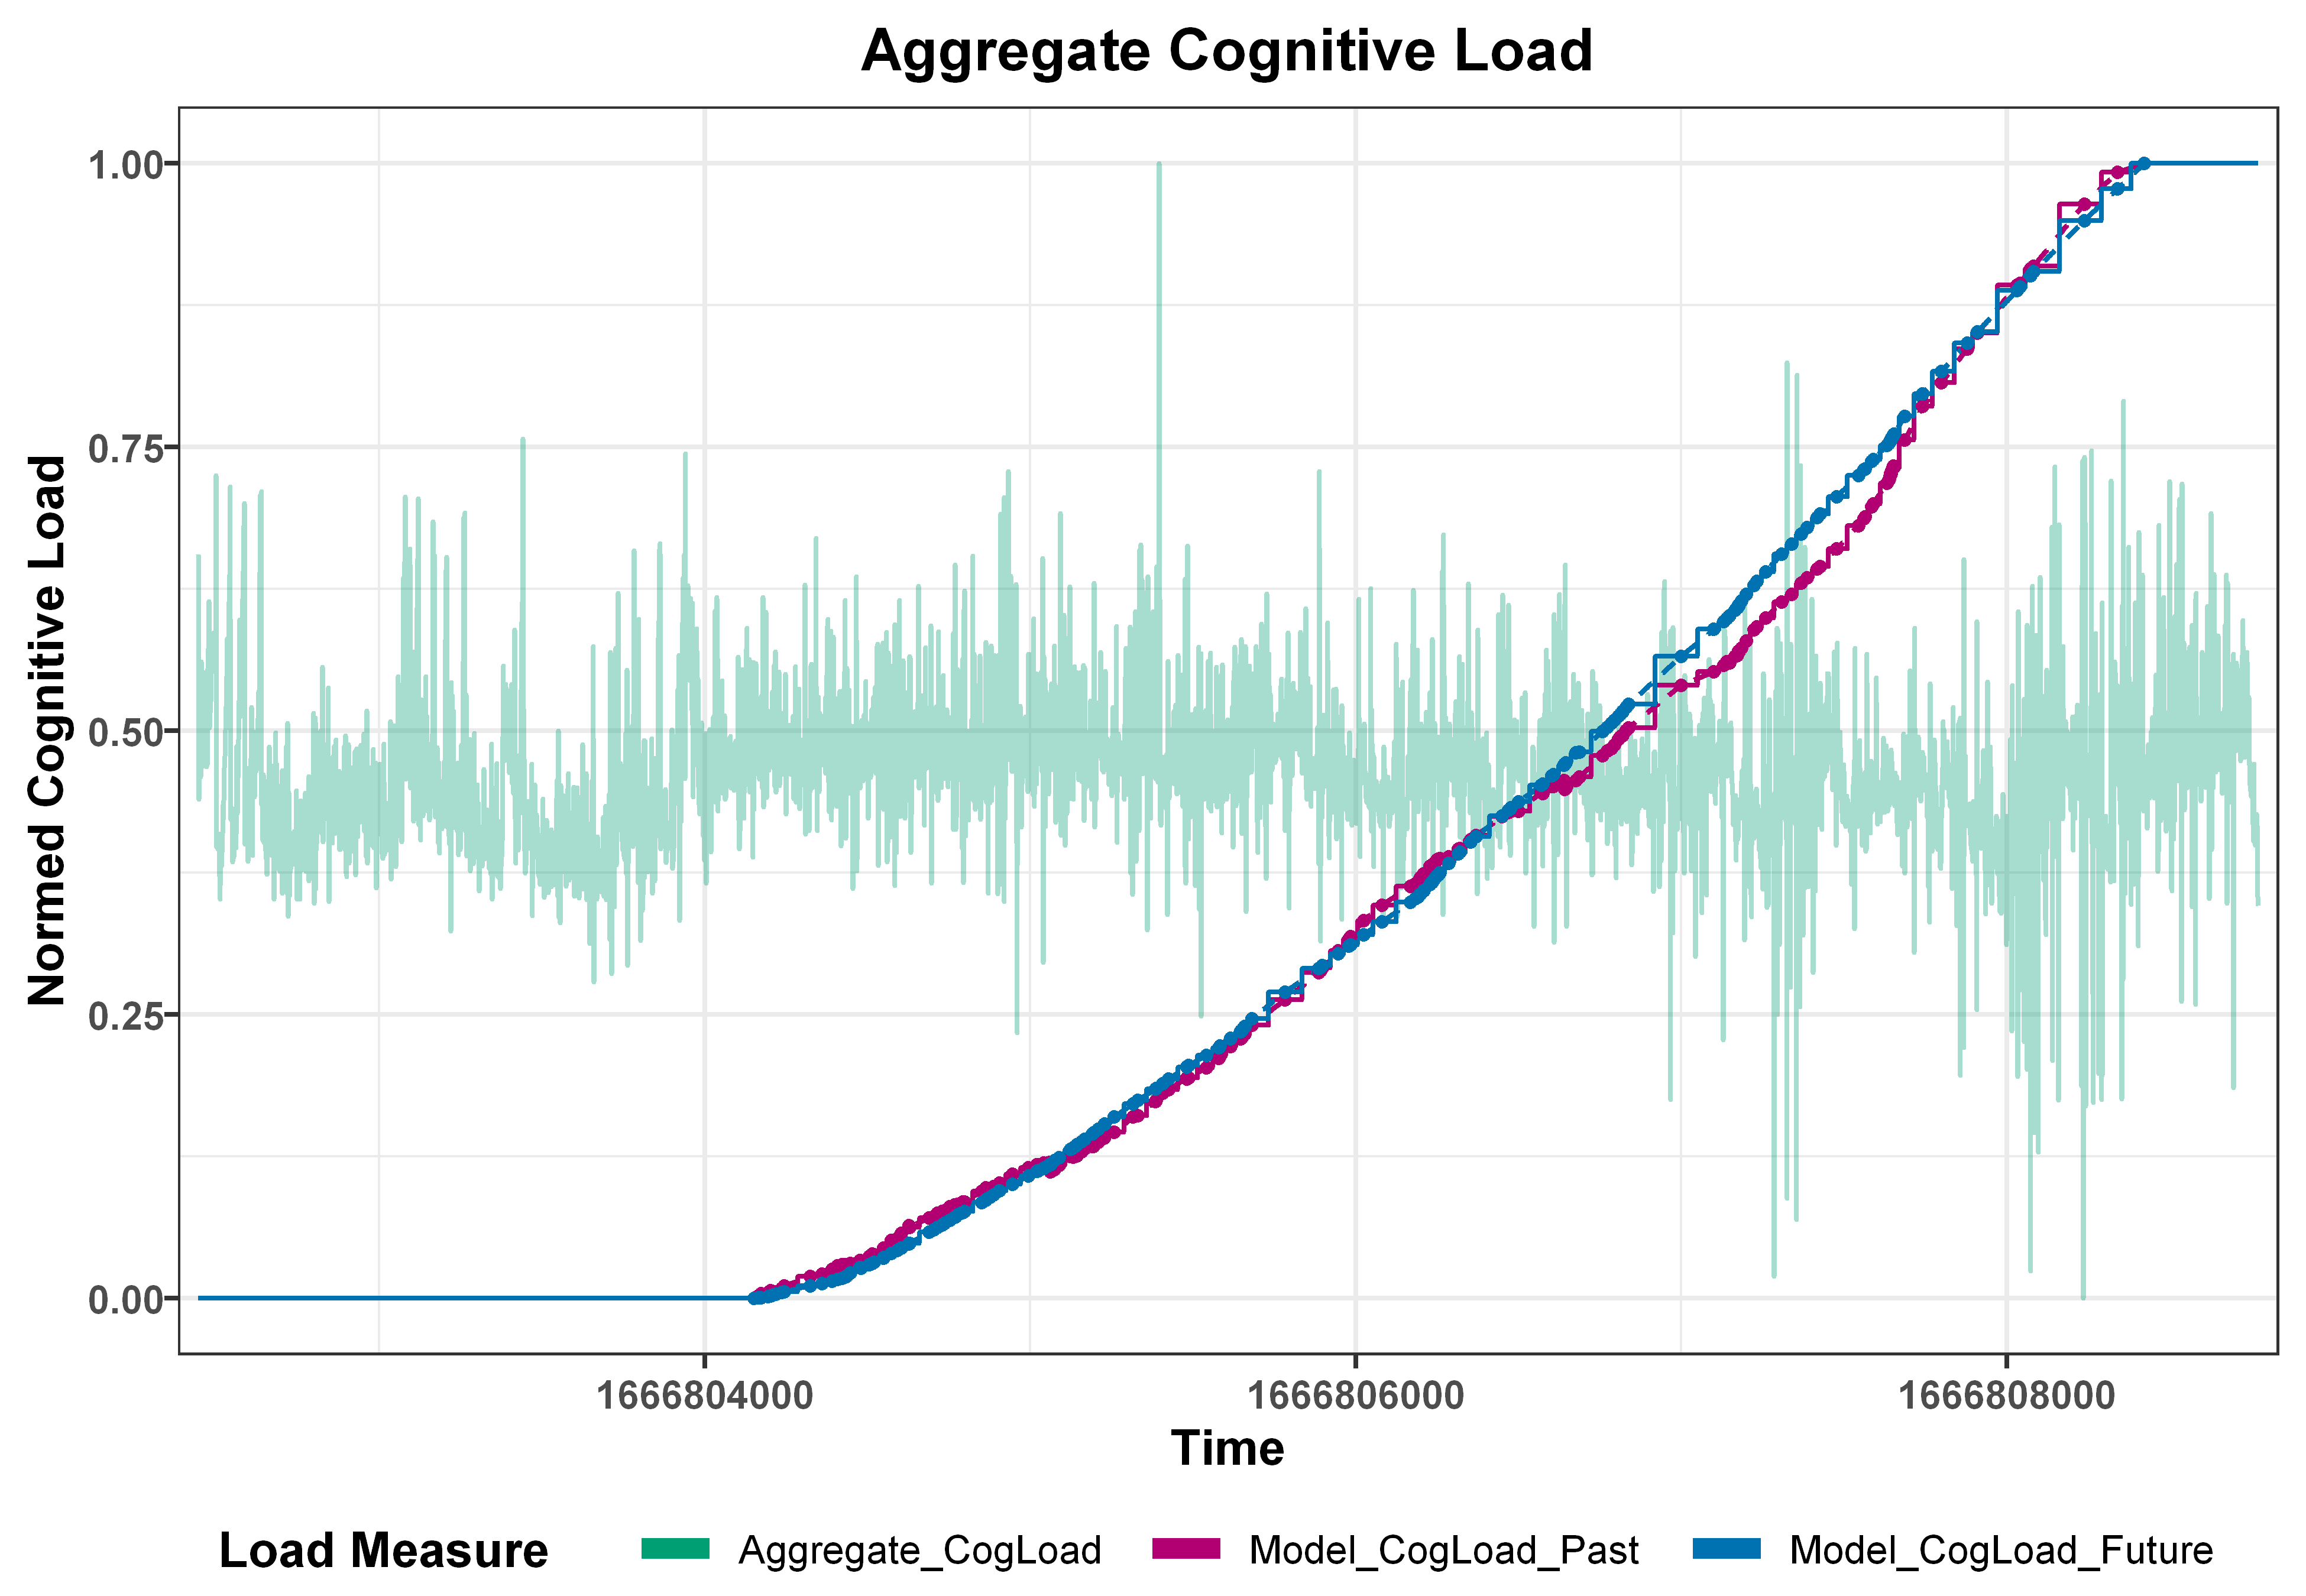

TaskLoad_r_Past_rolled TaskLoad_r_Past_interp TaskLoad_r_Future_rolled
1 -0.06975955            -0.01800299            -0.06948443             
  TaskLoad_r_Future_interp Engagement_r_Past_rolled Engagement_r_Past_interp
1 -0.01903293              0.1903668                0.1395078               
  Engagement_r_Future_rolled Engagement_r_Future_interp
1 0.1895649                  0.1404257

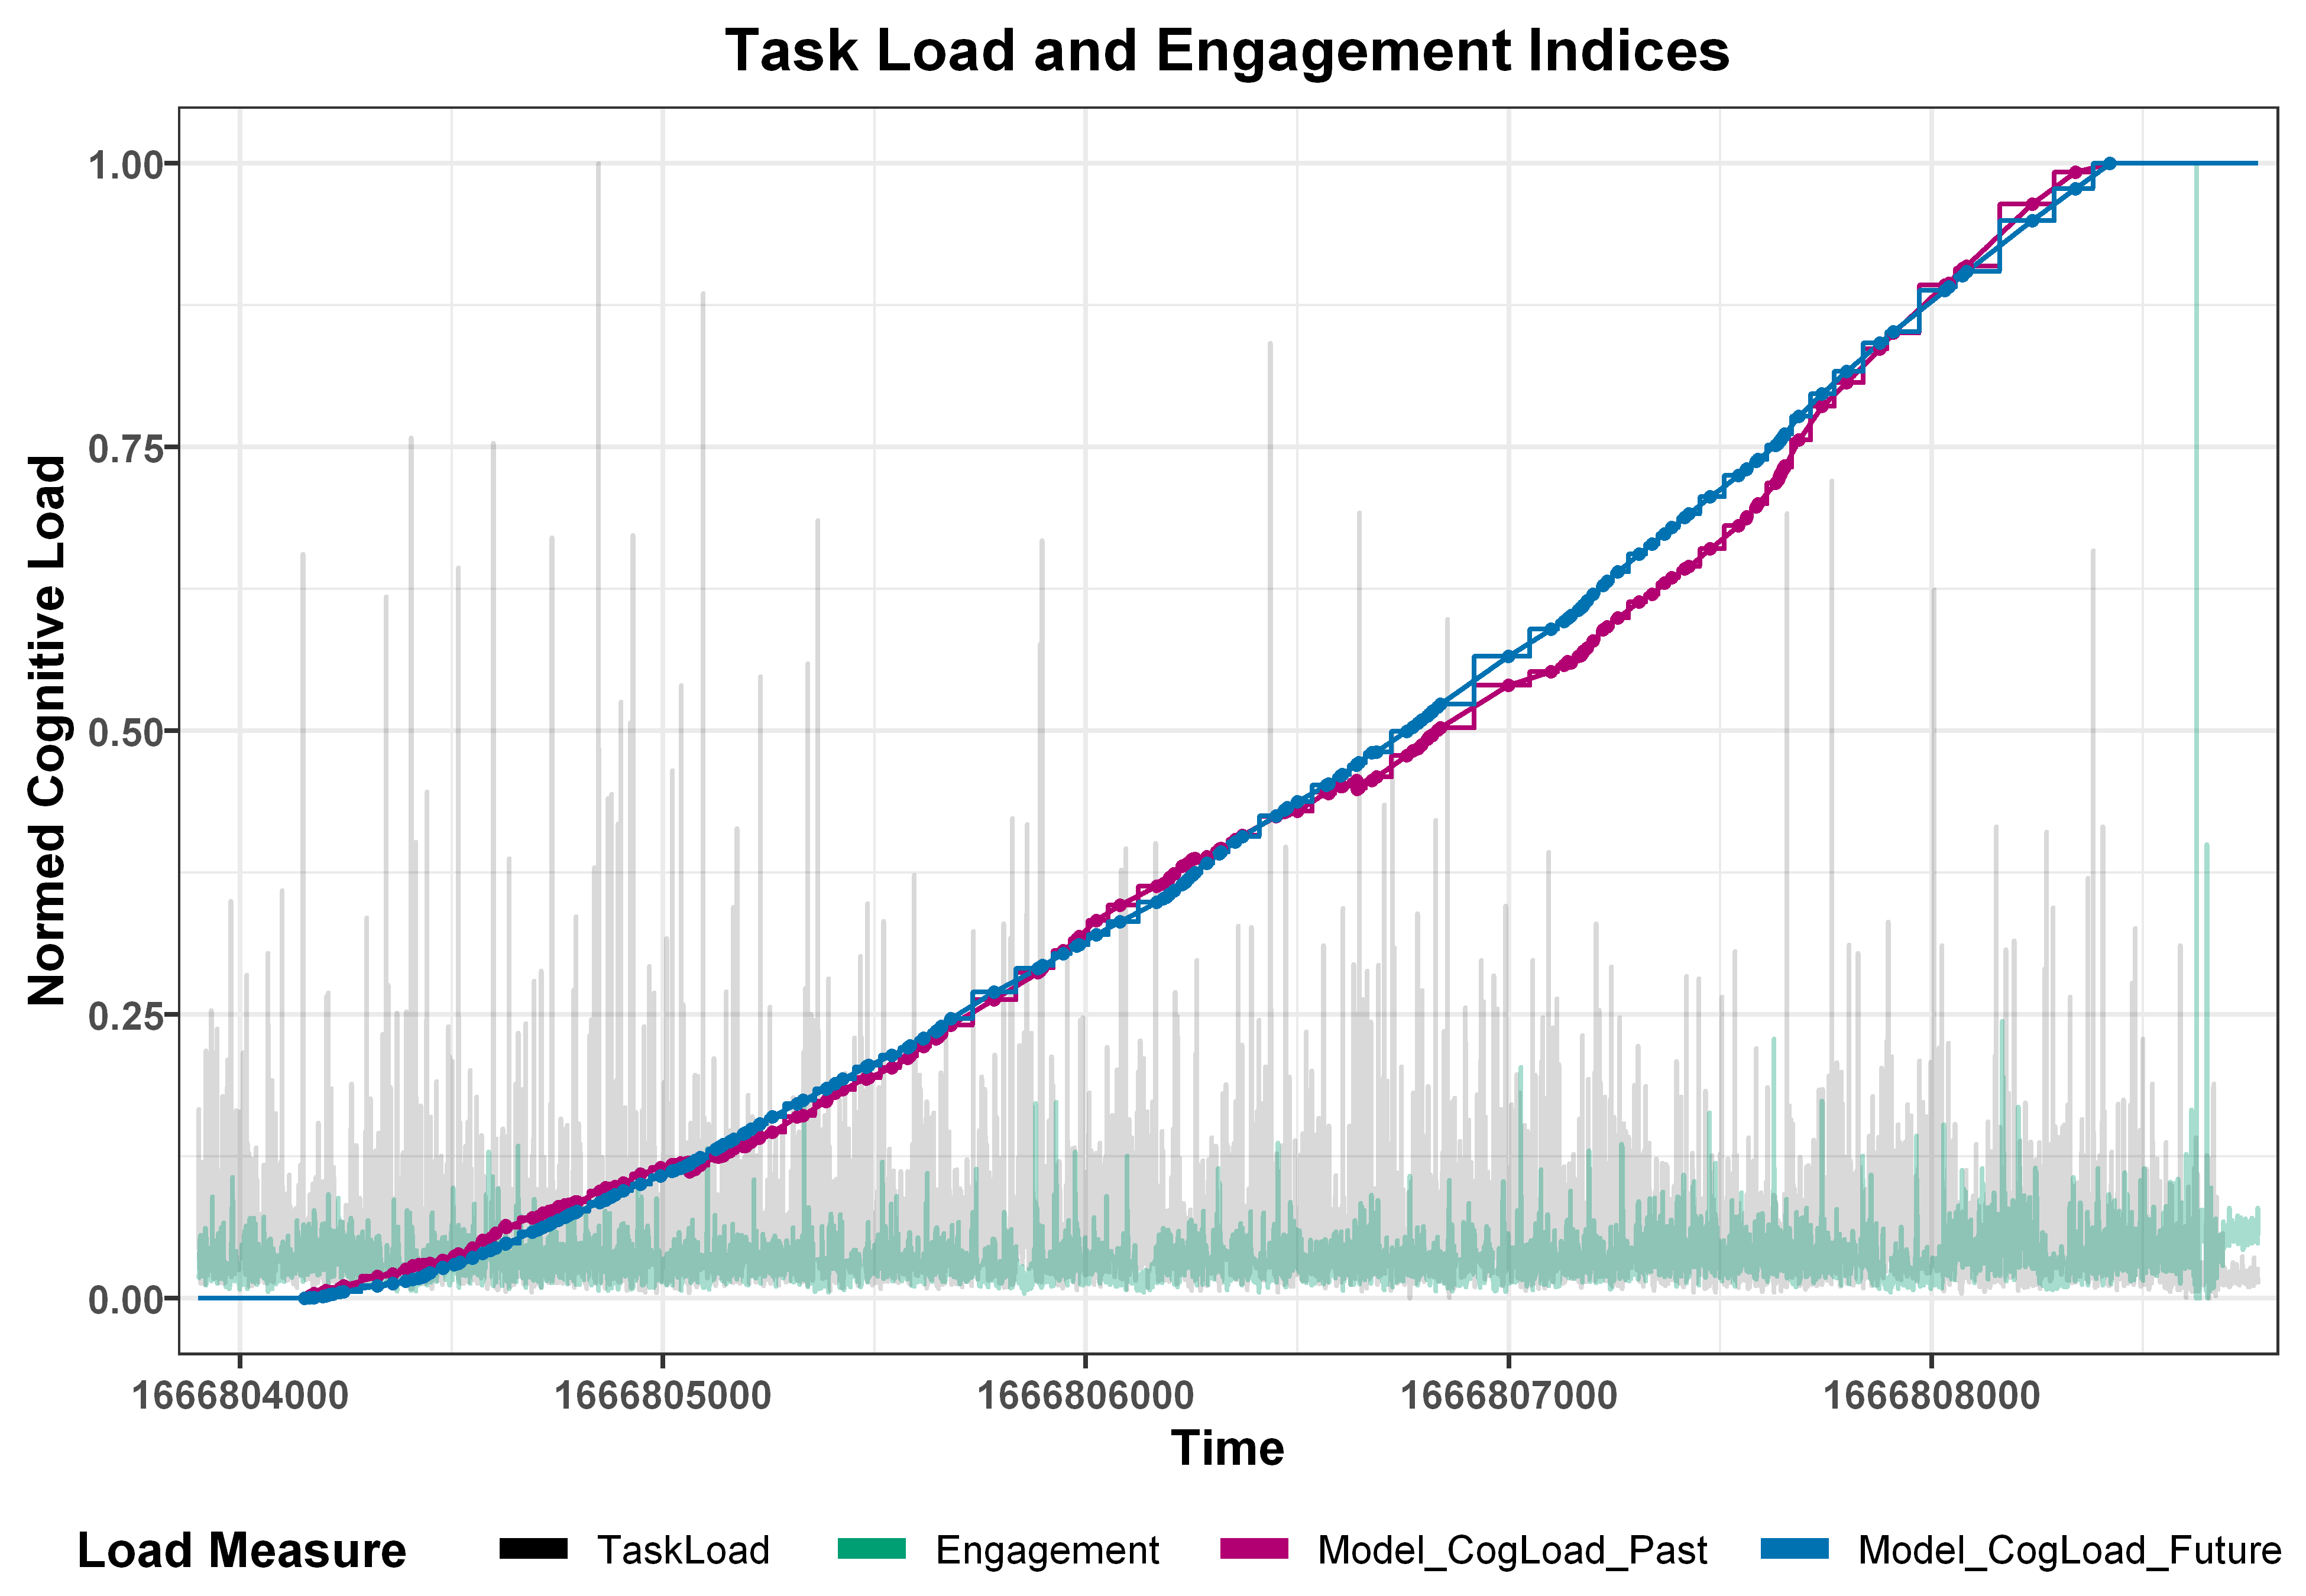

In [251]:
## Cognitive Load Correlations
model_data <- summaryBy(Past_CogLoad + Future_CogLoad ~ UserID + Time, data=model_data_008, keep.names=TRUE, order=FALSE)
model_data$Past_CogLoad_normed = (model_data$Past_CogLoad-min(model_data$Past_CogLoad))/(max(model_data$Past_CogLoad)-min(model_data$Past_CogLoad))
model_data$Future_CogLoad_normed = (model_data$Future_CogLoad-min(model_data$Future_CogLoad))/(max(model_data$Future_CogLoad)-min(model_data$Future_CogLoad))
model_data <- summaryBy(Past_CogLoad_normed + Future_CogLoad_normed ~ UserID + Time, data=model_data, keep.names=TRUE, order=FALSE)
#head(model_data)

cogload_data <- summaryBy(Agg_cogLoad ~ UserID + Time, data=cogload_data_008, keep.names=TRUE, order=FALSE)
cogload_data$Agg_cogLoad_normed = (cogload_data$Agg_cogLoad-min(cogload_data$Agg_cogLoad))/(max(cogload_data$Agg_cogLoad)-min(cogload_data$Agg_cogLoad))
cogload_data <- summaryBy(Agg_cogLoad_normed ~ UserID + Time, data=cogload_data, keep.names=TRUE, order=FALSE)
#head(cogload_data)

eng_taskload_data <- summaryBy(TaskLoad + Engagement ~ UserID + Time, data=eng_taskload_data_008, keep.names=TRUE, order=FALSE)
eng_taskload_data$Engagement[eng_taskload_data$Engagement>13] = 0
#summary(eng_taskload_data$Engagement)
eng_taskload_data$TaskLoad_normed = (eng_taskload_data$TaskLoad-min(eng_taskload_data$TaskLoad))/(max(eng_taskload_data$TaskLoad)-min(eng_taskload_data$TaskLoad))
eng_taskload_data$Engagement_normed = (eng_taskload_data$Engagement-min(eng_taskload_data$Engagement))/(max(eng_taskload_data$Engagement)-min(eng_taskload_data$Engagement))
eng_taskload_data <- summaryBy(TaskLoad_normed + Engagement_normed ~ UserID + Time, data=eng_taskload_data, keep.names=TRUE, order=FALSE)
#head(eng_taskload_data)

setDT(model_data)
setDT(cogload_data)
setDT(eng_taskload_data)

setkey(model_data, UserID, Time)
setkey(cogload_data, UserID, Time)
setkey(eng_taskload_data, UserID, Time)

###Aggregate Cognitive Load
rawdata = model_data[cogload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

rawdata$Future_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Future_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past",
                        ifelse(data$variable=="Future_CogLoad_normed"|data$variable=="Future_CogLoadInterp","Model_CogLoad_Future",
                               "Aggregate_CogLoad"))
data$type <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Future_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp"|data$variable=="Future_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("Aggregate_CogLoad", "Model_CogLoad_Past","Model_CogLoad_Future"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)

load_008 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                geom_point(data=model_data, aes(Time, Future_CogLoad_normed), colour="#0072B2", size = 0.75) +
                scale_color_manual(values=c("#009E73","#B20072","#0072B2")) +
                scale_alpha_manual(values=c(0.35,1.0,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Aggregate Cognitive Load") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-10),
                      plot.title = element_text(size=12, hjust = 0.5))
load_008

rawdata %>% group_by(UserID) %>%
  summarise(r_Past_rolled = cor(Agg_cogLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
            r_Past_interp = cor(Agg_cogLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
            r_Future_rolled = cor(Agg_cogLoad_normed, Future_CogLoad_normed, use="pairwise.complete.obs"),
            r_Future_interp = cor(Agg_cogLoad_normed, Future_CogLoadInterp, use="pairwise.complete.obs"))


###Task Load Index
rawdata = model_data[eng_taskload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

rawdata$Future_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Future_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past",
                        ifelse(data$variable=="Future_CogLoad_normed"|data$variable=="Future_CogLoadInterp","Model_CogLoad_Future",
                               ifelse(data$variable=="TaskLoad_normed","TaskLoad","Engagement")))
data$type <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Future_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp"|data$variable=="Future_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("TaskLoad","Engagement","Model_CogLoad_Past","Model_CogLoad_Future"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)

eng_008 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                geom_point(data=model_data, aes(Time, Future_CogLoad_normed), colour="#0072B2", size = 0.75) +
                scale_color_manual(values=c("black","#009E73","#B20072","#0072B2")) +
                scale_alpha_manual(values=c(0.15,0.35,1.0,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Task Load and Engagement Indices") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-25),
                      plot.title = element_text(size=12, hjust = 0.5))
eng_008

rawdata %>% group_by(UserID) %>%
  summarise(TaskLoad_r_Past_rolled = cor(TaskLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
            TaskLoad_r_Past_interp = cor(TaskLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
            TaskLoad_r_Future_rolled = cor(TaskLoad_normed, Future_CogLoad_normed, use="pairwise.complete.obs"),
            TaskLoad_r_Future_interp = cor(TaskLoad_normed, Future_CogLoadInterp, use="pairwise.complete.obs"),
            Engagement_r_Past_rolled = cor(Engagement_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
            Engagement_r_Past_interp = cor(Engagement_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
            Engagement_r_Future_rolled = cor(Engagement_normed, Future_CogLoad_normed, use="pairwise.complete.obs"),
            Engagement_r_Future_interp = cor(Engagement_normed, Future_CogLoadInterp, use="pairwise.complete.obs"))


# Subject 009

The following `from` values were not present in `x`: Proof_of_Vulnerability_Analysis_1, Proof_of_Vulnerability_Analysis_2, Proof_of_Vulnerability_Analysis_3, Proof_of_Vulnerability_Analysis_4, Proof_of_Vulnerability_Analysis_5, Proof_of_Vulnerability_Analysis_6



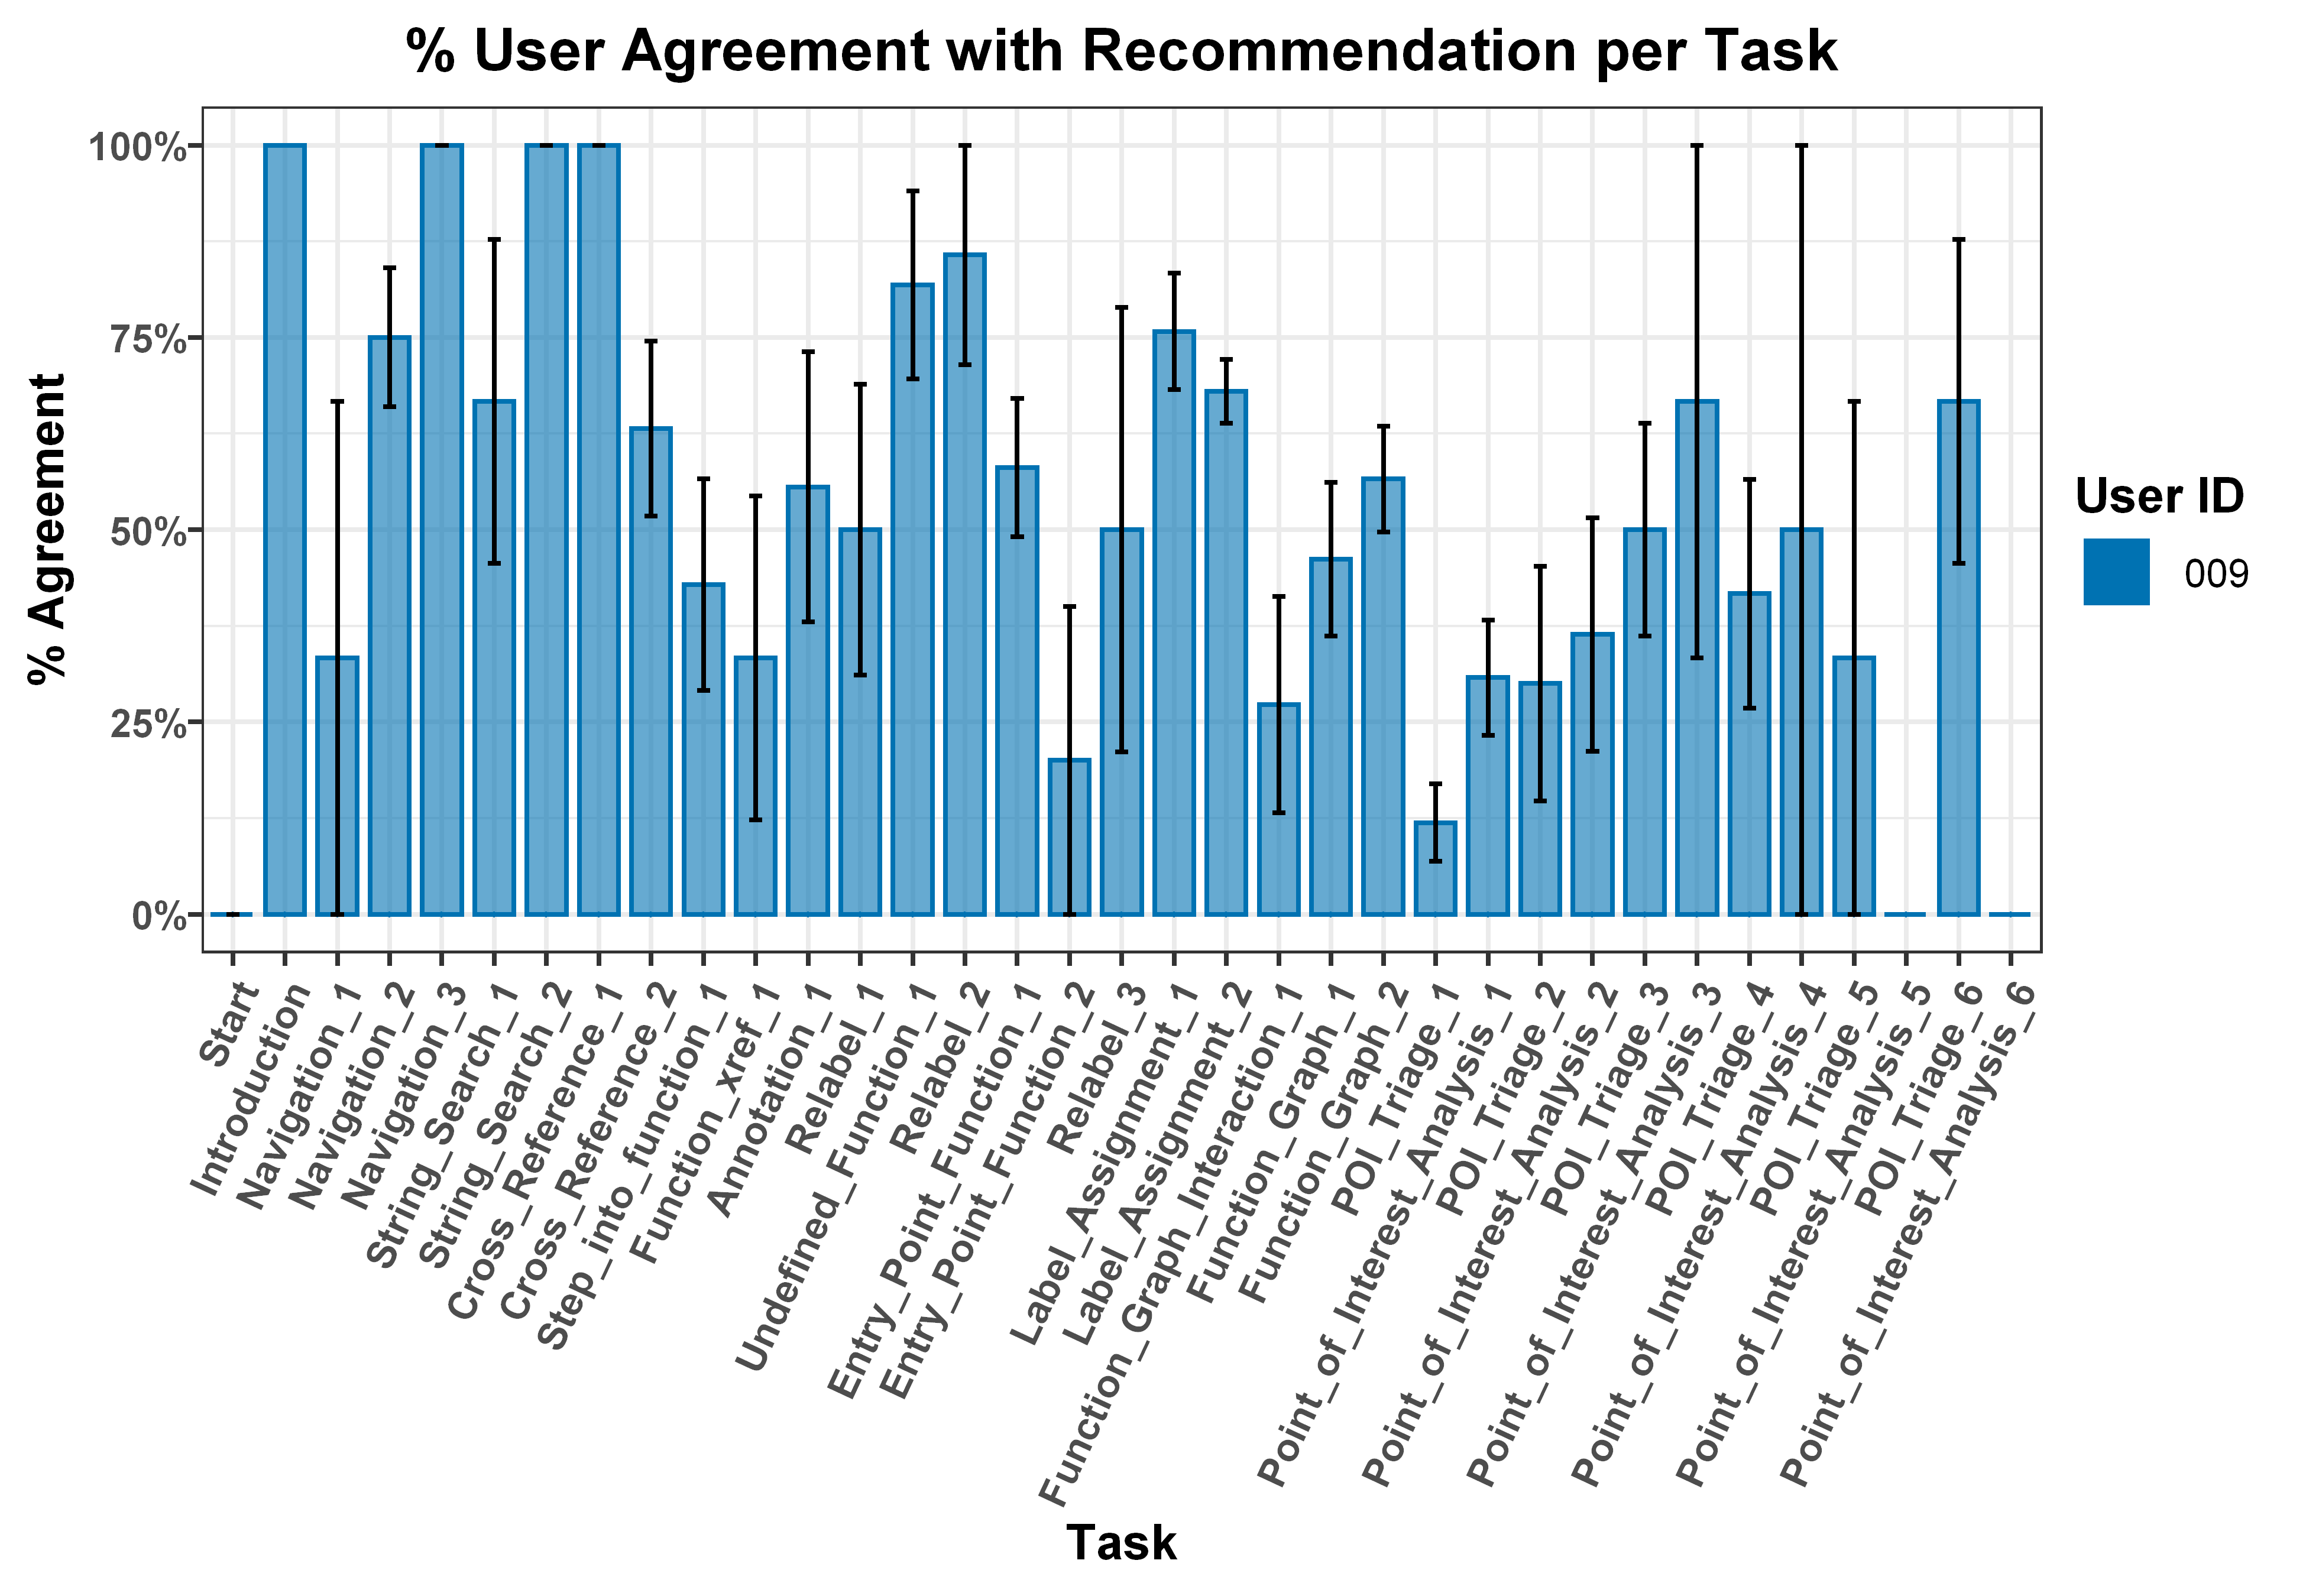

In [252]:
## Mean agreement per task (w/expert initialization)
options(repr.plot.width=6.5, repr.plot.height=4.5, repr.plot.res=600)

data <- summaryBy(Match_Any ~ UserID + Task, data=model_data_009, keep.names=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
data$Match_Any.se <- data$Match_Any.sd / sqrt(data$Match_Any.length)
data$Task <- factor(data$Task, levels = data$Task)
#levels(data$Task)
data$Task <- revalue(data$Task, c(Point_of_Interest_Triage_1="POI_Triage_1", Proof_of_Vulnerability_Analysis_1="POI_Analysis_1",
                                  Point_of_Interest_Triage_2="POI_Triage_2", Proof_of_Vulnerability_Analysis_2="POI_Analysis_2",
                                  Point_of_Interest_Triage_3="POI_Triage_3", Proof_of_Vulnerability_Analysis_3="POI_Analysis_3",
                                  Point_of_Interest_Triage_4="POI_Triage_4", Proof_of_Vulnerability_Analysis_4="POI_Analysis_4",
                                  Point_of_Interest_Triage_5="POI_Triage_5", Proof_of_Vulnerability_Analysis_5="POI_Analysis_5",
                                  Point_of_Interest_Triage_6="POI_Triage_6", Proof_of_Vulnerability_Analysis_6="POI_Analysis_6"))

agg_009 <- ggplot(data = data, aes(x=Task, y=Match_Any.mean, group=UserID, color=UserID, fill=UserID)) + labs(fill="User ID",color="User ID") +
            geom_col(position=position_dodge(), width = 0.75, show.legend=FALSE) +
            geom_point(aes(y=0,color=UserID), size=0) +
            geom_errorbar(aes(ymin = Match_Any.mean - Match_Any.se, ymax = Match_Any.mean + Match_Any.se), colour="black", size=.50, width=.25) +
            scale_fill_manual(values=alpha(c("#0072B2"),0.6)) +
            scale_color_manual(values=c("#0072B2")) +
            guides(color = guide_legend(override.aes = list(shape=15,size = 6))) +
            ylab("% Agreement") + xlab("Task") + #ylim(0.0,1.0) + #coord_fixed(1.2) +
            scale_y_continuous(limits=c(0.0,1.0), labels = scales::percent) +
            theme_bw() + ggtitle("% User Agreement with Recommendation per Task") + 
            theme(text = element_text(size=10, face="bold"),
                  axis.title.x = element_text(margin = margin(t=2)),
                  axis.title.y = element_text(margin = margin(t=0)),
                  axis.text.x = element_text(size=8, angle = 65, vjust = 1.0, hjust=1), 
                  axis.text.y = element_text(size=8, margin = margin(l=3)),
                  legend.text = element_text(size=8, face="plain"),
                  legend.spacing.y = unit(0.075, 'cm'),
                  legend.box.margin=margin(-5,0,-10,-10),
                  plot.title = element_text(size=12, hjust = 0.5))
agg_009

Warning message:
"Removed 6192 row(s) containing missing values (geom_path)."


r_Past_rolled r_Past_interp r_Future_rolled r_Future_interp
1 -0.1941257    -0.1735459    -0.2040977      -0.1790295

Warning message:
"Removed 5250 row(s) containing missing values (geom_path)."


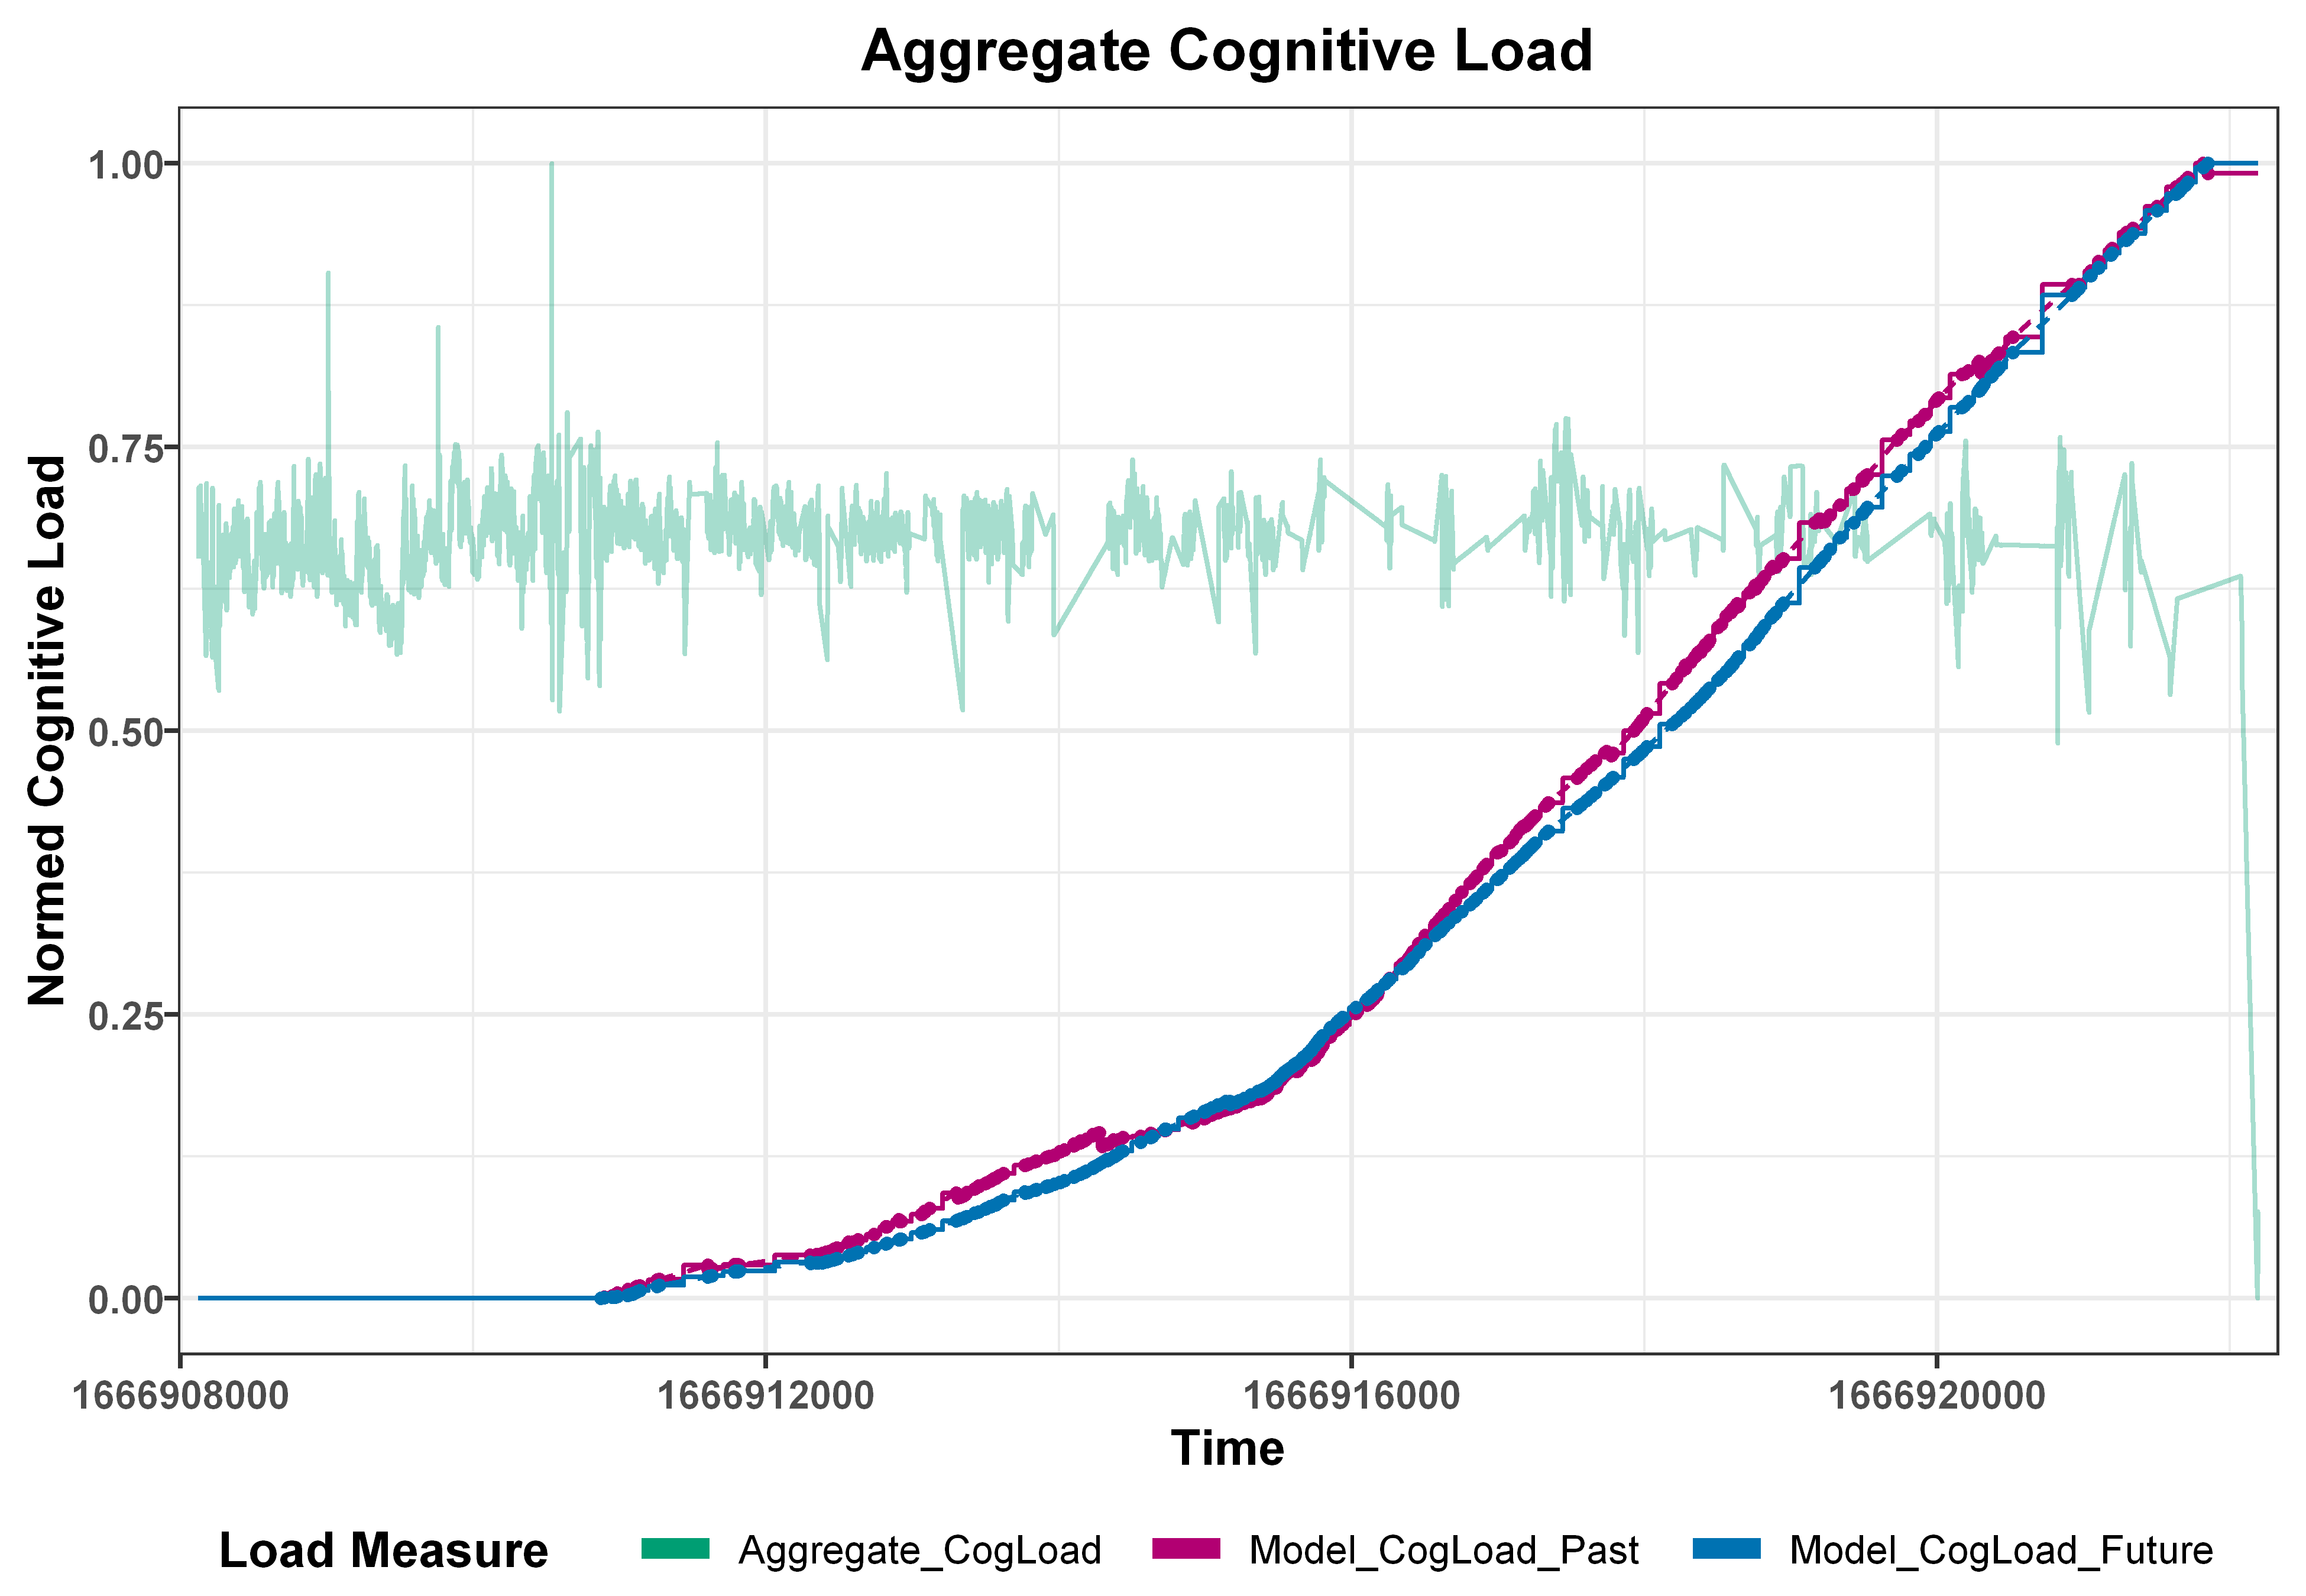

TaskLoad_r_Past_rolled TaskLoad_r_Past_interp TaskLoad_r_Future_rolled
1 0.04301238             0.0643719              0.04456133              
  TaskLoad_r_Future_interp Engagement_r_Past_rolled Engagement_r_Past_interp
1 0.0658383                -0.002829643             -0.009188476            
  Engagement_r_Future_rolled Engagement_r_Future_interp
1 -0.003920884               -0.01046823

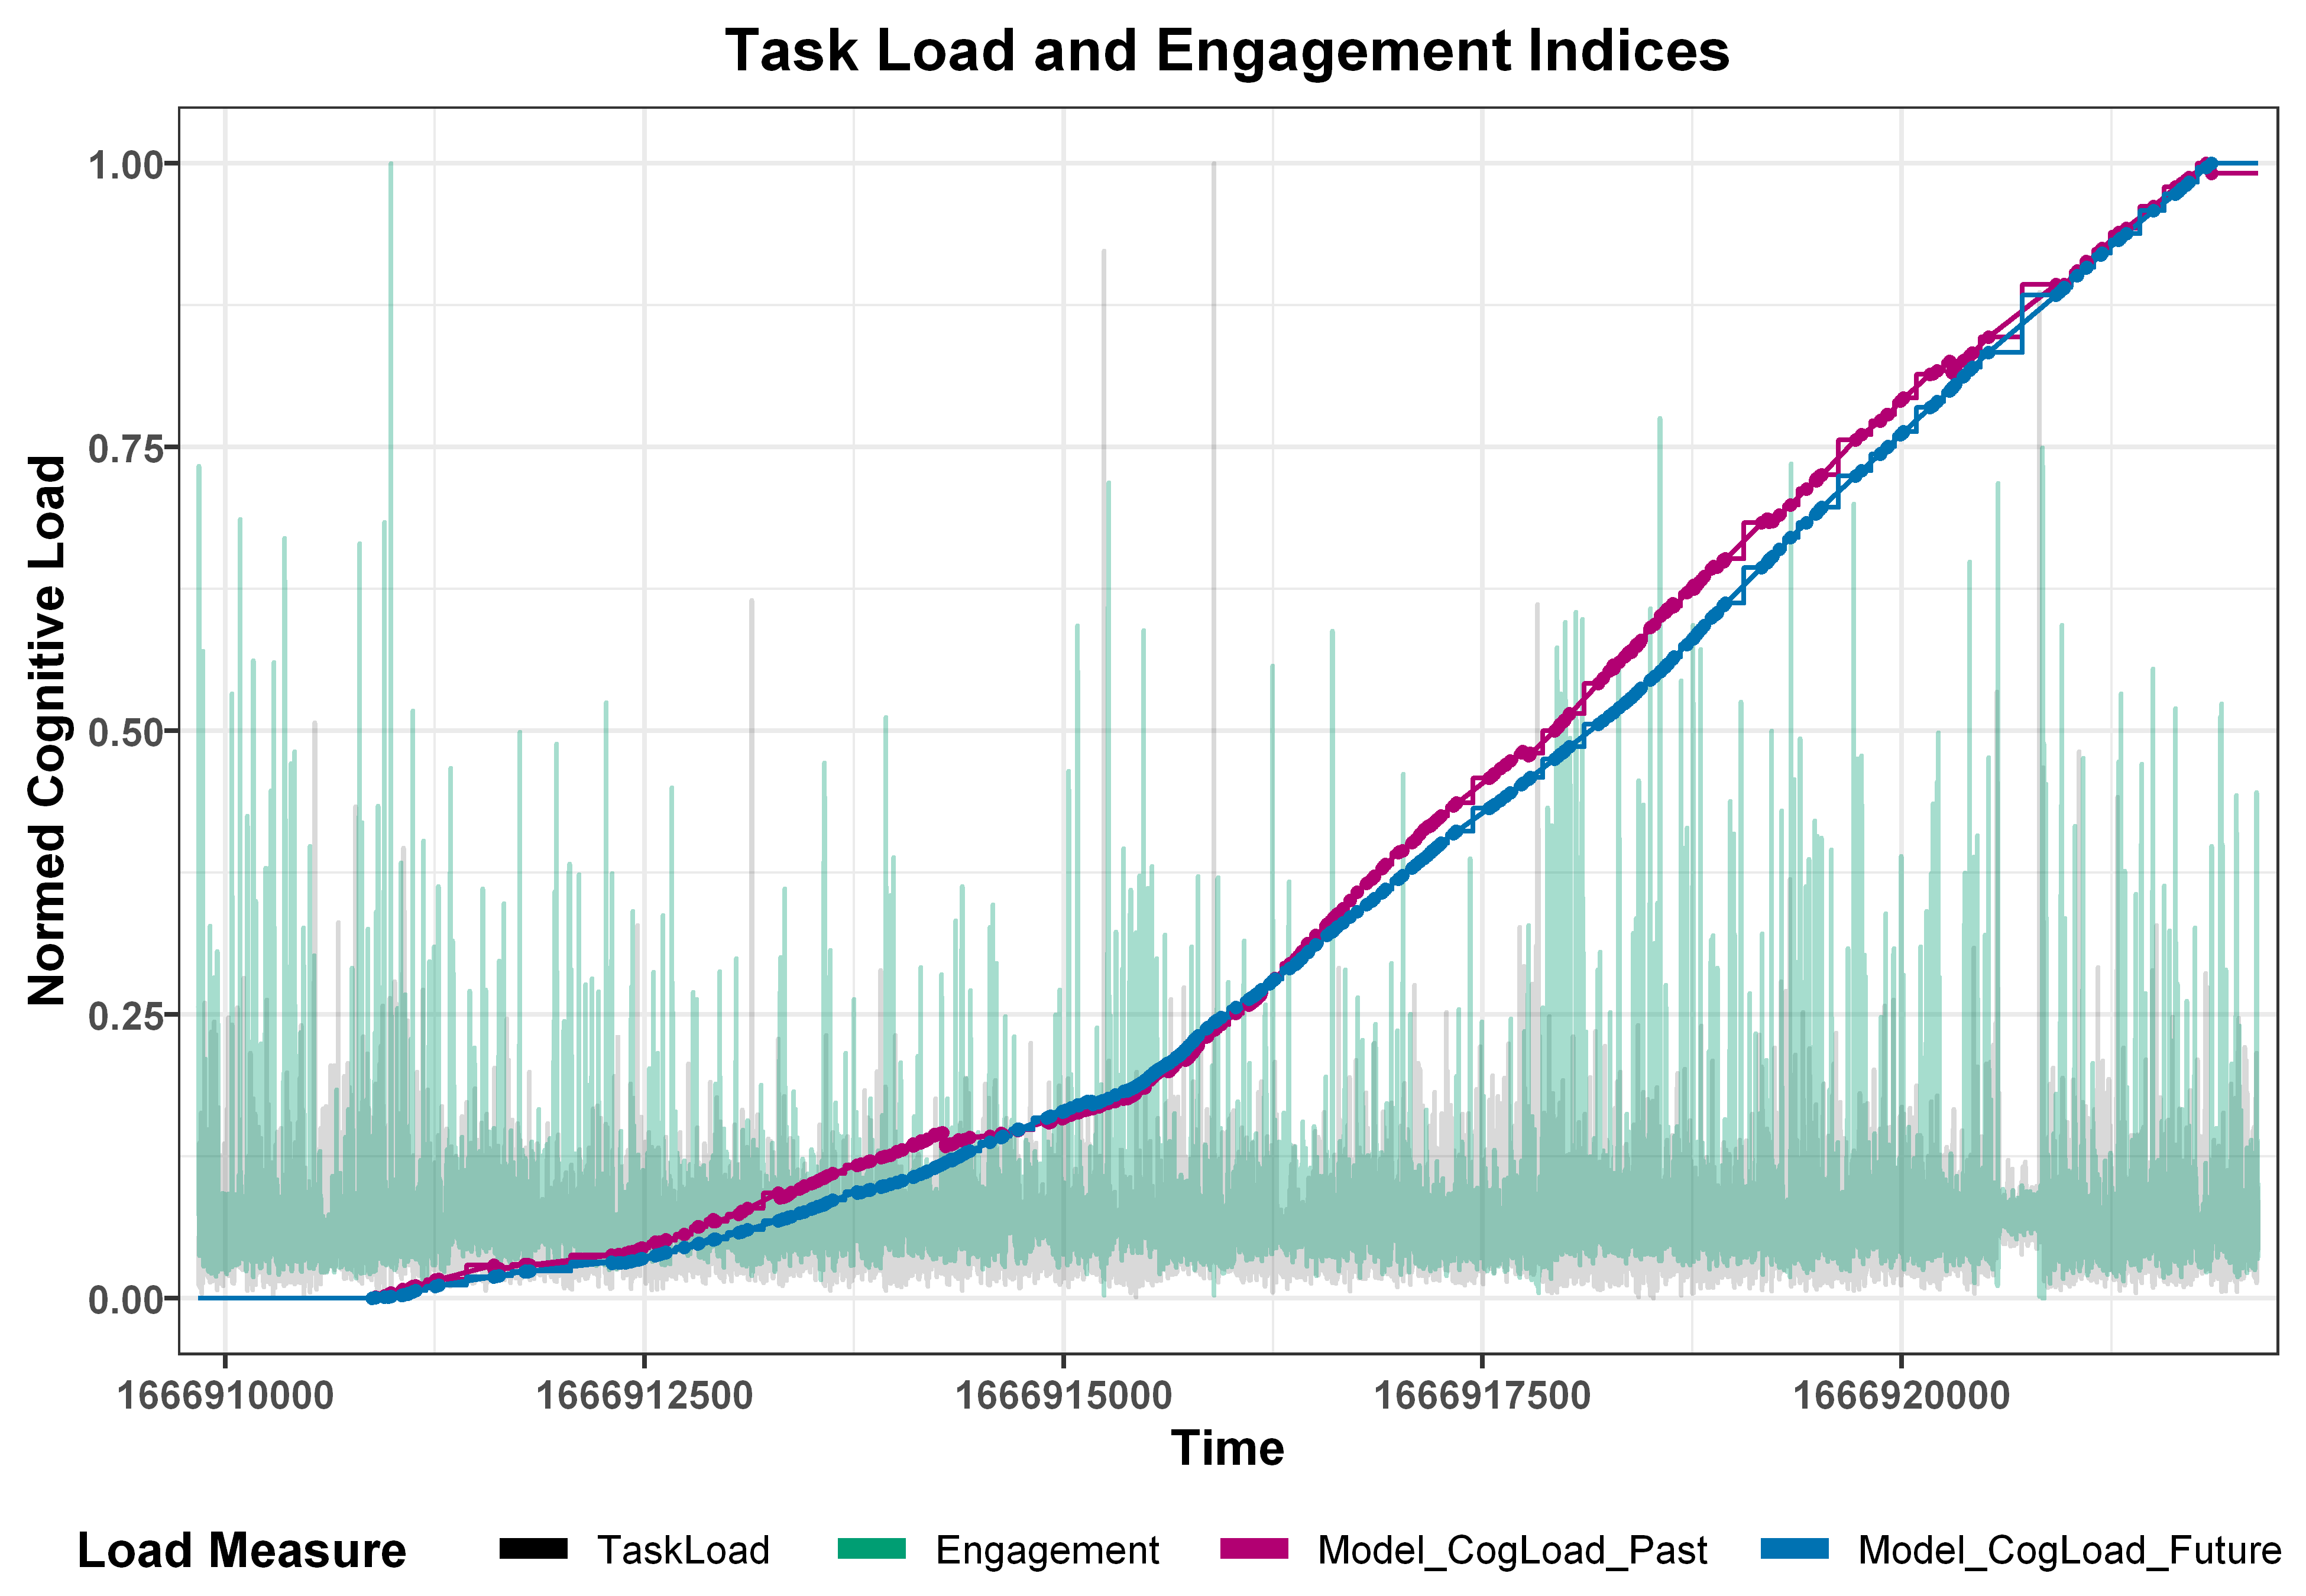

In [253]:
## Cognitive Load Correlations
model_data <- summaryBy(Past_CogLoad + Future_CogLoad ~ UserID + Time, data=model_data_009, keep.names=TRUE, order=FALSE)
model_data$Past_CogLoad_normed = (model_data$Past_CogLoad-min(model_data$Past_CogLoad))/(max(model_data$Past_CogLoad)-min(model_data$Past_CogLoad))
model_data$Future_CogLoad_normed = (model_data$Future_CogLoad-min(model_data$Future_CogLoad))/(max(model_data$Future_CogLoad)-min(model_data$Future_CogLoad))
model_data <- summaryBy(Past_CogLoad_normed + Future_CogLoad_normed ~ UserID + Time, data=model_data, keep.names=TRUE, order=FALSE)
#head(model_data)

cogload_data <- summaryBy(Agg_cogLoad ~ UserID + Time, data=cogload_data_009, keep.names=TRUE, order=FALSE)
cogload_data$Agg_cogLoad_normed = (cogload_data$Agg_cogLoad-min(cogload_data$Agg_cogLoad))/(max(cogload_data$Agg_cogLoad)-min(cogload_data$Agg_cogLoad))
cogload_data <- summaryBy(Agg_cogLoad_normed ~ UserID + Time, data=cogload_data, keep.names=TRUE, order=FALSE)
#head(cogload_data)

eng_taskload_data <- summaryBy(TaskLoad + Engagement ~ UserID + Time, data=eng_taskload_data_009, keep.names=TRUE, order=FALSE)
eng_taskload_data$Engagement[eng_taskload_data$Engagement>13] = 0
#summary(eng_taskload_data$Engagement)
eng_taskload_data$TaskLoad_normed = (eng_taskload_data$TaskLoad-min(eng_taskload_data$TaskLoad))/(max(eng_taskload_data$TaskLoad)-min(eng_taskload_data$TaskLoad))
eng_taskload_data$Engagement_normed = (eng_taskload_data$Engagement-min(eng_taskload_data$Engagement))/(max(eng_taskload_data$Engagement)-min(eng_taskload_data$Engagement))
eng_taskload_data <- summaryBy(TaskLoad_normed + Engagement_normed ~ UserID + Time, data=eng_taskload_data, keep.names=TRUE, order=FALSE)
#head(eng_taskload_data)

setDT(model_data)
setDT(cogload_data)
setDT(eng_taskload_data)

setkey(model_data, UserID, Time)
setkey(cogload_data, UserID, Time)
setkey(eng_taskload_data, UserID, Time)

###Aggregate Cognitive Load
rawdata = model_data[cogload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

rawdata$Future_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Future_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past",
                        ifelse(data$variable=="Future_CogLoad_normed"|data$variable=="Future_CogLoadInterp","Model_CogLoad_Future",
                               "Aggregate_CogLoad"))
data$type <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Future_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp"|data$variable=="Future_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("Aggregate_CogLoad", "Model_CogLoad_Past","Model_CogLoad_Future"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)

load_009 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                geom_point(data=model_data, aes(Time, Future_CogLoad_normed), colour="#0072B2", size = 0.75) +
                scale_color_manual(values=c("#009E73","#B20072","#0072B2")) +
                scale_alpha_manual(values=c(0.35,1.0,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Aggregate Cognitive Load") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-10),
                      plot.title = element_text(size=12, hjust = 0.5))
load_009

rawdata %>% group_by(UserID) %>%
  summarise(r_Past_rolled = cor(Agg_cogLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
            r_Past_interp = cor(Agg_cogLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
            r_Future_rolled = cor(Agg_cogLoad_normed, Future_CogLoad_normed, use="pairwise.complete.obs"),
            r_Future_interp = cor(Agg_cogLoad_normed, Future_CogLoadInterp, use="pairwise.complete.obs"))


###Task Load Index
rawdata = model_data[eng_taskload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

rawdata$Future_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Future_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past",
                        ifelse(data$variable=="Future_CogLoad_normed"|data$variable=="Future_CogLoadInterp","Model_CogLoad_Future",
                               ifelse(data$variable=="TaskLoad_normed","TaskLoad","Engagement")))
data$type <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Future_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp"|data$variable=="Future_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("TaskLoad","Engagement","Model_CogLoad_Past","Model_CogLoad_Future"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)

eng_009 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                geom_point(data=model_data, aes(Time, Future_CogLoad_normed), colour="#0072B2", size = 0.75) +
                scale_color_manual(values=c("black","#009E73","#B20072","#0072B2")) +
                scale_alpha_manual(values=c(0.15,0.35,1.0,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Task Load and Engagement Indices") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-25),
                      plot.title = element_text(size=12, hjust = 0.5))
eng_009

rawdata %>% group_by(UserID) %>%
  summarise(TaskLoad_r_Past_rolled = cor(TaskLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
            TaskLoad_r_Past_interp = cor(TaskLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
            TaskLoad_r_Future_rolled = cor(TaskLoad_normed, Future_CogLoad_normed, use="pairwise.complete.obs"),
            TaskLoad_r_Future_interp = cor(TaskLoad_normed, Future_CogLoadInterp, use="pairwise.complete.obs"),
            Engagement_r_Past_rolled = cor(Engagement_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
            Engagement_r_Past_interp = cor(Engagement_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
            Engagement_r_Future_rolled = cor(Engagement_normed, Future_CogLoad_normed, use="pairwise.complete.obs"),
            Engagement_r_Future_interp = cor(Engagement_normed, Future_CogLoadInterp, use="pairwise.complete.obs"))
